In [1]:
import pandas as pd
import numpy as np
import os  
print("文件列表：",os.listdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj"))
data = pd.ExcelFile("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx")
sheet_names = data.sheet_names
print("列表名：",sheet_names )

文件列表： ['Embeded_FS', 'split']
列表名： ['LR', 'SVM', 'KNN', 'RF', 'NB', 'STACK', 'RFFI']


In [2]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [3]:
# data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/RFE.xlsx", sheet_name='g1rfegb12')
name = 'NB'
data = pd.read_excel("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/Embeded_FS/EmbededFS-results.xlsx", sheet_name=name)

data.keys()
train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/Train-FS-ZSCORE-MI.csv")
test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/InternalTest-FS-ZSCORE-MI.csv")
test1 = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI.csv")
train=train[data.keys()]
train.shape
test=test[data.keys()]
test.shape
test1=test1[data.keys()]
test1.shape

train.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/Train-FS-ZSCORE-MI-NB.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF5.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/trainZscore-RFERF11.csv",index=None)


# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF19.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore-RFERF5.csv",index=None)
test.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-NB.csv",index=None)


# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF19.csv",index=None)
# test1.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test1Zscore-RFERF5.csv",index=None)
test1.to_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-NB.csv",index=None)



In [4]:
train.shape

(236, 18)

In [5]:
test.shape

(59, 18)

In [6]:
#%% load liabrary
import os
import numpy as np
import xlrd
import scipy.io as io
import pandas as pd
import sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.model_selection import cross_val_score,ShuffleSplit, train_test_split
from sklearn.linear_model import Lasso, Ridge, LassoCV,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn import metrics
import itertools
import joblib
from scipy import stats
from sklearn import preprocessing
print("Import library done.\n")

Import library done.



In [7]:
# data = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/test_label.csv")
# y = data.label
# print(y)
# data = data.drop(columns=['id','label'])

# scaler = StandardScaler()#因此选用StandardScaler进行归一化
# scaler.fit(data.values)


# X = pd.DataFrame(data = scaler.transform(data.values), columns=data.columns)
# X['label']=y



# outputpath = "C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/egfr01_467/testZscore.csv"
# X.to_csv(outputpath,sep=',',index=False,header=True) 
# # df1是你想要输出的的DataFrame
# # index是否要索引，header是否要列名，True就是需要
# X.head()

In [8]:
# DIABETES PREDICTION MODEL

# CLASSIFICATION MODELS - HOLDOUT

'''
Steps to follow:
    - Load the saved dataset
    - General View
    - Modeling
        - Base models: LogisticRegression, GaussianNB, KNeighborsClassifier, SVC, MLPClassifier, DecisionTreeClassifier,
                       BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,
                       XGBClassifier, LGBMClassifier, CatBoostClassifier, NGBClassifier
    - Model Evaluation
    - Model Tuning
    - Model Results
'''

# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)


# Load the preprocessed dataset
# diabetes_preprocessed = pd.read_csv('./diabetes_prepared.csv')

# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-1.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFEGB8.csv",index=None)
# train.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/trainZscore-RFERF17-42.csv",index=None)

# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rferf17.csv")
# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/group1/new-auc/train_rfegb5.csv")
pathdata="C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/Train-FS-ZSCORE-MI-NB.csv"
diabetes_preprocessed = pd.read_csv(pathdata)




# diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
df = diabetes_preprocessed.copy()
# df = df.drop(columns="id",axis=1)

## GENERAL VIEW

df.head()
df.shape
df.info()
df.columns
df.index
df.describe([0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   CT_wavelet-HLH_glszm_SizeZoneNonUniformityNormalized  236 non-null    float64
 1   CT_wavelet-LHL_firstorder_10Percentile                236 non-null    float64
 2   CT_wavelet2-HHL_glcm_ClusterShade                     236 non-null    float64
 3   PET_original_glcm_JointEnergy                         236 non-null    float64
 4   CT_wavelet-HHH_firstorder_Kurtosis                    236 non-null    float64
 5   CT_lbp-3D-k_glcm_Imc1                                 236 non-null    float64
 6   CT_wavelet2-HHH_glcm_Correlation                      236 non-null    float64
 7   CT_original_firstorder_Maximum                        236 non-null    float64
 8   CT_wavelet-LHL_firstorder_Mean                        236 no

count   mean   std  \
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... 236.000  0.000 1.002   
CT_wavelet-LHL_firstorder_10Percentile             236.000  0.000 1.002   
CT_wavelet2-HHL_glcm_ClusterShade                  236.000 -0.000 1.002   
PET_original_glcm_JointEnergy                      236.000 -0.000 1.002   
CT_wavelet-HHH_firstorder_Kurtosis                 236.000 -0.000 1.002   
CT_lbp-3D-k_glcm_Imc1                              236.000 -0.000 1.002   
CT_wavelet2-HHH_glcm_Correlation                   236.000  0.000 1.002   
CT_original_firstorder_Maximum                     236.000  0.000 1.002   
CT_wavelet-LHL_firstorder_Mean                     236.000 -0.000 1.002   
CT_original_shape_Flatness                         236.000 -0.000 1.002   
CT_wavelet-HHH_firstorder_Skewness                 236.000 -0.000 1.002   
CT_wavelet2-HHH_firstorder_Median                  236.000  0.000 1.002   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis 236.000  0.000 1.002   
CT_lbp-3D-m1_firstorder_Mean                       236.000 -0.000 1.002   
CT_lbp-3D-m1_glszm_GrayLevelNonUniformity          236.000  0.000 1.002   
CT_wavelet2-LHH_firstorder_Mean                    236.000  0.000 1.002   
CT_original_glcm_ClusterProminence                 236.000 -0.000 1.002   
label                                              236.000  0.428 0.496   

                                                      min    10%    25%  \
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... -2.120 -1.229 -0.742   
CT_wavelet-LHL_firstorder_10Percentile             -4.359 -1.407 -0.558   
CT_wavelet2-HHL_glcm_ClusterShade                  -4.070 -0.703 -0.112   
PET_original_glcm_JointEnergy                      -0.417 -0.402 -0.365   
CT_wavelet-HHH_firstorder_Kurtosis                 -0.932 -0.716 -0.560   
CT_lbp-3D-k_glcm_Imc1                              -6.532 -1.131 -0.465   
CT_wavelet2-HHH_glcm_Correlation                   -4.294 -0.808 -0.327   
CT_original_firstorder_Maximum                     -1.374 -0.698 -0.598   
CT_wavelet-LHL_firstorder_Mean                     -8.612 -0.701 -0.140   
CT_original_shape_Flatness                         -1.342 -1.061 -0.692   
CT_wavelet-HHH_firstorder_Skewness                 -8.364 -0.764 -0.209   
CT_wavelet2-HHH_firstorder_Median                  -7.603 -0.753 -0.211   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis -0.203 -0.203 -0.202   
CT_lbp-3D-m1_firstorder_Mean                       -3.339 -1.054 -0.529   
CT_lbp-3D-m1_glszm_GrayLevelNonUniformity          -0.119 -0.119 -0.119   
CT_wavelet2-LHH_firstorder_Mean                    -4.040 -0.754 -0.278   
CT_original_glcm_ClusterProminence                 -0.794 -0.648 -0.519   
label                                               0.000  0.000  0.000   

                                                      50%    75%    90%   95%  \
CT_wavelet-HLH_glszm_SizeZoneNonUniformityNorma... -0.082  0.725  1.352 1.571   
CT_wavelet-LHL_firstorder_10Percentile              0.277  0.764  1.026 1.104   
CT_wavelet2-HHL_glcm_ClusterShade                   0.029  0.124  0.559 1.119   
PET_original_glcm_JointEnergy                      -0.229 -0.009  0.528 0.820   
CT_wavelet-HHH_firstorder_Kurtosis                 -0.262  0.198  0.865 1.507   
CT_lbp-3D-k_glcm_Imc1                               0.209  0.768  0.963 1.022   
CT_wavelet2-HHH_glcm_Correlation                    0.077  0.391  0.712 1.047   
CT_original_firstorder_Maximum                     -0.383  0.215  1.333 2.087   
CT_wavelet-LHL_firstorder_Mean                      0.112  0.310  0.781 1.252   
CT_original_shape_Flatness                         -0.250  0.269  1.683 2.218   
CT_wavelet-HHH_firstorder_Skewness                  0.000  0.199  0.676 1.366   
CT_wavelet2-HHH_firstorder_Median                   0.057  0.280  0.723 1.062   
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis -0.191 -0.124  0.153 0.598   
CT_lbp-3D-m1_firstorder_Mean                       -0.078  0.179  1

In [9]:
# Check for missing values
df.isnull().values.any()
df.isnull().sum().sort_values(ascending=False)


CT_wavelet-HLH_glszm_SizeZoneNonUniformityNormalized    0
CT_wavelet-LHL_firstorder_10Percentile                  0
CT_original_glcm_ClusterProminence                      0
CT_wavelet2-LHH_firstorder_Mean                         0
CT_lbp-3D-m1_glszm_GrayLevelNonUniformity               0
CT_lbp-3D-m1_firstorder_Mean                            0
CT_wavelet-LHL_glszm_LargeAreaLowGrayLevelEmphasis      0
CT_wavelet2-HHH_firstorder_Median                       0
CT_wavelet-HHH_firstorder_Skewness                      0
CT_original_shape_Flatness                              0
CT_wavelet-LHL_firstorder_Mean                          0
CT_original_firstorder_Maximum                          0
CT_wavelet2-HHH_glcm_Correlation                        0
CT_lbp-3D-k_glcm_Imc1                                   0
CT_wavelet-HHH_firstorder_Kurtosis                      0
PET_original_glcm_JointEnergy                           0
CT_wavelet2-HHL_glcm_ClusterShade                       0
label         

In [10]:

# pathdata="C:/Users/zuoya/Desktop/EJR/2023-383CASES-01-CLINICS.csv"
# diabetes_preprocessed = pd.read_csv(pathdata)




# # diabetes_preprocessed = pd.read_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/Results_HRFS01/catboost/train.csv")
# df = diabetes_preprocessed.copy()

In [11]:
X_train = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/Train-FS-ZSCORE-MI-NB.csv")
y_train = X_train['label']
X_train = X_train.drop(labels=['label'], axis=1)

X_test = pd.read_csv("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/InternalTest-FS-ZSCORE-MI-NB.csv")
y_test = X_test['label']
X_test = X_test.drop(labels=['label'], axis=1)

In [12]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [13]:
# X_train.to_csv("C:/Users/zuoya/Desktop/EJR/xtrain-2023-383CASES-01-CLINICS.csv")

In [14]:
# X_test.to_csv("C:/Users/zuoya/Desktop/EJR/xtest-2023-383CASES-01-CLINICS.csv")

In [15]:
# y_train.to_csv("C:/Users/zuoya/Desktop/EJR/ytrain-2023-383CASES-01-CLINICS.csv")

In [16]:
# y_test.to_csv("C:/Users/zuoya/Desktop/EJR/ytest-2023-383CASES-01-CLINICS.csv")

In [17]:
# Evaluate each model in turn by looking at train and test errors and scores
from sklearn.metrics import roc_auc_score
def evaluate_classification_model_holdout(models):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

    # Define lists to track names and results for models
    names = []
    train_accuracy_results = []
    test_accuracy_results = []

    print('################ Accuracy scores for test set for the models: ################\n')
    for name, model in models:
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

#         train_accuracy_result = accuracy_score(y_train, y_train_pred)
#         test_accuracy_result = accuracy_score(y_test, y_test_pred)
#         train_accuracy_results.append(train_accuracy_result)
#         test_accuracy_results.append(test_accuracy_result)
        train_accuracy_result = roc_auc_score(y_train, y_train_pred)
        test_accuracy_result = roc_auc_score(y_test, y_test_pred)
        train_accuracy_results.append(train_accuracy_result)
        test_accuracy_results.append(test_accuracy_result)

        names.append(name)
        msg = "%s: %f" % (name, test_accuracy_result)
        print(msg)

    print('\n################ Train and test results for the model: ################\n')
    data_result = pd.DataFrame({'models': names,
                                'accuracy_train': train_accuracy_results,
                                'accuracy_test': test_accuracy_results})
    print(data_result)

    # Plot the results
    plt.figure(figsize=(15, 12))
    sns.barplot(x='accuracy_test', y='models', data=data_result.sort_values(by="accuracy_test", ascending=False), color="r")
    plt.xlabel('AUC Scores')
    plt.ylabel('Models')
    plt.title('AUC Scores For Test Set')
    plt.show()

In [18]:
# Define a function to plot feature_importances
def plot_feature_importances(tuned_model):
    feature_importances = pd.DataFrame({'Importance': tuned_model.feature_importances_ * 100, 'Feature': X_train.columns})
    plt.figure()
    sns.barplot(x="Importance", y="Feature", data=feature_importances.sort_values(by="Importance", ascending=False))
    plt.title('Feature Importance') # TODO tuned_model.__name__
    plt.show()


In [19]:
# Function to plot confusion_matrix
def plot_confusion_matrix(model, X_test, y_test, normalize=True):
    plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize)
    plt.figure(figsize=(15, 15))
    plt.show()

In [20]:
# Function to plot confusion_matrix
def plot_confusion_matrix_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    model_cm = ConfusionMatrix(model, percent=True, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    model_cm.fit(X_train, y_train)
    model_cm.score(X_test, y_test)
    model_cm.show();

In [21]:
# Function to plot classification_report by using yellowbrick
def plot_classification_report_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ClassificationReport(model, classes=["EGFR Wild", "EGFR Mutated"], support=True, cmap='Blues')
    visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof()
    # visualizer.show();

In [22]:
# Funtion to plot ROC-AUC Curve
def plot_roc_auc_curve(model):
    model_roc_auc = roc_auc_score(y_test, model.predict(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.figure()
    plt.plot(fpr, tpr, label='AUC (area = %0.4f)' % model_roc_auc)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model,' Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [23]:
# Funtion to plot ROC-AUC Curve by using yellowbrick
def plot_roc_auc_curve_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    visualizer = ROCAUC(model, classes=["EGFR Wild", "EGFR Mutated"])
    visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.show();  # Finalize and show the figure

In [24]:
# Function to plot prediction errors
def plot_class_prediction_error_yb(model):
    # # Split the dataset into train and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)
    # Instantiate the classification model and visualizer
    visualizer = ClassPredictionError(model, classes=["EGFR Wild", "EGFR Mutated"], cmap='Blues')
    # Fit the training data to the visualizer
    visualizer.fit(X_train, y_train)
    # Evaluate the model on the test data
    visualizer.score(X_test, y_test)
    # Draw visualization
    visualizer.show();

In [25]:
# Function to plot learning curves
def plot_learning_curve(model_tuned):
    # Create the learning curve visualizer
    cv = StratifiedKFold(n_splits=12)
    sizes = np.linspace(0.3, 1.0, 10)
    # Instantiate the classification model and visualizer
    visualizer = LearningCurve(model_tuned, cv=cv, scoring='accuracy', train_sizes=sizes, n_jobs=4)
    visualizer.fit(X, y)  # Fit the data to the visualizer
    visualizer.show()  # Finalize and render the figure

In [26]:
# Function to report results quickly
def report_results_quickly(model):
    fig, axes = plt.subplots(2, 2,figsize=(15, 9))
    model = model
    visualgrid = [FeatureImportances(model, ax=axes[0][0]),
                  ConfusionMatrix(model, ax=axes[0][1], cmap='Blues'),
                  ClassificationReport(model, ax=axes[1][0], cmap='Blues'),
                  ROCAUC(model, ax=axes[1][1])]
    for viz in visualgrid:
        viz.fit(X_train, y_train)
        viz.score(X_test, y_test)
        viz.finalize()
    plt.show()

In [27]:
# Function to plot all the results
def plot_results(model):
    plot_confusion_matrix_yb(model)
    plot_classification_report_yb(model)
    plot_roc_auc_curve_yb(model)
    plot_class_prediction_error_yb(model)


In [28]:
def Save_to_Csv(data, file_name, Save_format = 'csv', Save_type = 'col'):
    # data
    # 输入为一个字典，格式： { '列名称': 数据,....} 
    # 列名即为CSV中数据对应的列名， 数据为一个列表
    
    # file_name 存储文件的名字
    # Save_format 为存储类型， 默认csv格式， 可改为 excel
    # Save_type 存储类型 默认按列存储， 否则按行存储
    
    # 默认存储在当前路径下
    
    import pandas as pd
    import numpy as np
    
    Name = []
    times = 0
 
    if Save_type == 'col':
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List).reshape(-1,1)
            else:
                Data = np.hstack((Data, np.array(List).reshape(-1,1)))
                
            times += 1
            
        Pd_data = pd.DataFrame(columns=Name, data=Data) 
        
    else:
        for name, List in data.items():
            Name.append(name)
            if times == 0:
                Data = np.array(List)
            else:
                Data = np.vstack((Data, np.array(List)))
        
            times += 1
    
        Pd_data = pd.DataFrame(index=Name, data=Data)  
    
    if Save_format == 'csv':
        Pd_data.to_csv('./'+ file_name +'.csv',encoding='utf-8')
    else:
        Pd_data.to_excel('./'+ file_name +'.xls',encoding='utf-8')

In [29]:
# # MODELING


# # Define dependent and independent variables
# y = df["label"]
# X = df.drop(["label"], axis=1)

# # y = df["Outcome"]
# # X = df.drop(["Outcome"], axis=1)

# # Split the dataset into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=520)

In [30]:
# See the results for base models

base_models = [('LogisticRegression', LogisticRegression()),
               ('Naive Bayes', GaussianNB()),
               ('KNN', KNeighborsClassifier()),
               ('SVM', SVC()),
               ('ANN', MLPClassifier()),
               ('CART', DecisionTreeClassifier()),
               ('BaggedTrees', BaggingClassifier()),
               ('RF', RandomForestClassifier()),
               ('AdaBoost', AdaBoostClassifier()),
               ('GBM', GradientBoostingClassifier()),
               ("XGBoost", XGBClassifier()),
               ("LightGBM", LGBMClassifier()),
               ("CatBoost", CatBoostClassifier(verbose=False)),
               ("NGBoost", NGBClassifier(verbose=False))]

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.485507
Naive Bayes: 0.541063
KNN: 0.542874
SVM: 0.564614
ANN: 0.550725
CART: 0.565821
BaggedTrees: 0.473430
RF: 0.485507
AdaBoost: 0.497585
GBM: 0.614130
XGBoost: 0.530797
LightGBM: 0.580314
CatBoost: 0.580314
NGBoost: 0.536836

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.671          0.486
1          Naive Bayes           0.543          0.541
2                  KNN           0.721          0.543
3                  SVM           0.751          0.565
4                  ANN           0.852          0.551
5                 CART           1.000          0.566
6          BaggedTrees           0.968          0.473
7                   RF           1.000          0.486
8             AdaBoost           0.923          0.498
9                  GBM           1.000          0.614
10

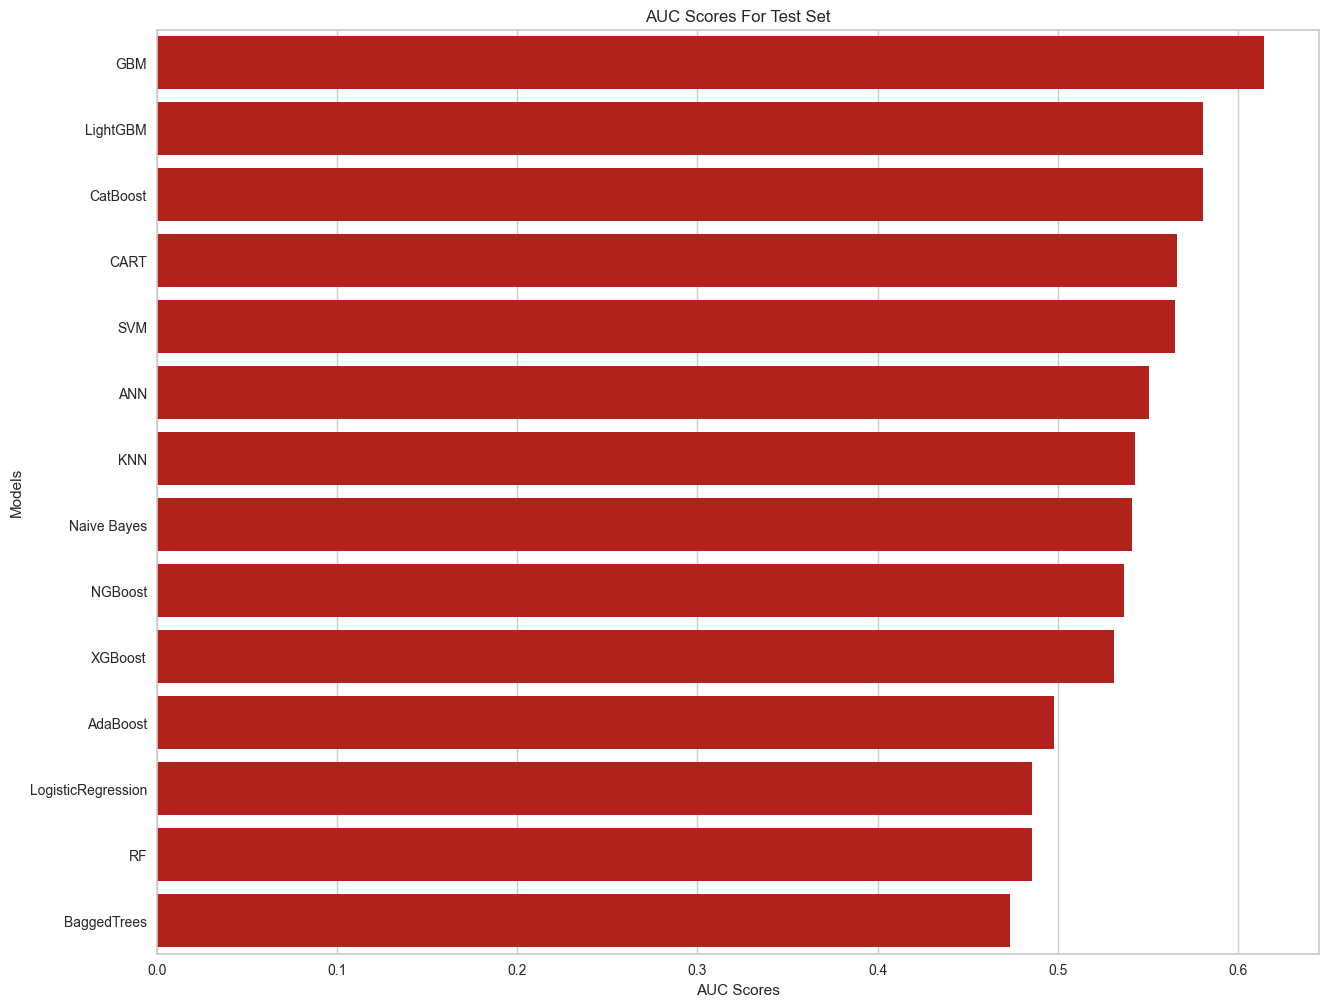

In [31]:
evaluate_classification_model_holdout(base_models)

################ Accuracy scores for test set for the models: ################

LogisticRegression: 0.534091
Naive Bayes: 0.583333
KNN: 0.534091
SVM: 0.517045
ANN: 0.462121
CART: 0.467803
BaggedTrees: 0.410985
RF: 0.501894
AdaBoost: 0.556818
GBM: 0.462121
XGBoost: 0.473485
LightGBM: 0.498106
CatBoost: 0.465909
NGBoost: 0.482955

################ Train and test results for the model: ################

                models  accuracy_train  accuracy_test
0   LogisticRegression           0.628          0.534
1          Naive Bayes           0.620          0.583
2                  KNN           0.696          0.534
3                  SVM           0.739          0.517
4                  ANN           0.873          0.462
5                 CART           1.000          0.468
6          BaggedTrees           0.974          0.411
7                   RF           1.000          0.502
8             AdaBoost           0.951          0.557
9                  GBM           1.000          0.462
10

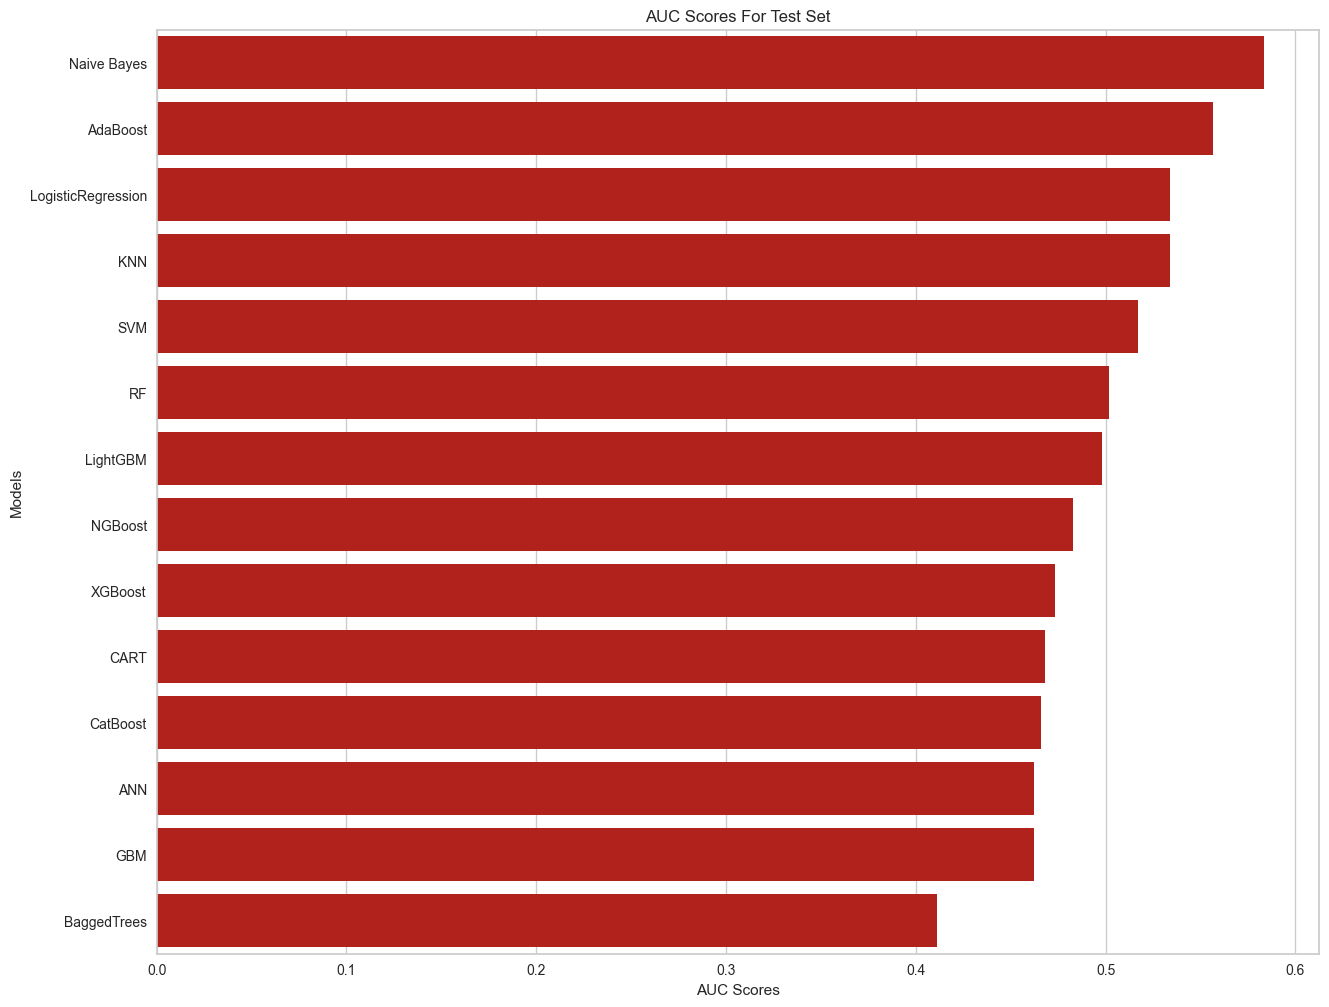

In [26]:
evaluate_classification_model_holdout(base_models)
# LogisticRegression: 0.618243
# Naive Bayes: 0.563707
# KNN: 0.605212
# SVM: 0.563707
# ANN: 0.569015
# CART: 0.542954
# BaggedTrees: 0.663127
# RF: 0.698842
# AdaBoost: 0.645270
# GBM: 0.708012
# XGBoost: 0.685811
# LightGBM: 0.663127
# CatBoost: 0.658301
# NGBoost: 0.662645   422


In [27]:
# For some distance-based models, we need to scale the features in order to
# increase the speed and the performance/accuracy level of the model.
# We can also see the effect of scaling type by changing the sclaer function.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

################ Accuracy scores for test set for the models: ################

GaussianNB: 0.583333

################ Train and test results for the model: ################

       models  accuracy_train  accuracy_test
0  GaussianNB           0.620          0.583


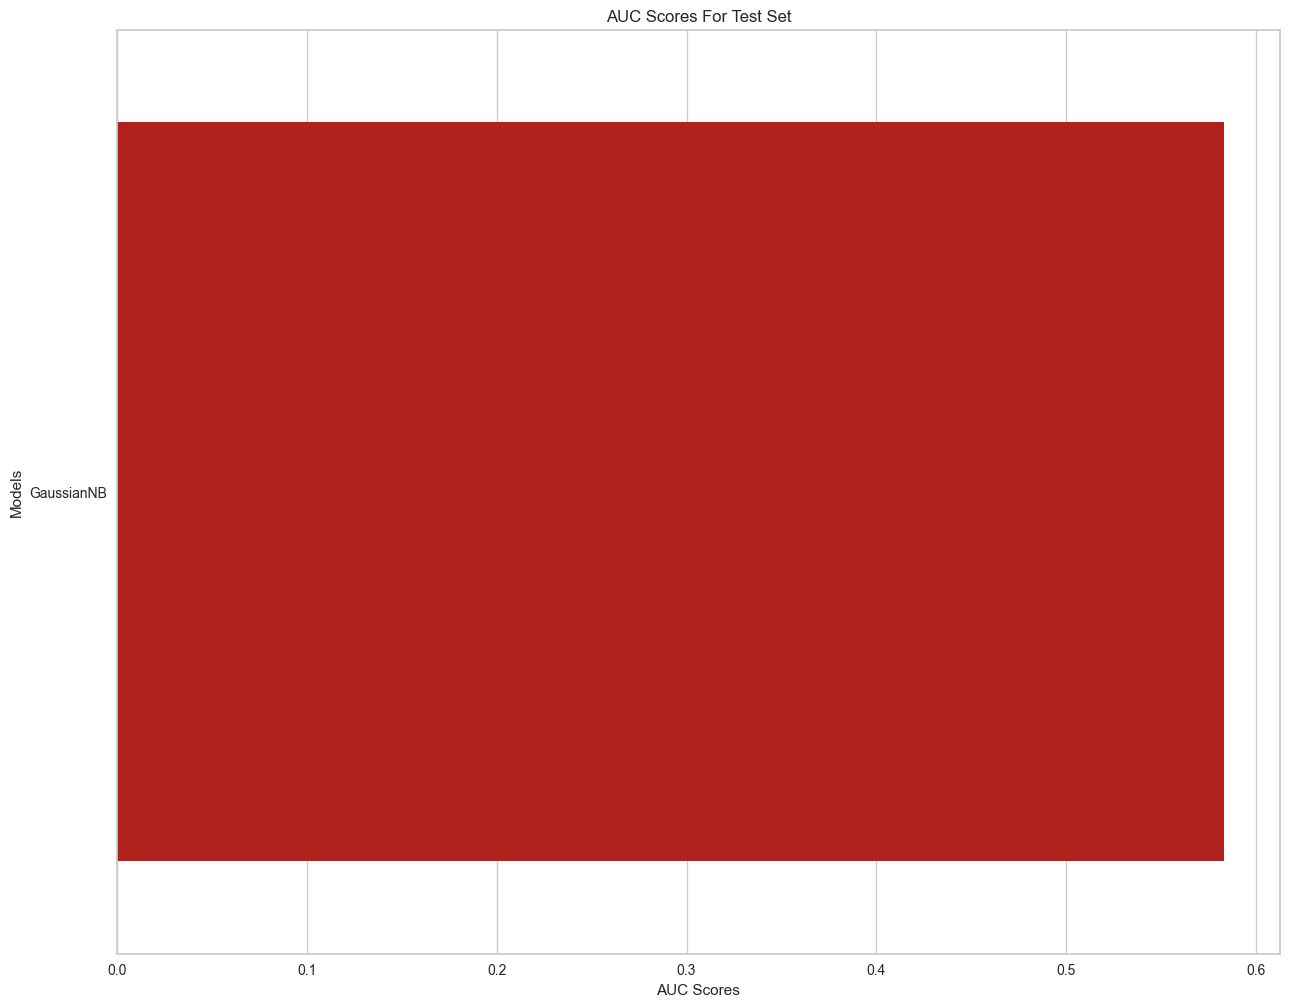

In [28]:
# LogisticRegression with make_pipeline
GNBreg = make_pipeline(MinMaxScaler(), GaussianNB())
evaluate_classification_model_holdout([('GaussianNB', GNBreg)]) # 0.805 instead of  0.805195

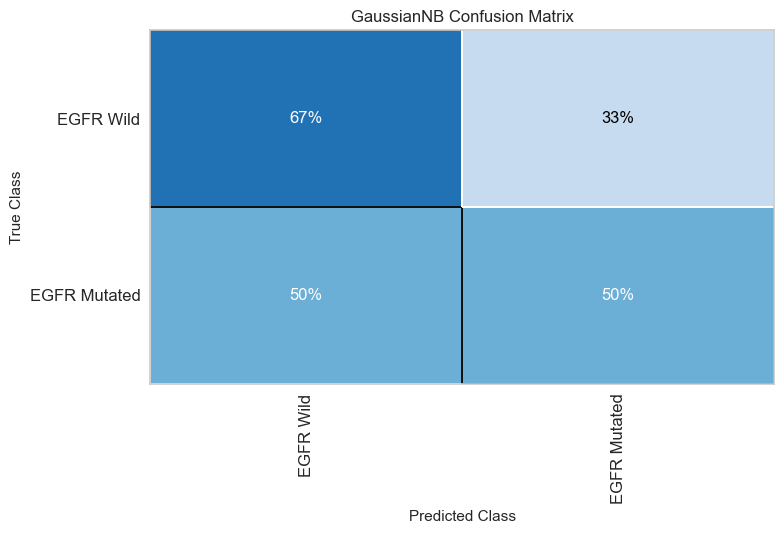

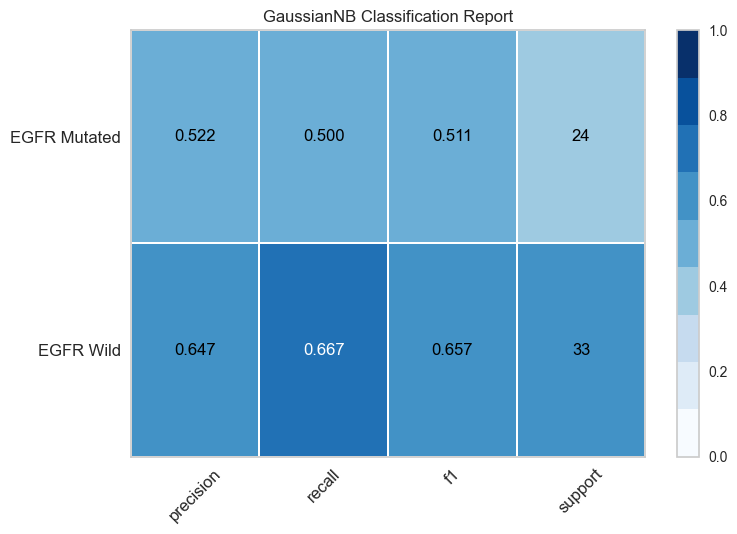

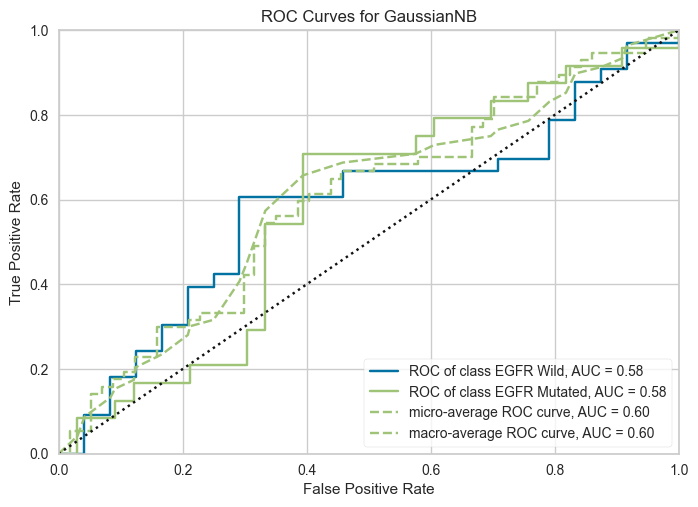

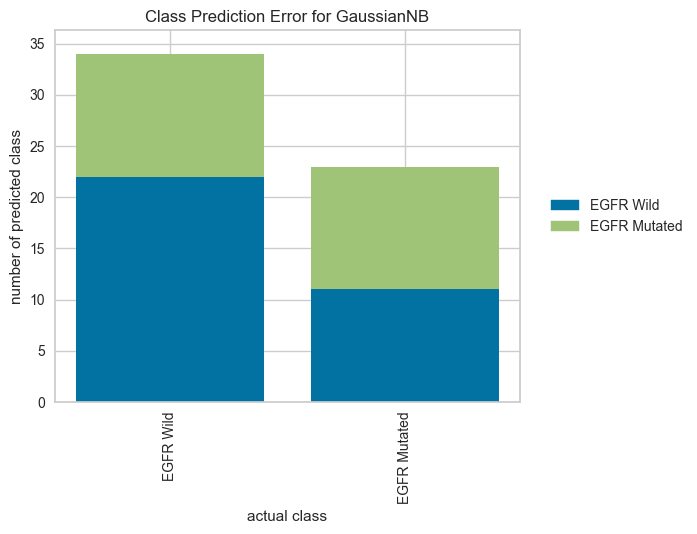

NameError: name 'X' is not defined

In [29]:
# plot_feature_importances(GNBreg)
plot_results(GNBreg)
# report_results_quickly(GNBreg)
plot_learning_curve(GNBreg)

################ Accuracy scores for test set for the models: ################

KNN: 0.585227

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    KNN           0.696          0.585


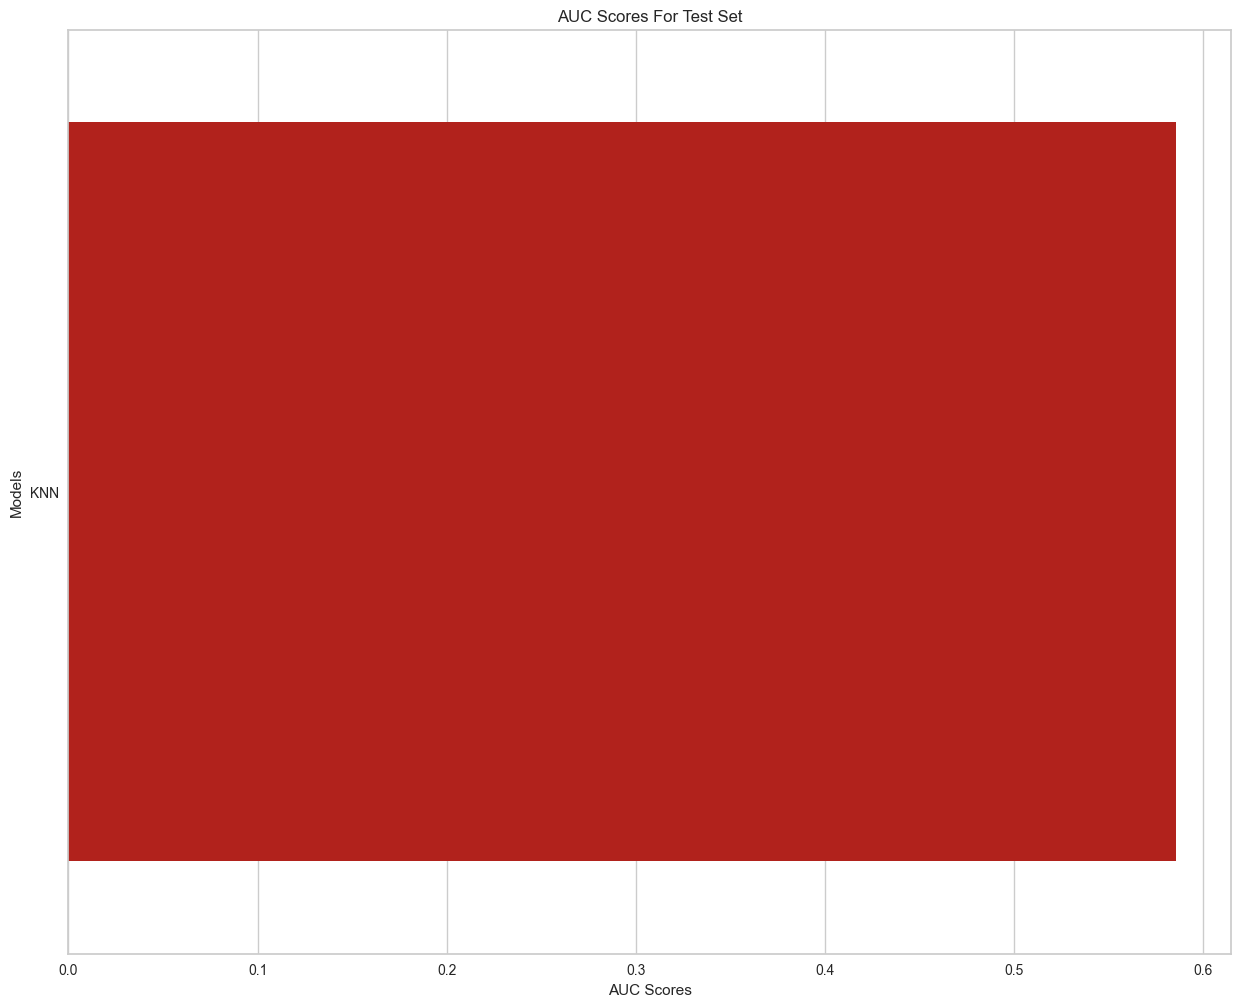

In [30]:
# LogisticRegression with make_pipeline
KNNreg = make_pipeline(MinMaxScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', KNNreg)]) # 0.805 instead of  0.805195

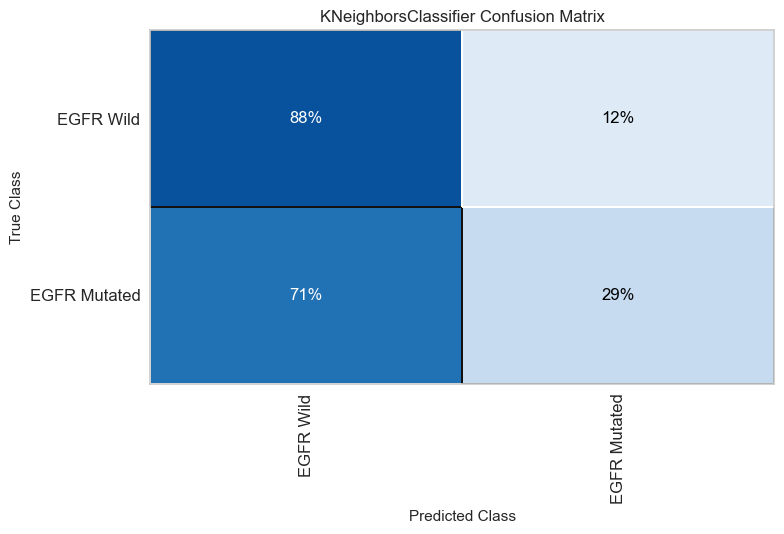

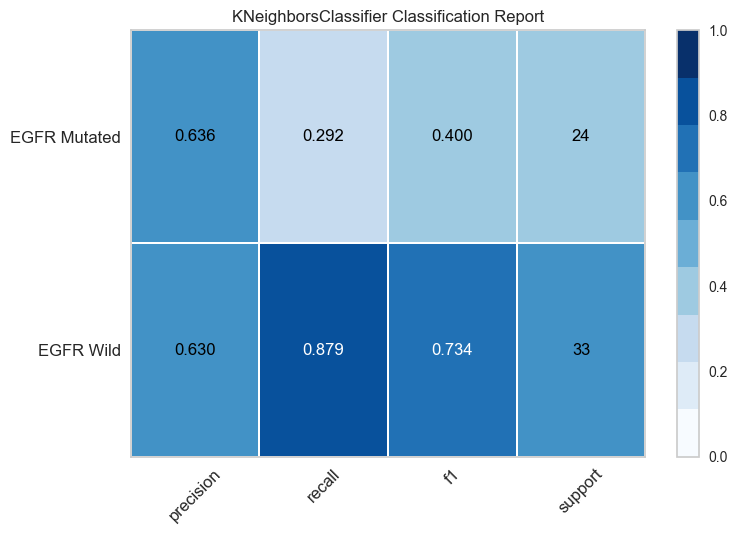

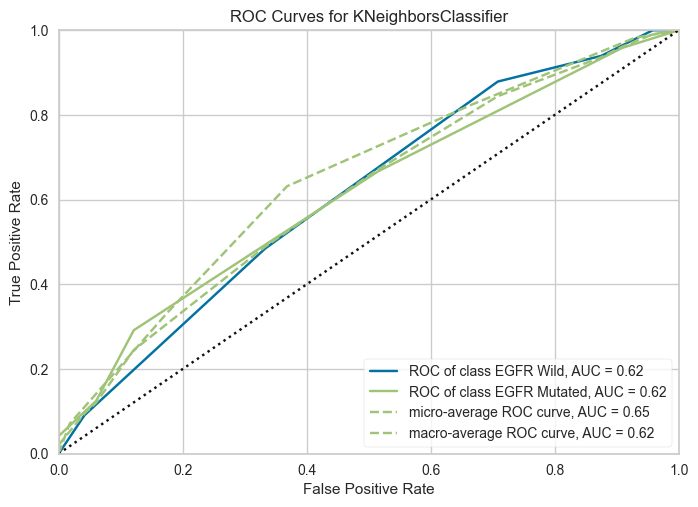

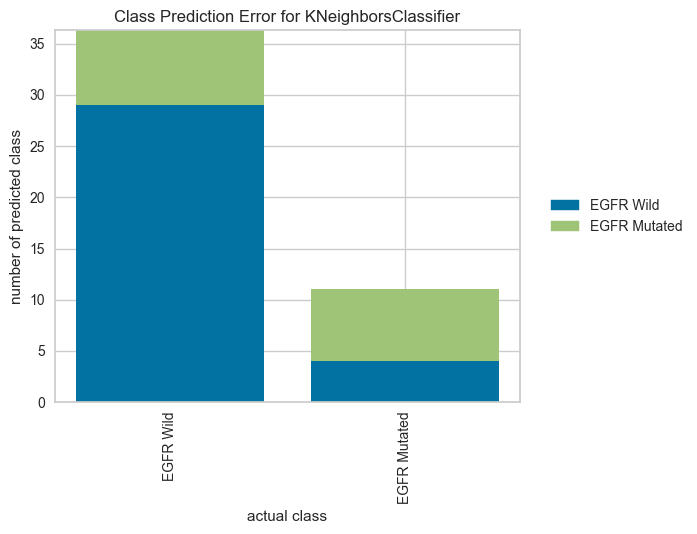

NameError: name 'X' is not defined

In [31]:
# plot_feature_importances(KNNreg)
plot_results(KNNreg)
# report_results_quickly(KNNreg)
plot_learning_curve(KNNreg)

In [ ]:
# LogisticRegression with make_pipeline
MLPreg = make_pipeline(MinMaxScaler(), MLPClassifier())
evaluate_classification_model_holdout([('MLP', MLPreg)]) # 0.805 instead of  0.805195

In [32]:
# plot_feature_importances(MLPreg)
plot_results(MLPreg)
# report_results_quickly(MLPreg)
plot_learning_curve(MLPreg)

NameError: name 'MLPreg' is not defined

################ Accuracy scores for test set for the models: ################

DT: 0.490530

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     DT           1.000          0.491


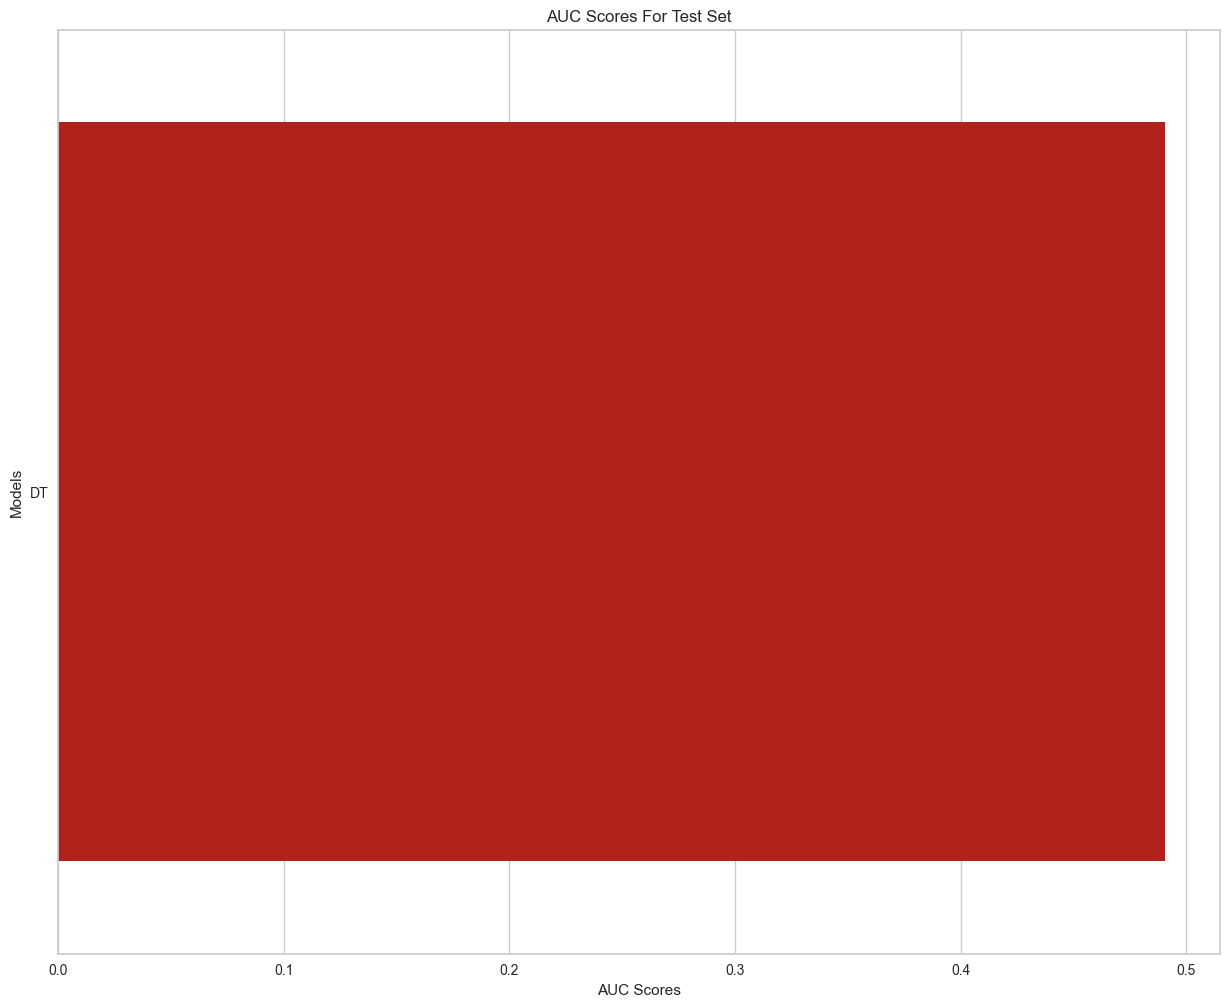

In [33]:
# LogisticRegression with make_pipeline
DTreg = make_pipeline(MinMaxScaler(), DecisionTreeClassifier())
evaluate_classification_model_holdout([('DT', DTreg)]) # 0.805 instead of  0.805195

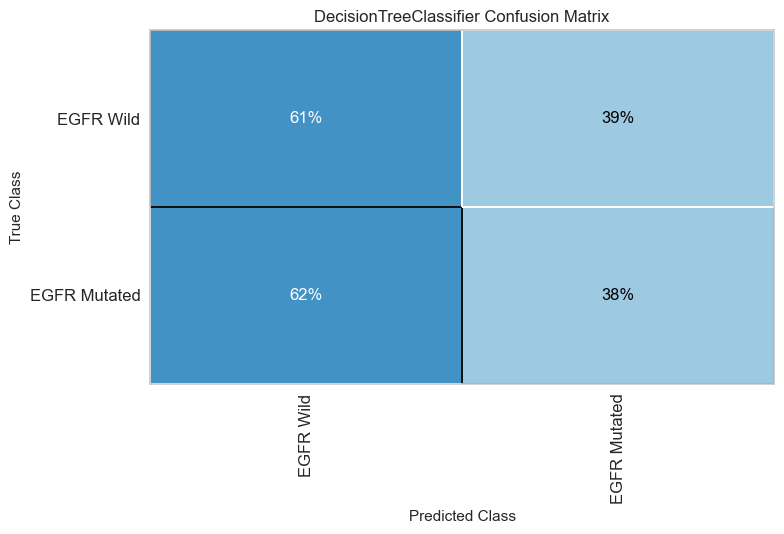

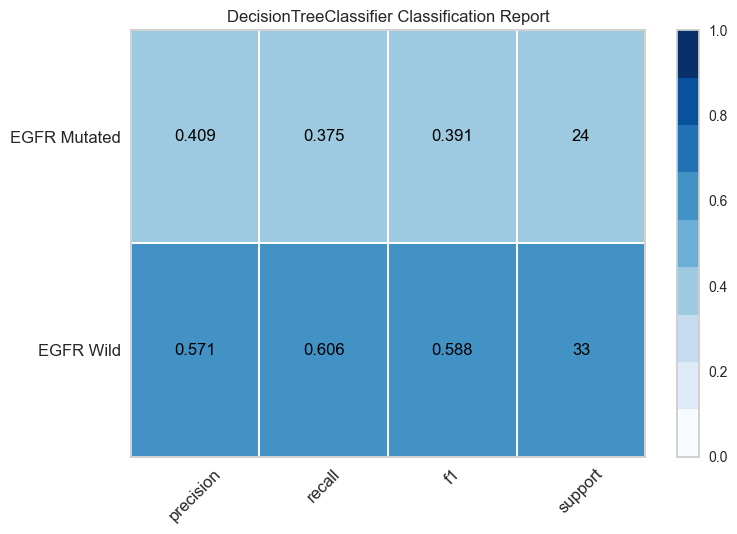

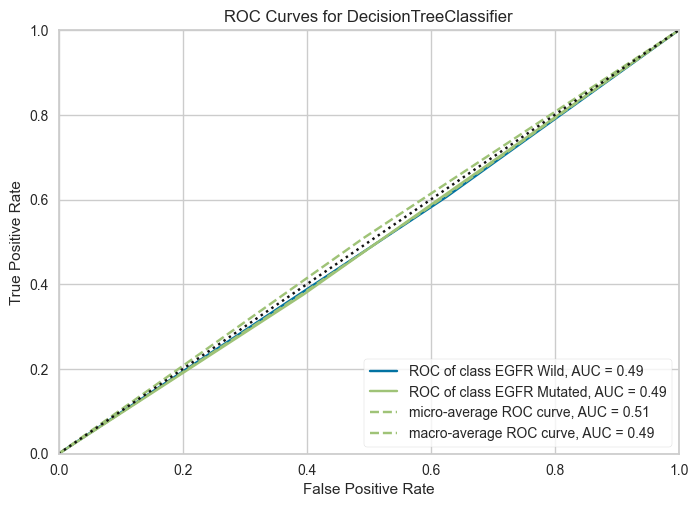

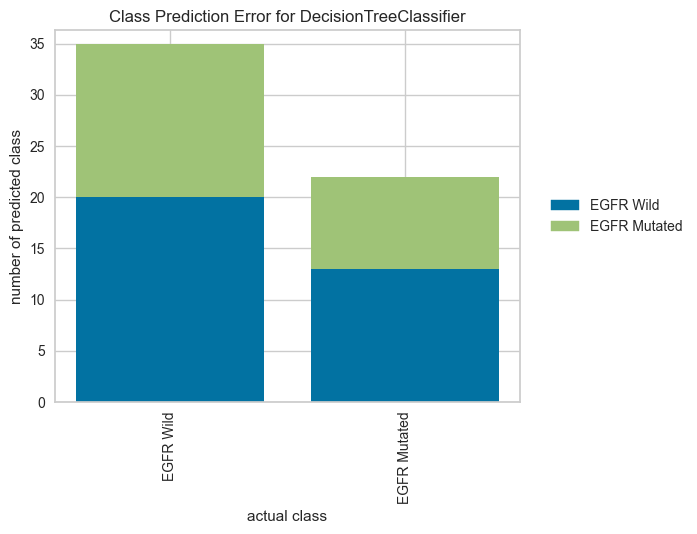

NameError: name 'X' is not defined

In [34]:
# plot_feature_importances(DTreg)
plot_results(DTreg)
# report_results_quickly(DTreg)
plot_learning_curve(DTreg)

################ Accuracy scores for test set for the models: ################

BC: 0.507576

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0     BC           0.976          0.508


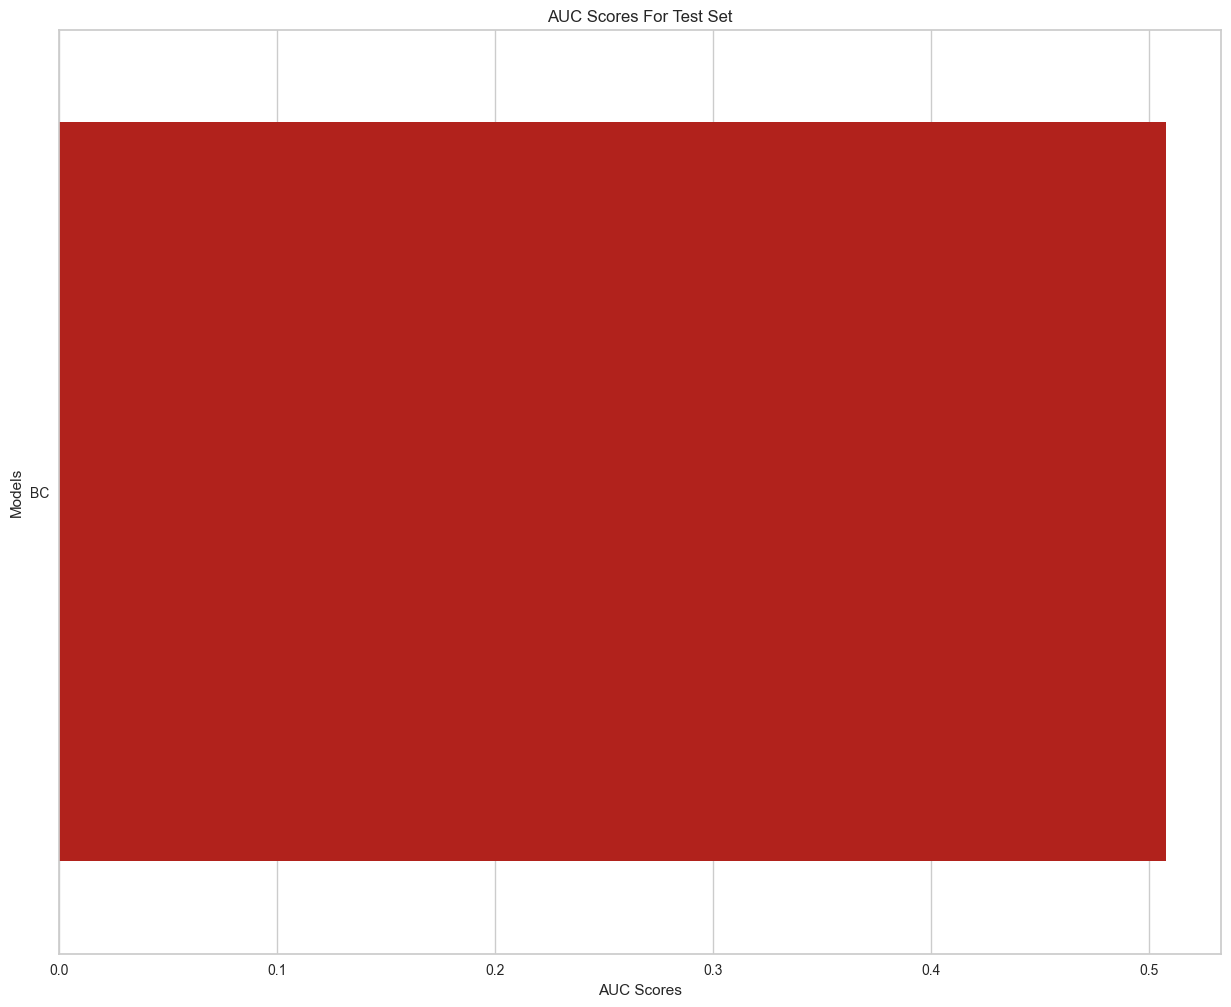

In [35]:
# LogisticRegression with make_pipeline
BCreg = make_pipeline(MinMaxScaler(), BaggingClassifier())
evaluate_classification_model_holdout([('BC', BCreg)]) # 0.805 instead of  0.805195

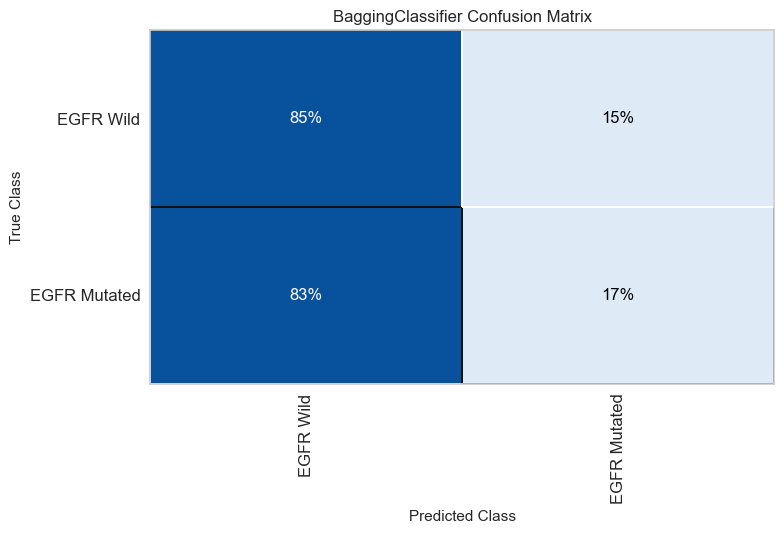

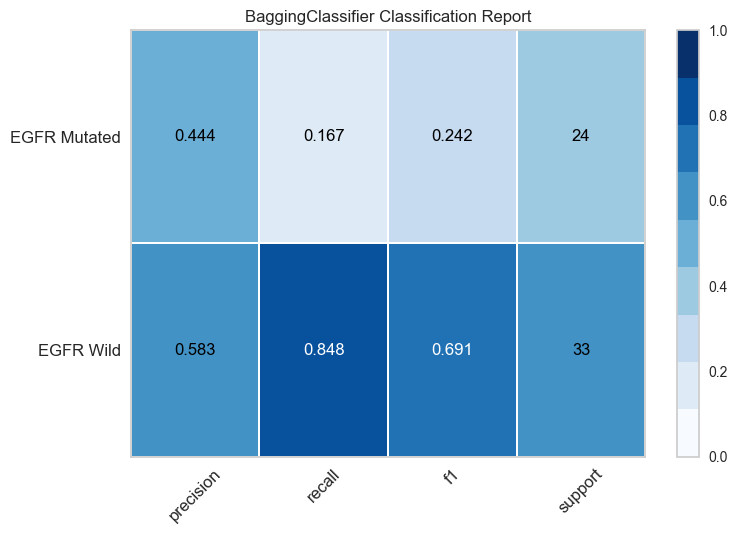

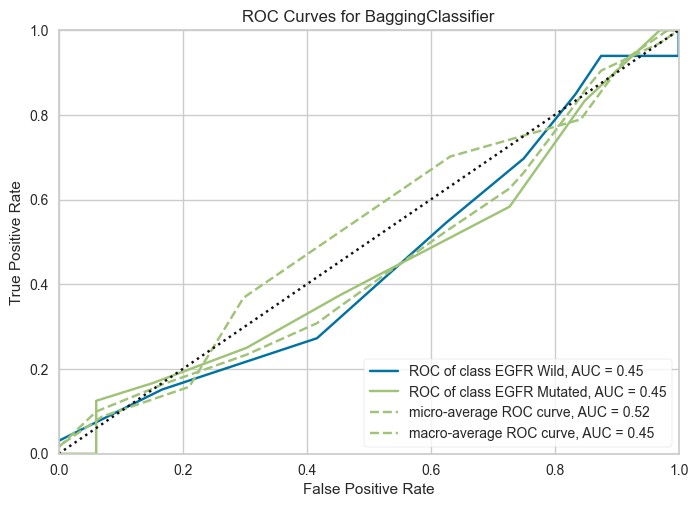

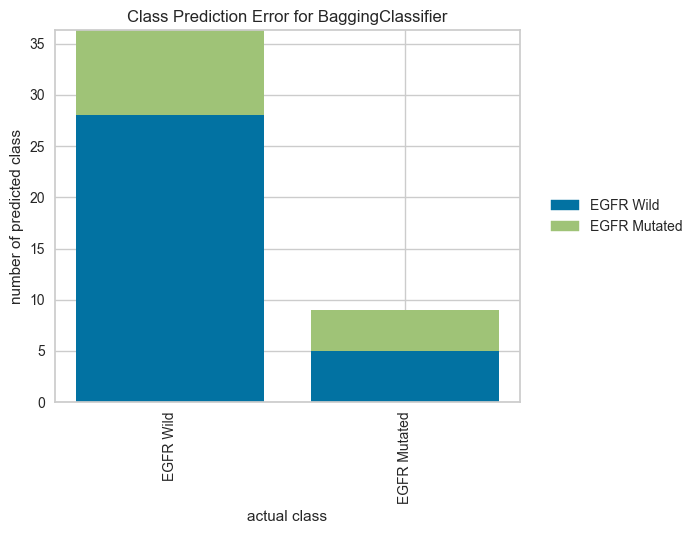

NameError: name 'X' is not defined

In [36]:
# plot_feature_importances(BCreg)
plot_results(BCreg)
# report_results_quickly(BCreg)
plot_learning_curve(BCreg)

################ Accuracy scores for test set for the models: ################

GBM: 0.482955

################ Train and test results for the model: ################

  models  accuracy_train  accuracy_test
0    GBM           1.000          0.483


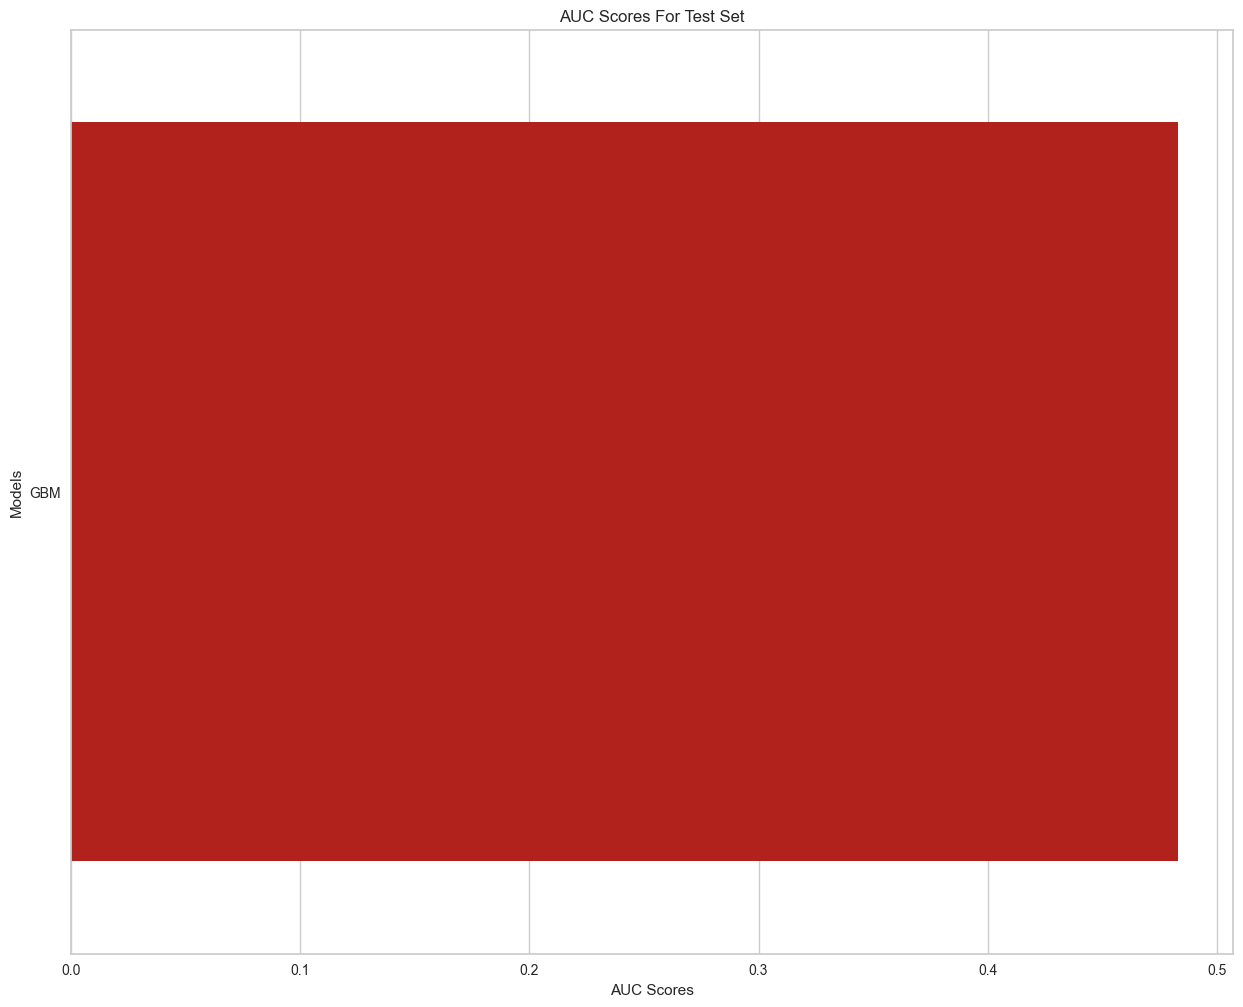

In [37]:
# LogisticRegression with make_pipeline
GBMreg = make_pipeline(MinMaxScaler(), GradientBoostingClassifier())
evaluate_classification_model_holdout([('GBM', GBMreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(GBMreg)
plot_results(GBMreg)
# report_results_quickly(GBMreg)
plot_learning_curve(GBMreg)

In [ ]:
# LogisticRegression with make_pipeline
ABreg = make_pipeline(MinMaxScaler(), AdaBoostClassifier())
evaluate_classification_model_holdout([('AB', ABreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ABreg)
plot_results(ABreg)
# report_results_quickly(ABreg)
plot_learning_curve(ABreg)

In [ ]:
# LogisticRegression with make_pipeline
ngbreg = make_pipeline(MinMaxScaler(), NGBClassifier(verbose=False))
evaluate_classification_model_holdout([('NGBClassifier', ngbreg)]) # 0.805 instead of  0.805195

In [ ]:
# plot_feature_importances(ngbreg)
# plot_results(ngbreg)
# report_results_quickly(ngbreg)
# plot_learning_curve(ngbreg)

In [ ]:
# KNN with make_pipeline
knn = make_pipeline(RobustScaler(), KNeighborsClassifier())
evaluate_classification_model_holdout([('KNN', knn)]) # 0.857 instead of 0.850649

In [ ]:
# plot_feature_importances(knn)
plot_results(knn)
# report_results_quickly(knn)
plot_learning_curve(knn)

In [ ]:
# SVC with make_pipeline
svc = make_pipeline(RobustScaler(), SVC())
evaluate_classification_model_holdout([('SVM', svc)]) # 0.864 instead of 0.837662

In [ ]:
# plot_feature_importances(svc)
plot_results(svc)
# report_results_quickly(svc)
plot_learning_curve(svc)

In [ ]:
# ANN with make_pipeline
ann = make_pipeline(StandardScaler(), MLPClassifier())
evaluate_classification_model_holdout([('ANN', ann)]) # 0.857 instead of 0.850649

In [32]:
# MODEL TUNING

'''
Models to be tuned:
    - LogisticRegression
    - RandomForestClassifier
    -SVM
    - LightGBMClassifier
    - XGBClassifier
'''

# LogisticRegression # 0.805195

logreg_model = LogisticRegression(random_state=42)
logreg_params = {'penalty': ['l1', 'l2'],
                 'C': [0.001, 0.009, 0.01, 0.09, 1, 5, 10, 25]}
logreg_cv_model = GridSearchCV(logreg_model, logreg_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
logreg_cv_model.best_params_ # {'C': 1, 'penalty': 'l2'}

Fitting 10 folds for each of 16 candidates, totalling 160 fits


C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\zuoya\.conda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py", line 449, in _check_solver
    %

{'C': 0.01, 'penalty': 'l2'}

In [33]:
# Final Model
logreg_tuned = LogisticRegression(**logreg_cv_model.best_params_).fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8051948051948052
roc_auc_score(y_test, y_pred)

0.49577294685990336

In [34]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-LR-NB', Save_format = 'csv',Save_type = 'col')

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-LR-NB.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.61      0.86      0.71        36
EGFR Mutated       0.38      0.13      0.19        23

    accuracy                           0.58        59
   macro avg       0.49      0.50      0.45        59
weighted avg       0.52      0.58      0.51        59

precision 0.375 accuracy 0.576271186440678 recall 0.13043478260869565 auc 0.49577294685990336


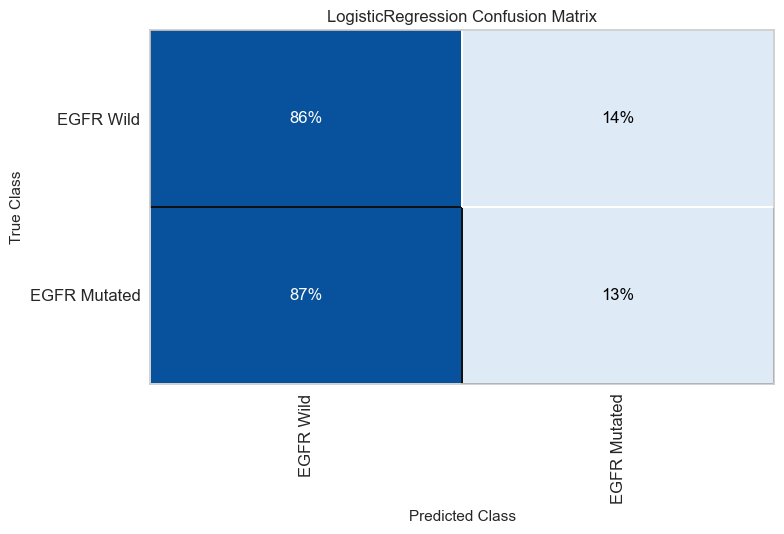

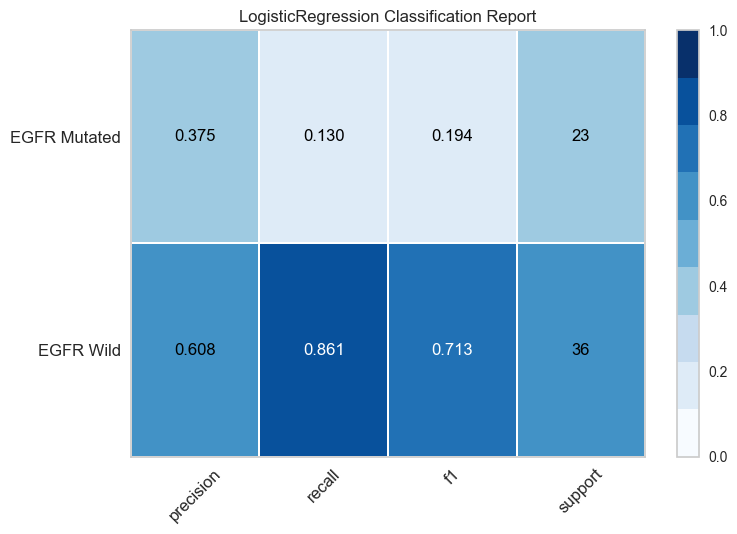

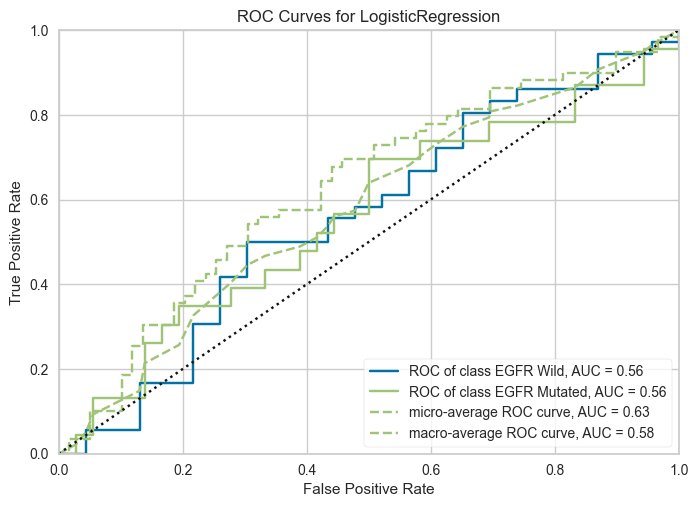

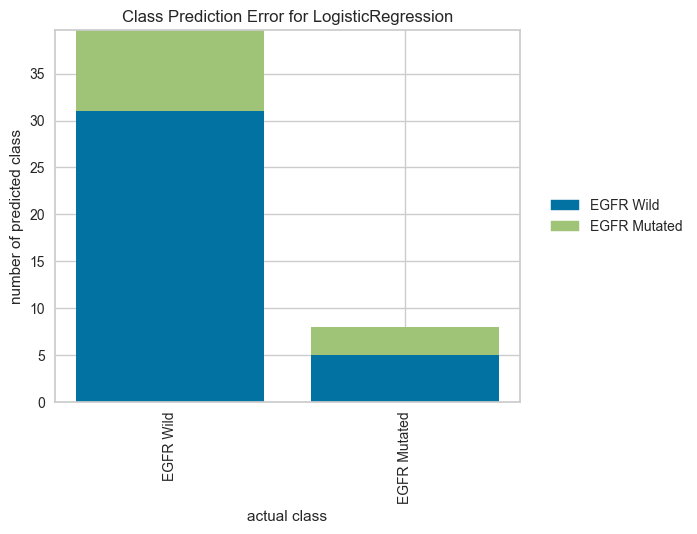

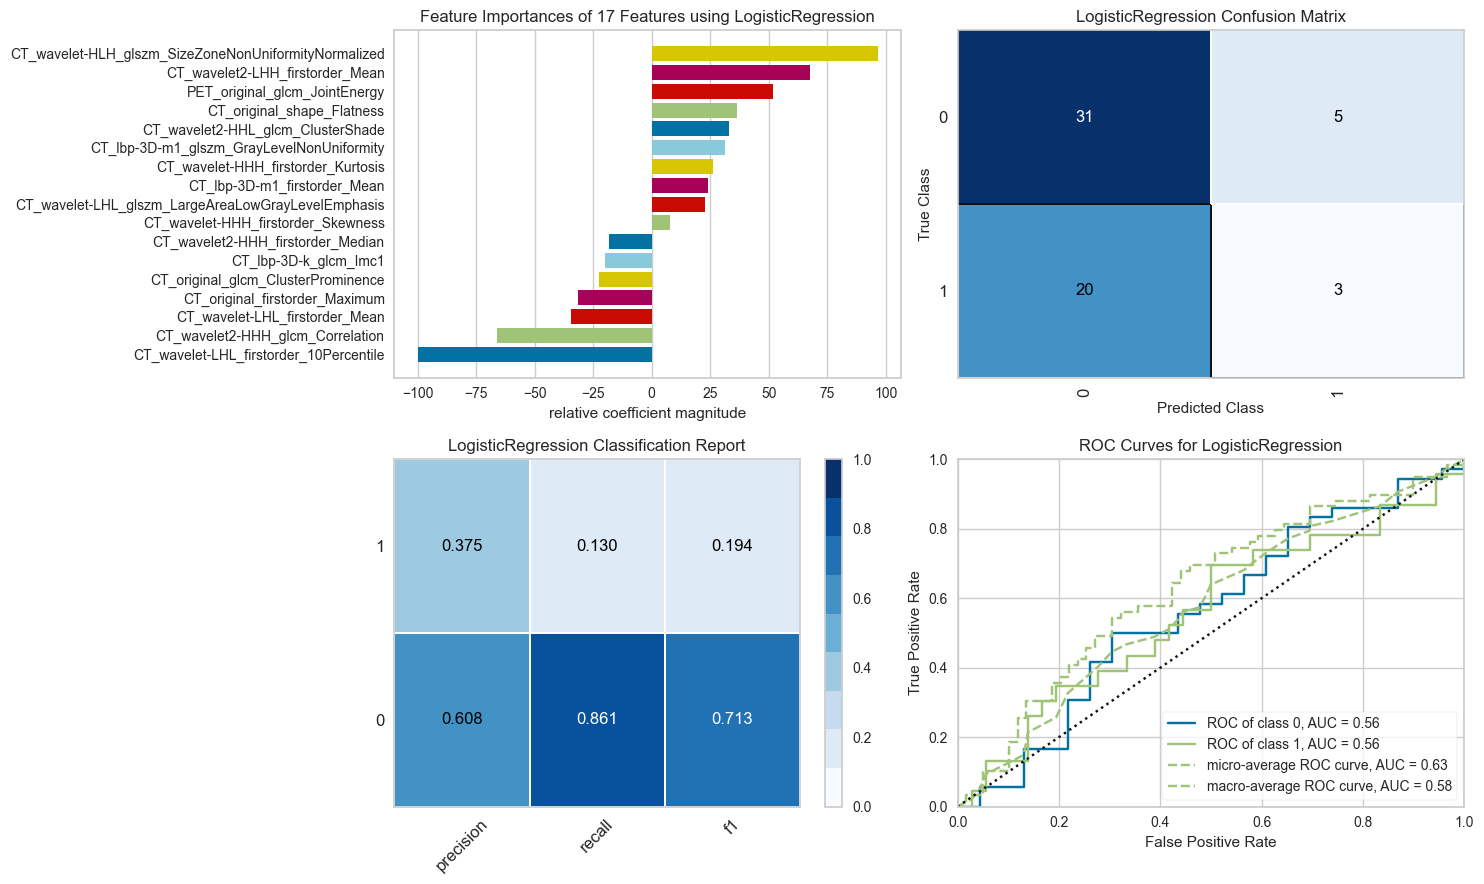

NameError: name 'X' is not defined

In [36]:
# Visualization of Results
# plot_feature_importances(logreg_tuned)
plot_results(logreg_tuned)
report_results_quickly(logreg_tuned)
plot_learning_curve(logreg_tuned)


In [37]:
# RandomForestClassifier # 0.876623

rf_model = RandomForestClassifier(random_state=42)
rf_params = {"n_estimators": [500, 800,1000,2000,3000,5000],
             "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
             "max_depth": [1,2,3,4, 5, 8, None]}

rf_cv_model = GridSearchCV(rf_model, rf_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
rf_cv_model.best_params_ # {'max_depth': None, 'min_samples_split': 7, 'n_estimators': 200}

Fitting 10 folds for each of 378 candidates, totalling 3780 fits


{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 2000}

In [38]:
rf_cv_model.best_params_   #0.6425000000000001   {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 10}

{'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 2000}

In [39]:
# Final Model
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
# accuracy_score(y_test, y_pred) # 0.8831168831168831
roc_auc_score(y_test, y_pred)

0.5428743961352657

In [40]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-RF73', Save_format = 'csv',Save_type = 'col')

In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-RF73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.64      0.69      0.67        36
EGFR Mutated       0.45      0.39      0.42        23

    accuracy                           0.58        59
   macro avg       0.55      0.54      0.54        59
weighted avg       0.57      0.58      0.57        59

precision 0.45 accuracy 0.576271186440678 recall 0.391304347826087 auc 0.5428743961352657


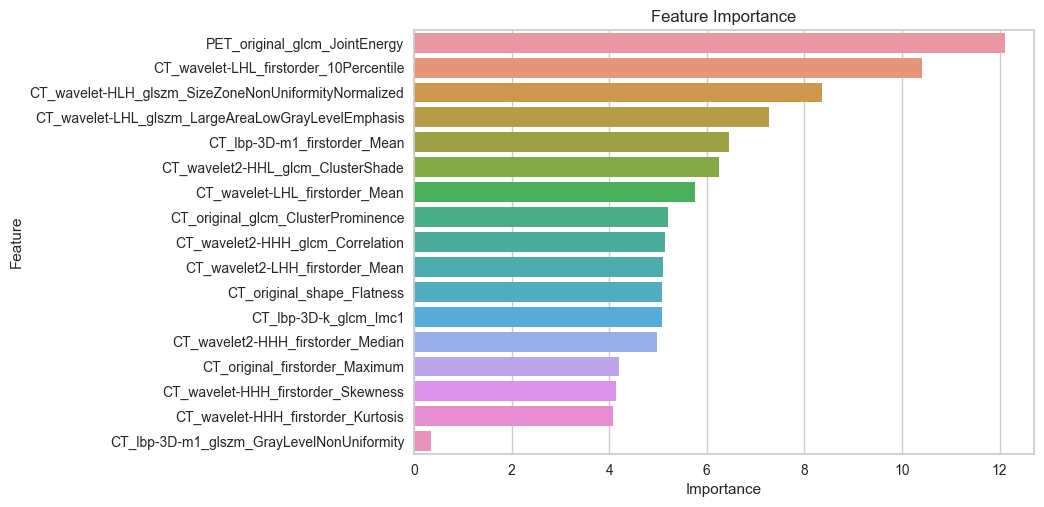

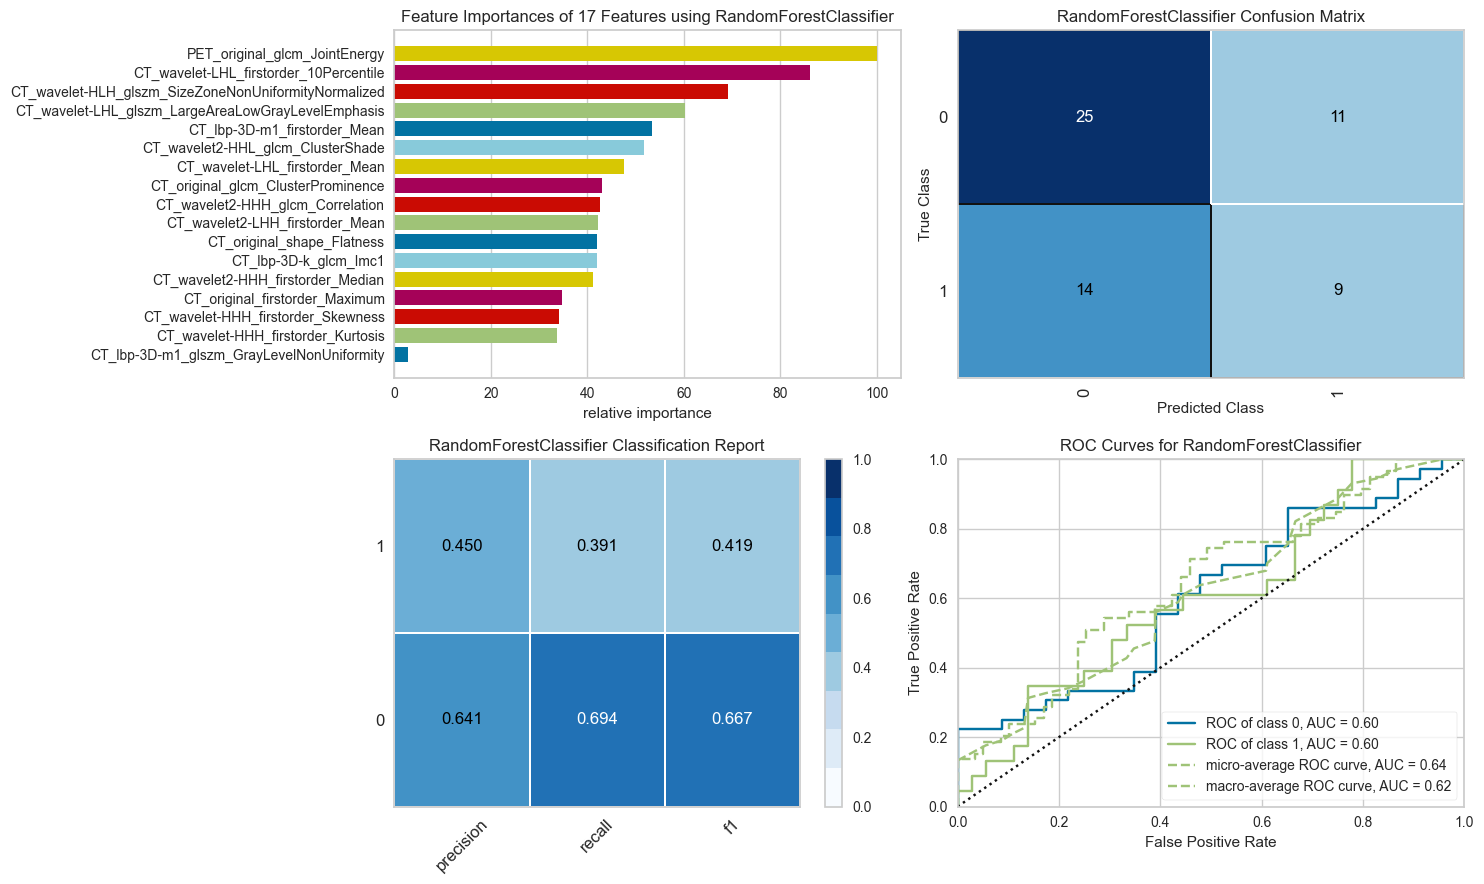

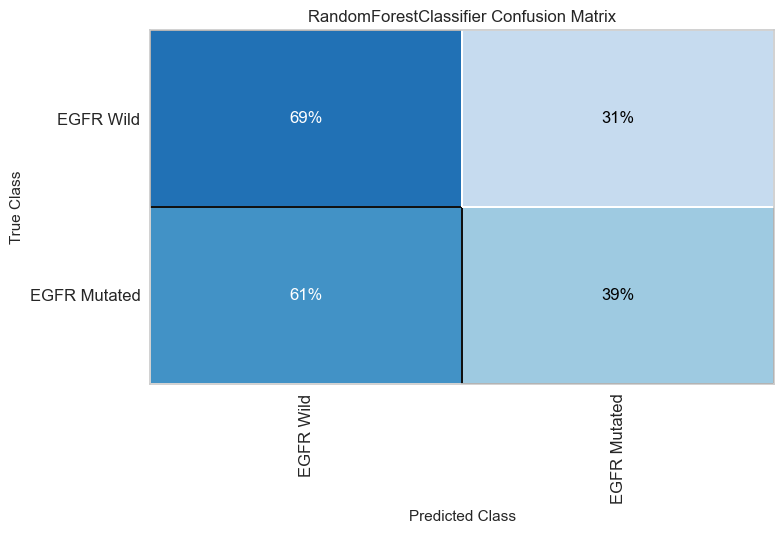

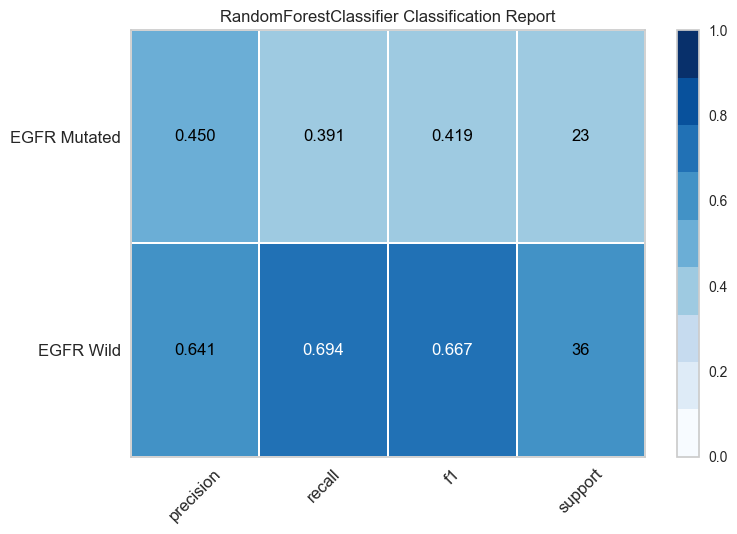

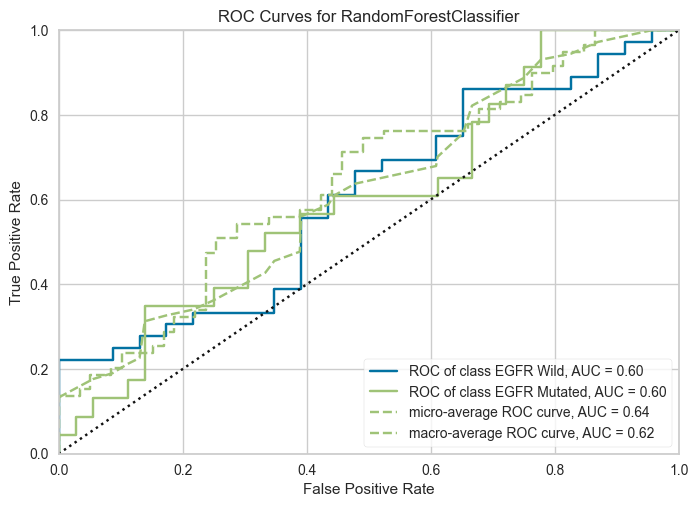

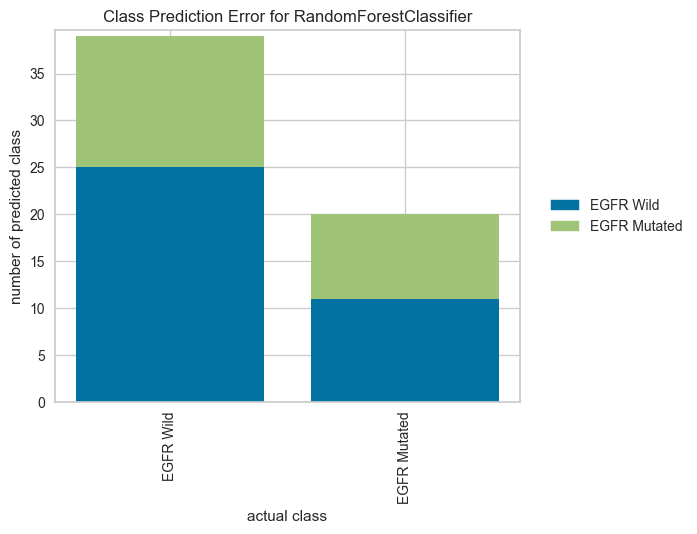

NameError: name 'X' is not defined

In [42]:
# Visualization of Results --> Feature Importances
plot_feature_importances(rf_tuned)
report_results_quickly(rf_tuned)
plot_results(rf_tuned)
plot_learning_curve(rf_tuned)

In [93]:
# CatBoostClassifier # 0.883117

from yellowbrick.contrib.wrapper import wrap
cb_model = CatBoostClassifier()
                                        
cb_params = {
#     'depth': [1,2,3,4, 6, 10],
          'learning_rate' : [0.01,0.03,0.05,0.15,0.1,0.3],
#          'l2_leaf_reg': [1,4,9],
         'iterations': [200,300,500,800,1200,2000,3000],
          'early_stopping_rounds':[2000,3000],
#              'subsample':[0.5,1.0],
             'max_depth':[1,3,5,6,8,10, None]
#              'n_estimators':[1000,3000,5000] 
#           'task_type':['GPU'],
#           'loss_function':['Binary'],
          
         }
# {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5000, 'subsample': 0.5}

cb_cv_model = GridSearchCV(cb_model, cb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
cb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}


Fitting 10 folds for each of 588 candidates, totalling 5880 fits
0:	learn: 0.6670082	total: 4.52ms	remaining: 3.61s
1:	learn: 0.6529612	total: 11.6ms	remaining: 4.64s
2:	learn: 0.6355229	total: 13.9ms	remaining: 3.69s
3:	learn: 0.6237086	total: 15.7ms	remaining: 3.12s
4:	learn: 0.6138547	total: 17.6ms	remaining: 2.8s
5:	learn: 0.6060734	total: 19.6ms	remaining: 2.59s
6:	learn: 0.5964815	total: 21.6ms	remaining: 2.45s
7:	learn: 0.5817934	total: 23.1ms	remaining: 2.29s
8:	learn: 0.5753762	total: 24.5ms	remaining: 2.15s
9:	learn: 0.5669573	total: 25.7ms	remaining: 2.03s
10:	learn: 0.5605109	total: 27.6ms	remaining: 1.98s
11:	learn: 0.5497484	total: 29.4ms	remaining: 1.93s
12:	learn: 0.5414885	total: 30.9ms	remaining: 1.87s
13:	learn: 0.5397251	total: 32.2ms	remaining: 1.81s
14:	learn: 0.5325593	total: 33.5ms	remaining: 1.75s
15:	learn: 0.5270273	total: 34.8ms	remaining: 1.71s
16:	learn: 0.5225012	total: 36.4ms	remaining: 1.68s
17:	learn: 0.5132852	total: 38.2ms	remaining: 1.66s
18:	learn:

193:	learn: 0.0552348	total: 348ms	remaining: 1.09s
194:	learn: 0.0548197	total: 350ms	remaining: 1.08s
195:	learn: 0.0545064	total: 352ms	remaining: 1.08s
196:	learn: 0.0544373	total: 354ms	remaining: 1.08s
197:	learn: 0.0536588	total: 355ms	remaining: 1.08s
198:	learn: 0.0532080	total: 357ms	remaining: 1.08s
199:	learn: 0.0526944	total: 359ms	remaining: 1.08s
200:	learn: 0.0526417	total: 361ms	remaining: 1.07s
201:	learn: 0.0525163	total: 362ms	remaining: 1.07s
202:	learn: 0.0522115	total: 364ms	remaining: 1.07s
203:	learn: 0.0512734	total: 365ms	remaining: 1.06s
204:	learn: 0.0506598	total: 366ms	remaining: 1.06s
205:	learn: 0.0502407	total: 368ms	remaining: 1.06s
206:	learn: 0.0495732	total: 369ms	remaining: 1.06s
207:	learn: 0.0487921	total: 370ms	remaining: 1.05s
208:	learn: 0.0486361	total: 371ms	remaining: 1.05s
209:	learn: 0.0481424	total: 372ms	remaining: 1.04s
210:	learn: 0.0475660	total: 375ms	remaining: 1.05s
211:	learn: 0.0467877	total: 377ms	remaining: 1.04s
212:	learn: 

402:	learn: 0.0150766	total: 690ms	remaining: 680ms
403:	learn: 0.0150371	total: 692ms	remaining: 678ms
404:	learn: 0.0149327	total: 694ms	remaining: 677ms
405:	learn: 0.0148490	total: 695ms	remaining: 675ms
406:	learn: 0.0147254	total: 696ms	remaining: 672ms
407:	learn: 0.0146314	total: 698ms	remaining: 671ms
408:	learn: 0.0145164	total: 700ms	remaining: 669ms
409:	learn: 0.0144589	total: 702ms	remaining: 668ms
410:	learn: 0.0144159	total: 703ms	remaining: 666ms
411:	learn: 0.0143712	total: 704ms	remaining: 663ms
412:	learn: 0.0143357	total: 705ms	remaining: 661ms
413:	learn: 0.0143287	total: 706ms	remaining: 658ms
414:	learn: 0.0143074	total: 707ms	remaining: 656ms
415:	learn: 0.0142446	total: 708ms	remaining: 654ms
416:	learn: 0.0141870	total: 709ms	remaining: 652ms
417:	learn: 0.0140493	total: 710ms	remaining: 649ms
418:	learn: 0.0139374	total: 712ms	remaining: 647ms
419:	learn: 0.0139024	total: 713ms	remaining: 645ms
420:	learn: 0.0138836	total: 715ms	remaining: 644ms
421:	learn: 

597:	learn: 0.0081640	total: 1.03s	remaining: 350ms
598:	learn: 0.0081252	total: 1.04s	remaining: 348ms
599:	learn: 0.0081161	total: 1.04s	remaining: 346ms
600:	learn: 0.0081158	total: 1.04s	remaining: 344ms
601:	learn: 0.0081064	total: 1.04s	remaining: 342ms
602:	learn: 0.0080823	total: 1.04s	remaining: 341ms
603:	learn: 0.0080747	total: 1.04s	remaining: 339ms
604:	learn: 0.0080724	total: 1.04s	remaining: 337ms
605:	learn: 0.0080636	total: 1.05s	remaining: 335ms
606:	learn: 0.0080614	total: 1.05s	remaining: 334ms
607:	learn: 0.0080424	total: 1.05s	remaining: 332ms
608:	learn: 0.0080424	total: 1.05s	remaining: 330ms
609:	learn: 0.0080414	total: 1.05s	remaining: 328ms
610:	learn: 0.0080414	total: 1.05s	remaining: 326ms
611:	learn: 0.0080270	total: 1.05s	remaining: 324ms
612:	learn: 0.0079778	total: 1.06s	remaining: 322ms
613:	learn: 0.0079467	total: 1.06s	remaining: 320ms
614:	learn: 0.0079468	total: 1.06s	remaining: 318ms
615:	learn: 0.0079284	total: 1.06s	remaining: 317ms
616:	learn: 

{'early_stopping_rounds': 2000,
 'iterations': 800,
 'learning_rate': 0.15,
 'max_depth': 3}

In [94]:
# Final Model
cb_tuned = CatBoostClassifier(**cb_cv_model.best_params_).fit(X_train, y_train,use_best_model=True)

y_pred = cb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

You should provide test set for use best model. use_best_model parameter has been switched to false value.


0:	learn: 0.6670082	total: 17.1ms	remaining: 13.7s
1:	learn: 0.6529612	total: 18.2ms	remaining: 7.24s
2:	learn: 0.6355229	total: 18.9ms	remaining: 5.02s
3:	learn: 0.6237086	total: 19.6ms	remaining: 3.89s
4:	learn: 0.6138547	total: 20.2ms	remaining: 3.21s
5:	learn: 0.6060734	total: 21ms	remaining: 2.77s
6:	learn: 0.5964815	total: 21.6ms	remaining: 2.45s
7:	learn: 0.5817934	total: 22.2ms	remaining: 2.2s
8:	learn: 0.5753762	total: 22.8ms	remaining: 2s
9:	learn: 0.5669573	total: 23.5ms	remaining: 1.86s
10:	learn: 0.5605109	total: 24.3ms	remaining: 1.74s
11:	learn: 0.5497484	total: 25.3ms	remaining: 1.66s
12:	learn: 0.5414885	total: 26ms	remaining: 1.57s
13:	learn: 0.5397251	total: 26.7ms	remaining: 1.5s
14:	learn: 0.5325593	total: 27.4ms	remaining: 1.43s
15:	learn: 0.5270273	total: 28ms	remaining: 1.37s
16:	learn: 0.5225012	total: 28.6ms	remaining: 1.32s
17:	learn: 0.5132852	total: 29.1ms	remaining: 1.27s
18:	learn: 0.5067734	total: 29.8ms	remaining: 1.23s
19:	learn: 0.5034106	total: 30.4m

282:	learn: 0.0275508	total: 178ms	remaining: 324ms
283:	learn: 0.0273077	total: 178ms	remaining: 324ms
284:	learn: 0.0270529	total: 179ms	remaining: 323ms
285:	learn: 0.0270271	total: 179ms	remaining: 322ms
286:	learn: 0.0267141	total: 180ms	remaining: 322ms
287:	learn: 0.0265174	total: 181ms	remaining: 321ms
288:	learn: 0.0263734	total: 181ms	remaining: 320ms
289:	learn: 0.0261538	total: 182ms	remaining: 319ms
290:	learn: 0.0259760	total: 182ms	remaining: 319ms
291:	learn: 0.0258662	total: 183ms	remaining: 318ms
292:	learn: 0.0256635	total: 183ms	remaining: 317ms
293:	learn: 0.0256516	total: 184ms	remaining: 317ms
294:	learn: 0.0256362	total: 184ms	remaining: 316ms
295:	learn: 0.0256117	total: 185ms	remaining: 315ms
296:	learn: 0.0253659	total: 186ms	remaining: 314ms
297:	learn: 0.0250684	total: 186ms	remaining: 314ms
298:	learn: 0.0247867	total: 187ms	remaining: 313ms
299:	learn: 0.0246654	total: 187ms	remaining: 312ms
300:	learn: 0.0245102	total: 188ms	remaining: 312ms
301:	learn: 

575:	learn: 0.0086037	total: 340ms	remaining: 132ms
576:	learn: 0.0085659	total: 341ms	remaining: 132ms
577:	learn: 0.0085294	total: 341ms	remaining: 131ms
578:	learn: 0.0085244	total: 342ms	remaining: 130ms
579:	learn: 0.0085244	total: 342ms	remaining: 130ms
580:	learn: 0.0085117	total: 343ms	remaining: 129ms
581:	learn: 0.0084609	total: 343ms	remaining: 129ms
582:	learn: 0.0084458	total: 344ms	remaining: 128ms
583:	learn: 0.0084422	total: 344ms	remaining: 127ms
584:	learn: 0.0084391	total: 345ms	remaining: 127ms
585:	learn: 0.0084001	total: 345ms	remaining: 126ms
586:	learn: 0.0083789	total: 346ms	remaining: 126ms
587:	learn: 0.0083587	total: 346ms	remaining: 125ms
588:	learn: 0.0083587	total: 347ms	remaining: 124ms
589:	learn: 0.0083488	total: 348ms	remaining: 124ms
590:	learn: 0.0083219	total: 348ms	remaining: 123ms
591:	learn: 0.0083218	total: 349ms	remaining: 122ms
592:	learn: 0.0082978	total: 349ms	remaining: 122ms
593:	learn: 0.0082592	total: 350ms	remaining: 121ms
594:	learn: 

0.5932203389830508

In [95]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [96]:
# shap.dependence_plot(y_train, shap_values, X_train)

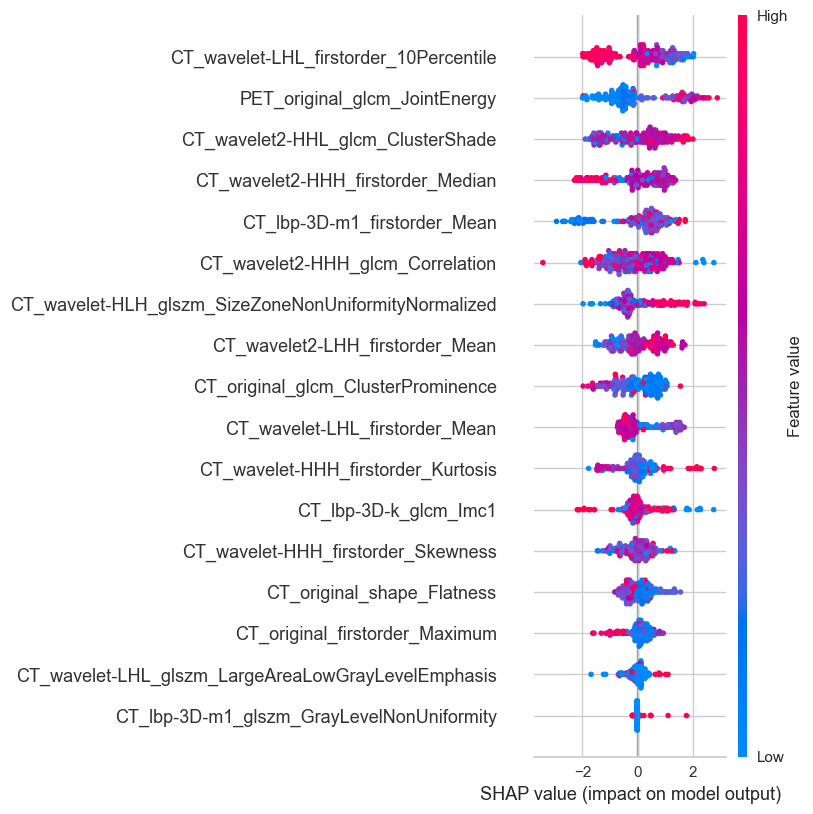

In [97]:

shap.summary_plot(shap_values, X_train)

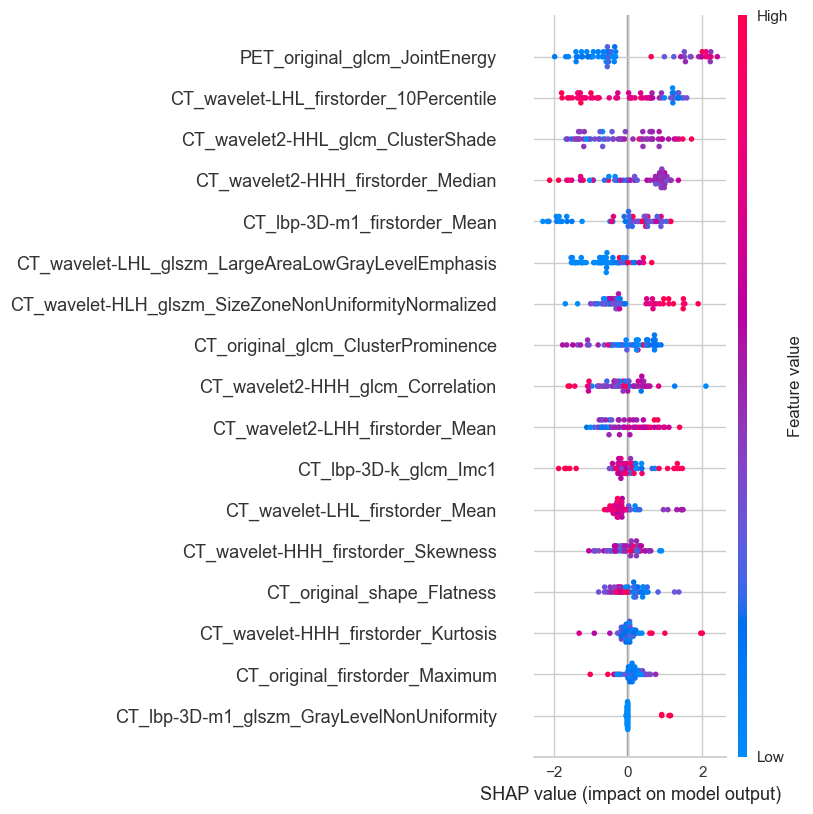

In [98]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [99]:
import shap
explainer = shap.TreeExplainer(cb_tuned)
shap_values = explainer.shap_values(X_test)

# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [100]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-CBC73', Save_format = 'csv',Save_type = 'col')

In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-CBC73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.64      0.75      0.69        36
EGFR Mutated       0.47      0.35      0.40        23

    accuracy                           0.59        59
   macro avg       0.56      0.55      0.55        59
weighted avg       0.58      0.59      0.58        59

precision 0.47058823529411764 accuracy 0.5932203389830508 recall 0.34782608695652173 auc 0.5489130434782609


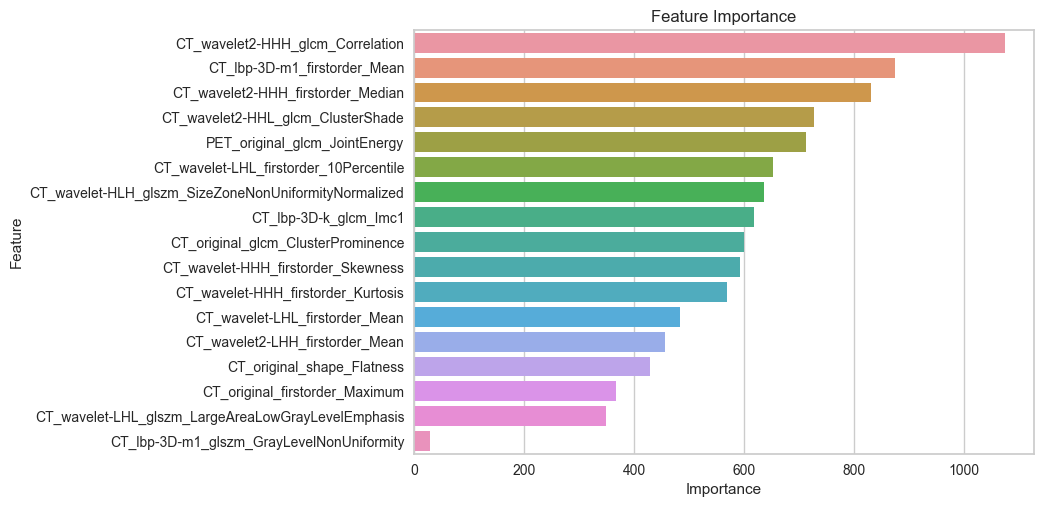

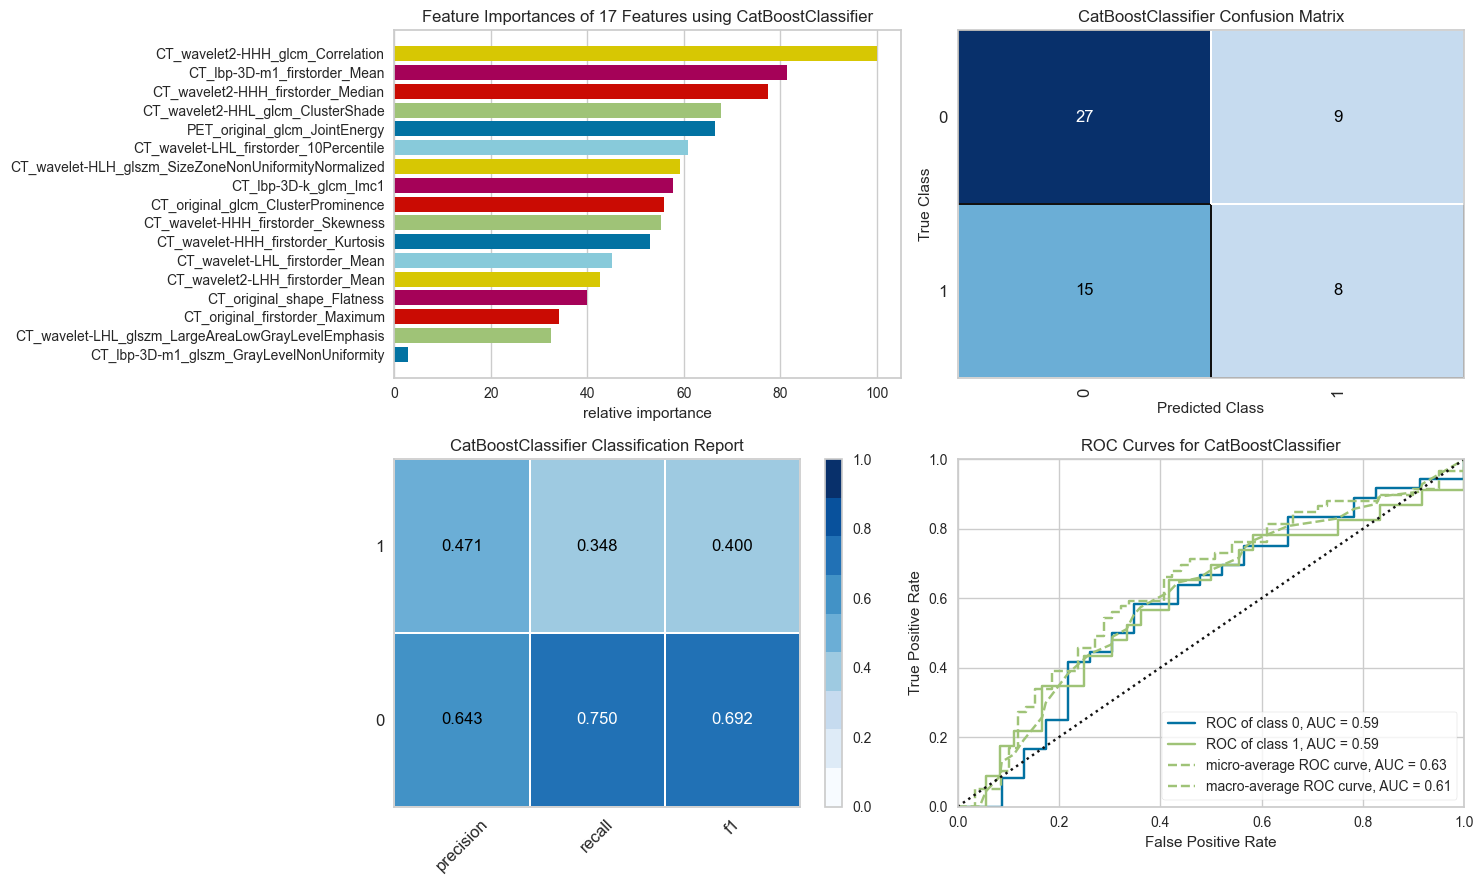

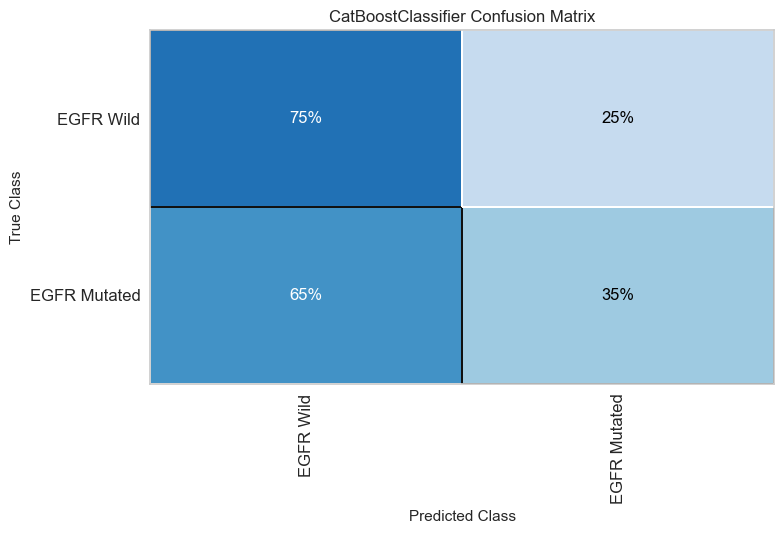

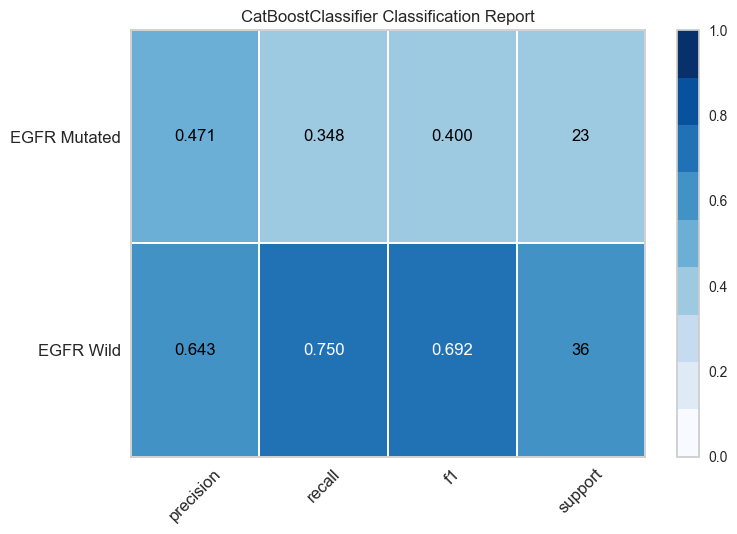

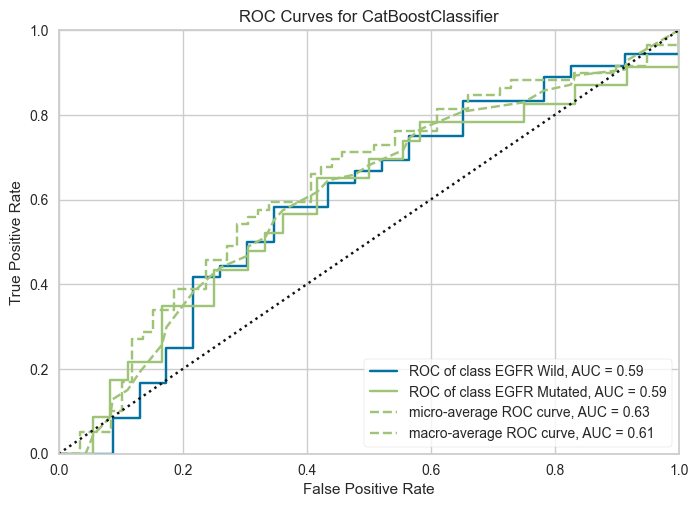

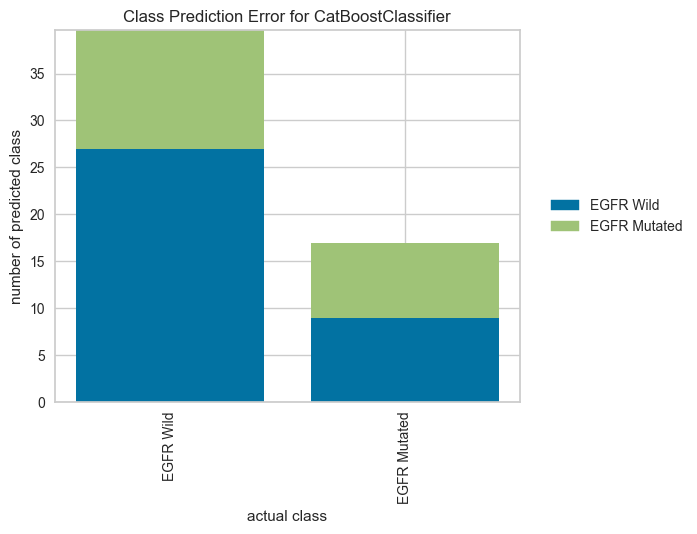

NameError: name 'X' is not defined

In [102]:
# Visualization of Results --> Feature Importances
cb_tuned1 = wrap(cb_tuned)
plot_feature_importances(cb_tuned1)
report_results_quickly(cb_tuned1)
plot_results(cb_tuned1)
plot_learning_curve(cb_tuned1)


In [43]:
# # AdaBoostClassifier # 0.883117

adb_model = AdaBoostClassifier()
adb_params = {"learning_rate": [0.001, 0.01,0.1, 0.2, 0.5],              
#               "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [200,500,800,1000,2000,3000,5000]#,2000,3000,5000,10000
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

adb_cv_model = GridSearchCV(adb_model, adb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
adb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 35 candidates, totalling 350 fits


{'learning_rate': 0.1, 'n_estimators': 1000}

In [44]:
# Final Model
adb_tuned = AdaBoostClassifier(**adb_cv_model.best_params_).fit(X_train, y_train)
y_pred = adb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.5423728813559322

In [45]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-ADB73', Save_format = 'csv',Save_type = 'col')

In [46]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-ADB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ['EGFR E19', 'EGFR E21']
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

    EGFR E19       0.60      0.72      0.66        36
    EGFR E21       0.38      0.26      0.31        23

    accuracy                           0.54        59
   macro avg       0.49      0.49      0.48        59
weighted avg       0.52      0.54      0.52        59

precision 0.375 accuracy 0.5423728813559322 recall 0.2608695652173913 auc 0.4915458937198068


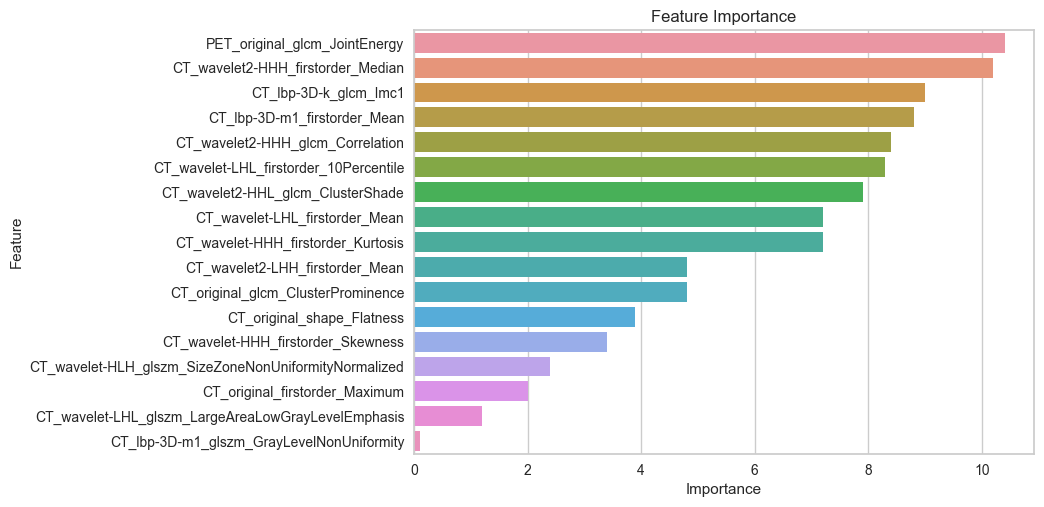

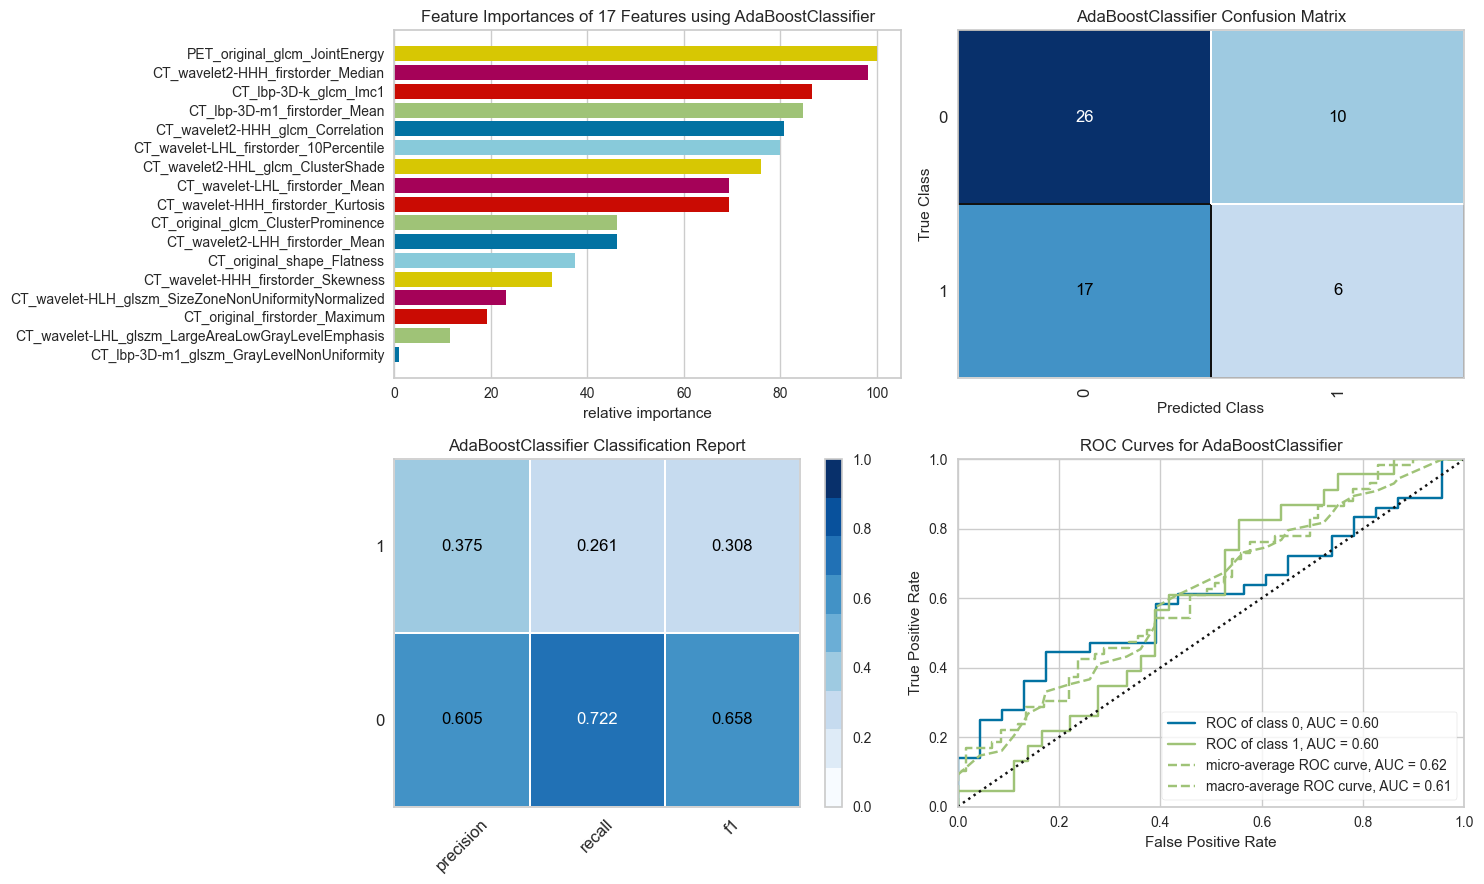

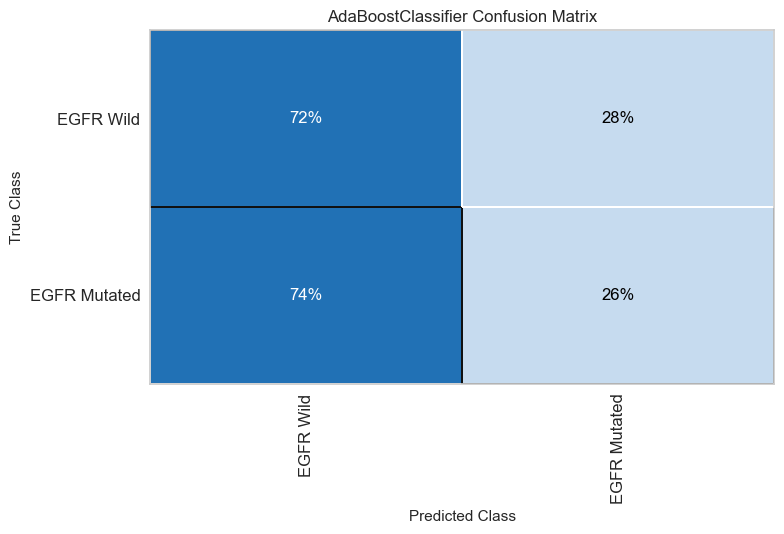

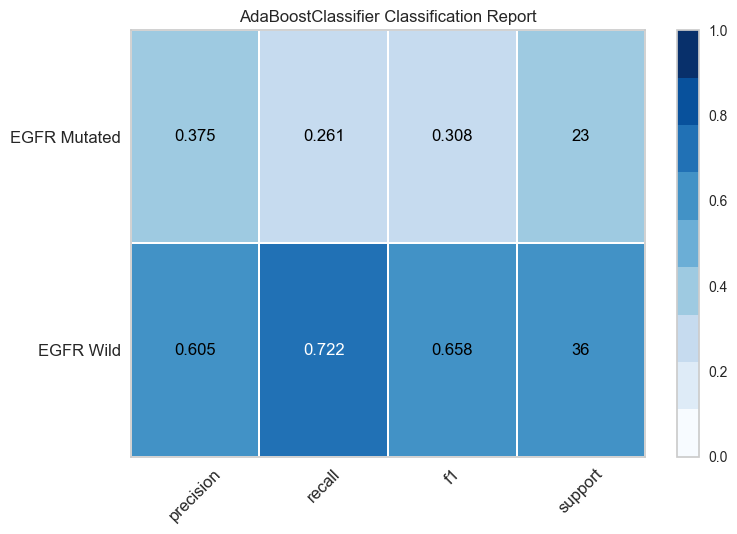

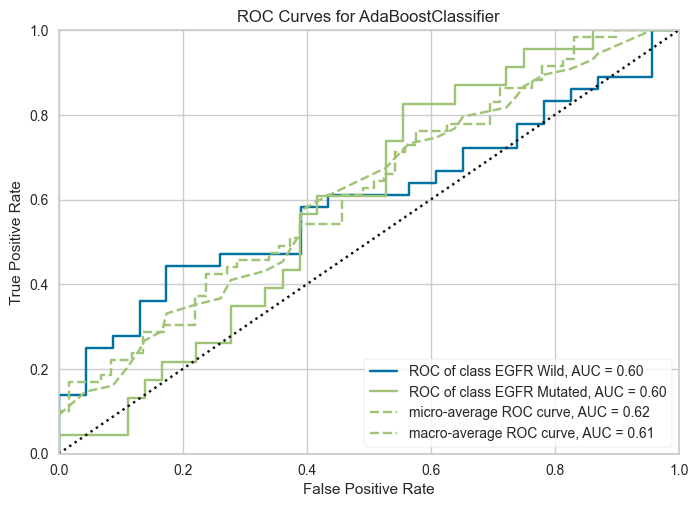

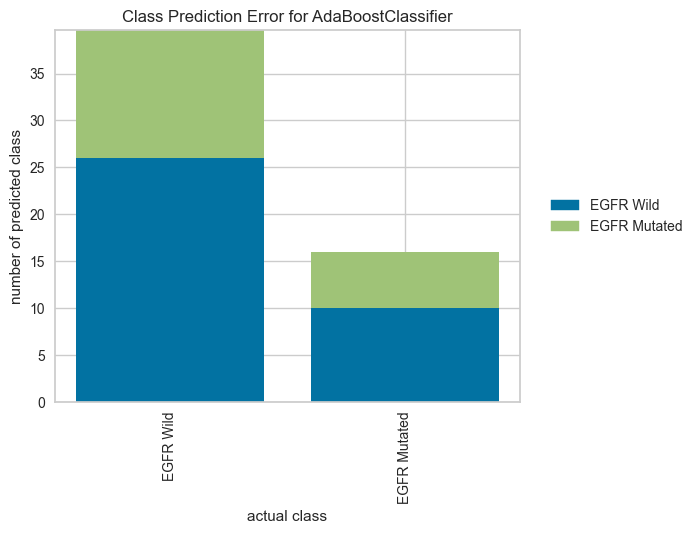

NameError: name 'X' is not defined

In [47]:
# # Visualization of Results --> Feature Importances
# # adb_tuned = wrap(adb_tuned)
plot_feature_importances(adb_tuned)
report_results_quickly(adb_tuned)
plot_results(adb_tuned)
plot_learning_curve(adb_tuned)

In [48]:
# # GradientBoostingClassifier # 0.883117

gbdt_model = GradientBoostingClassifier()
gbdt_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.6, 0.7,0.8],
              "n_estimators": [ 200,500,800,1000,2000,3000,5000]#
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
#               "max_depth": [1,2,3, None]
             } #,4, 5, 8

gbdt_cv_model = GridSearchCV(gbdt_model, gbdt_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
gbdt_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.9}

Fitting 10 folds for each of 112 candidates, totalling 1120 fits


{'learning_rate': 0.1, 'n_estimators': 1000, 'subsample': 0.6}

In [49]:
# Final Model
gbdt_tuned = GradientBoostingClassifier(**gbdt_cv_model.best_params_).fit(X_train, y_train)
y_pred = gbdt_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766

0.6610169491525424

In [50]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-gbdt', Save_format = 'csv',Save_type = 'col')

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca--NB-gbdt.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.70      0.78      0.74        36
EGFR Mutated       0.58      0.48      0.52        23

    accuracy                           0.66        59
   macro avg       0.64      0.63      0.63        59
weighted avg       0.65      0.66      0.65        59

precision 0.5789473684210527 accuracy 0.6610169491525424 recall 0.4782608695652174 auc 0.6280193236714976


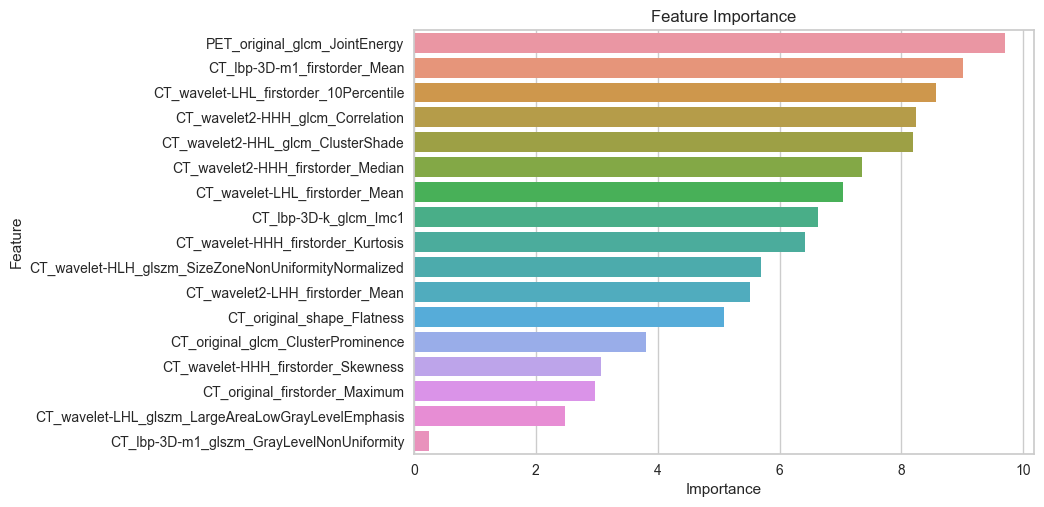

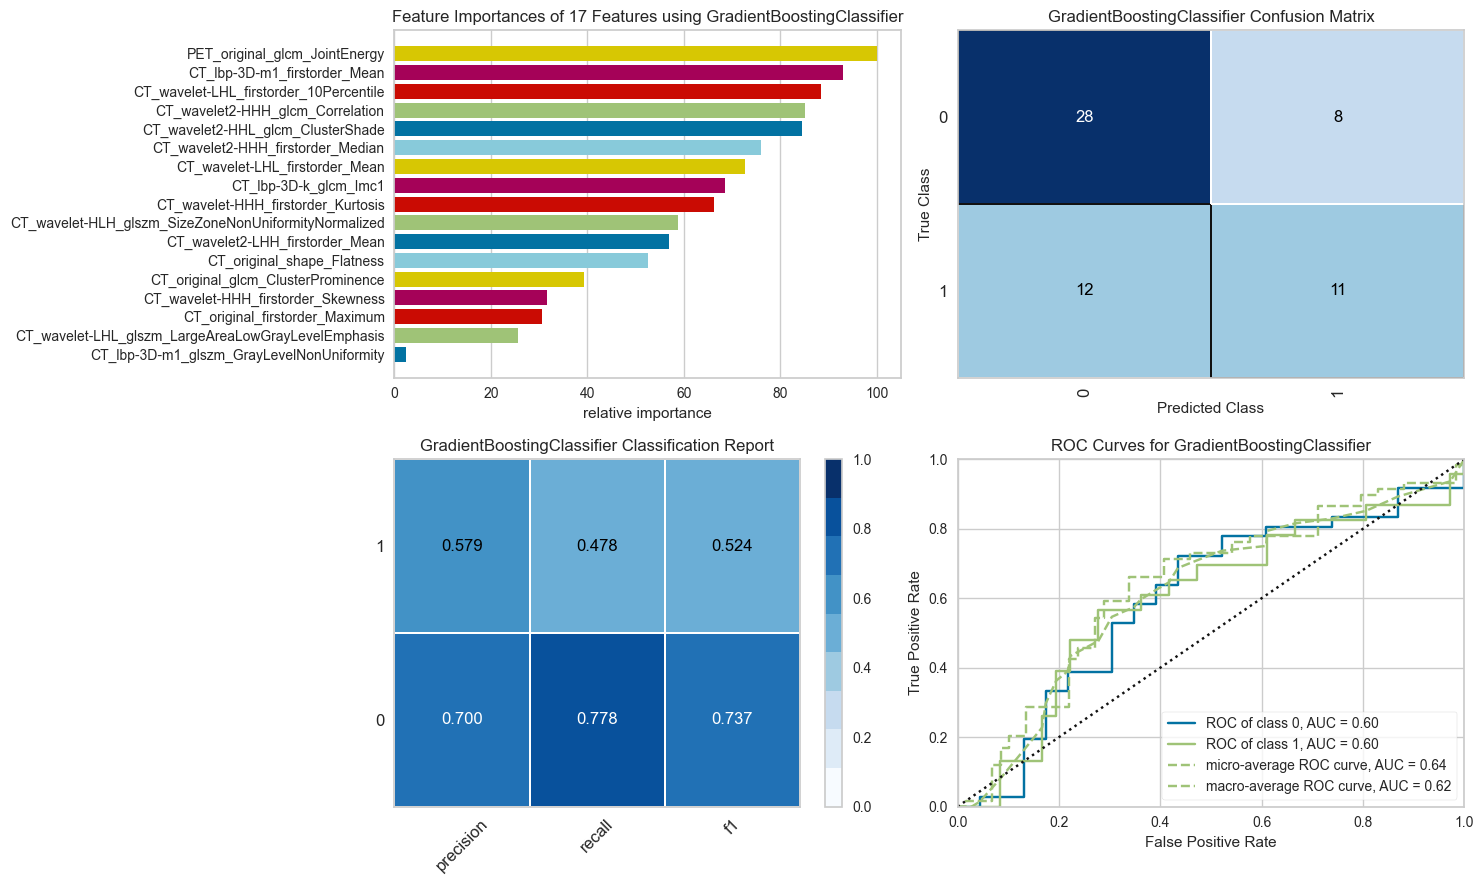

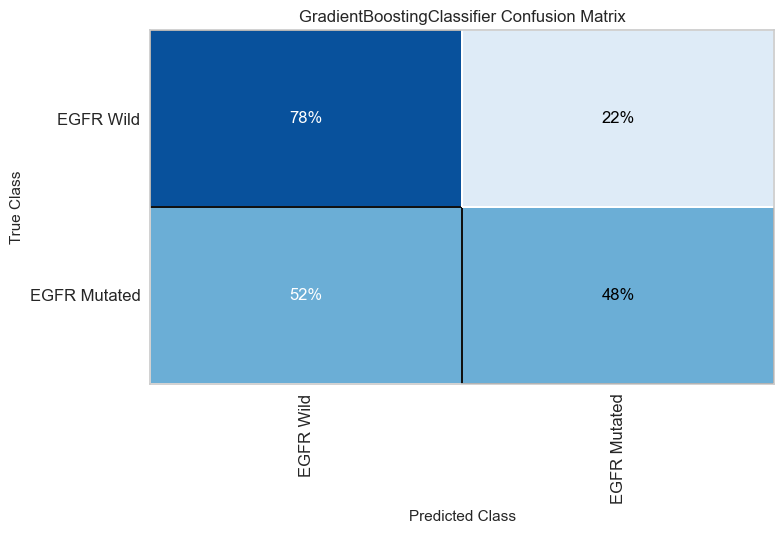

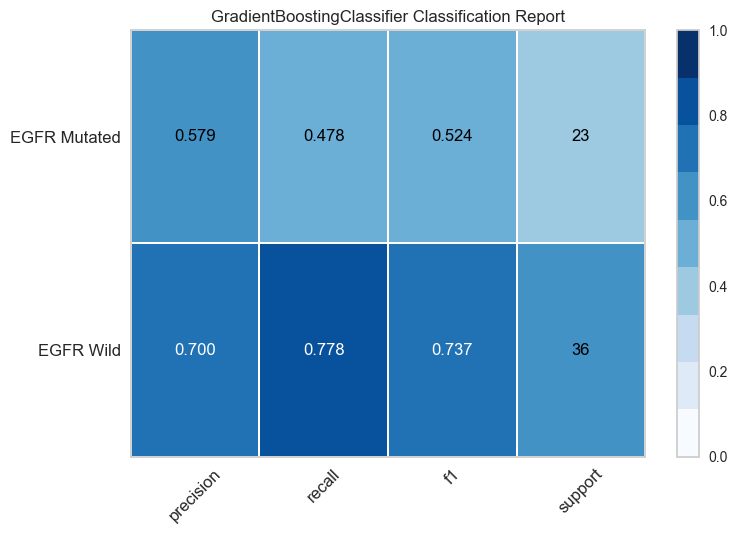

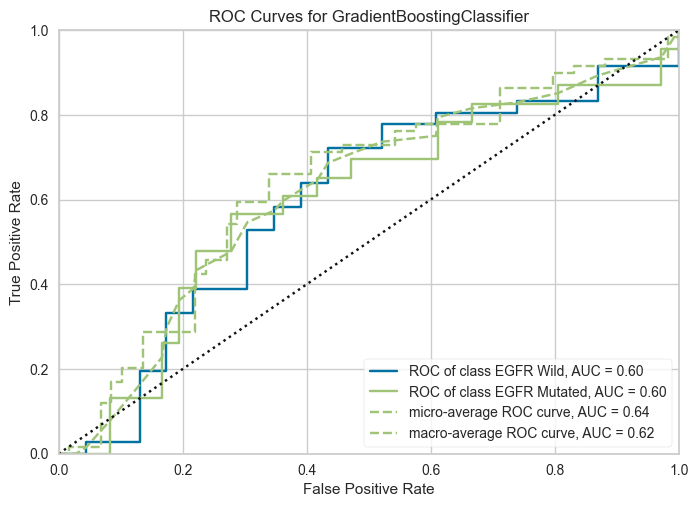

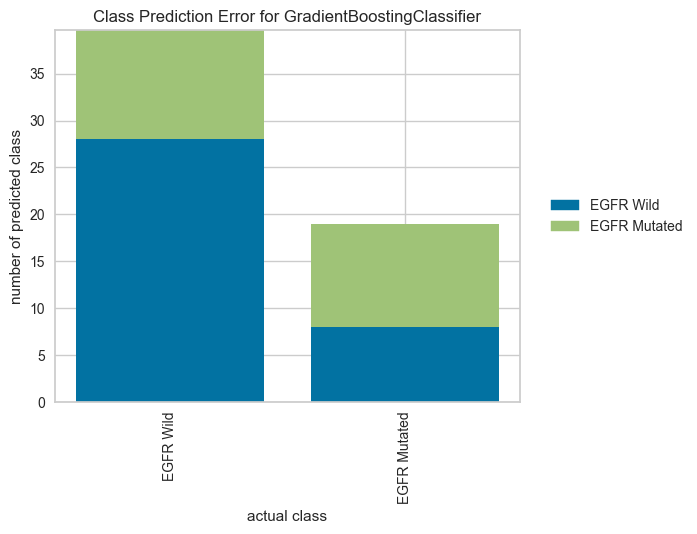

NameError: name 'X' is not defined

In [52]:
# # Visualization of Results --> Feature Importances
# # ngb_tuned = wrap(ngb_tuned)
plot_feature_importances(gbdt_tuned)

report_results_quickly(gbdt_tuned)
plot_results(gbdt_tuned)
plot_learning_curve(gbdt_tuned)

In [53]:
# XGBClassifier # 0.883117

xgb_model = XGBClassifier(random_state=42)
xgb_params = {"learning_rate": [0.01, 0.1, 0.2, 0.5],              
              "subsample": [0.5, 0.9, 1.0],
              "n_estimators": [ 500,1000,2000,3000,5000,10000],
#               "max_features": [3,4,5],
#               "min_samples_split": [2, 5,7,8,9, 10,15,20, 30],
              "max_depth": [1,2,3,4, 5, 8, None]}

xgb_cv_model = GridSearchCV(xgb_model, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
xgb_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2000, 'subsample': 0.5}

Fitting 10 folds for each of 504 candidates, totalling 5040 fits


{'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.9}

In [54]:
# Final Model
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X_train, y_train)
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.6101694915254238

In [55]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-XGB73', Save_format = 'csv',Save_type = 'col')

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-XGB73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.70      0.64      0.67        36
EGFR Mutated       0.50      0.57      0.53        23

    accuracy                           0.61        59
   macro avg       0.60      0.60      0.60        59
weighted avg       0.62      0.61      0.61        59

precision 0.5 accuracy 0.6101694915254238 recall 0.5652173913043478 auc 0.6020531400966183


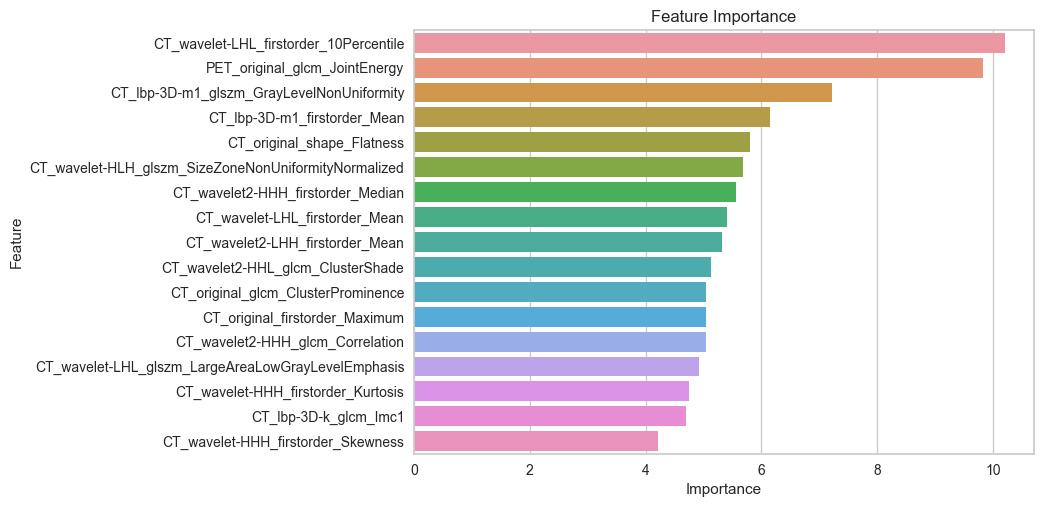

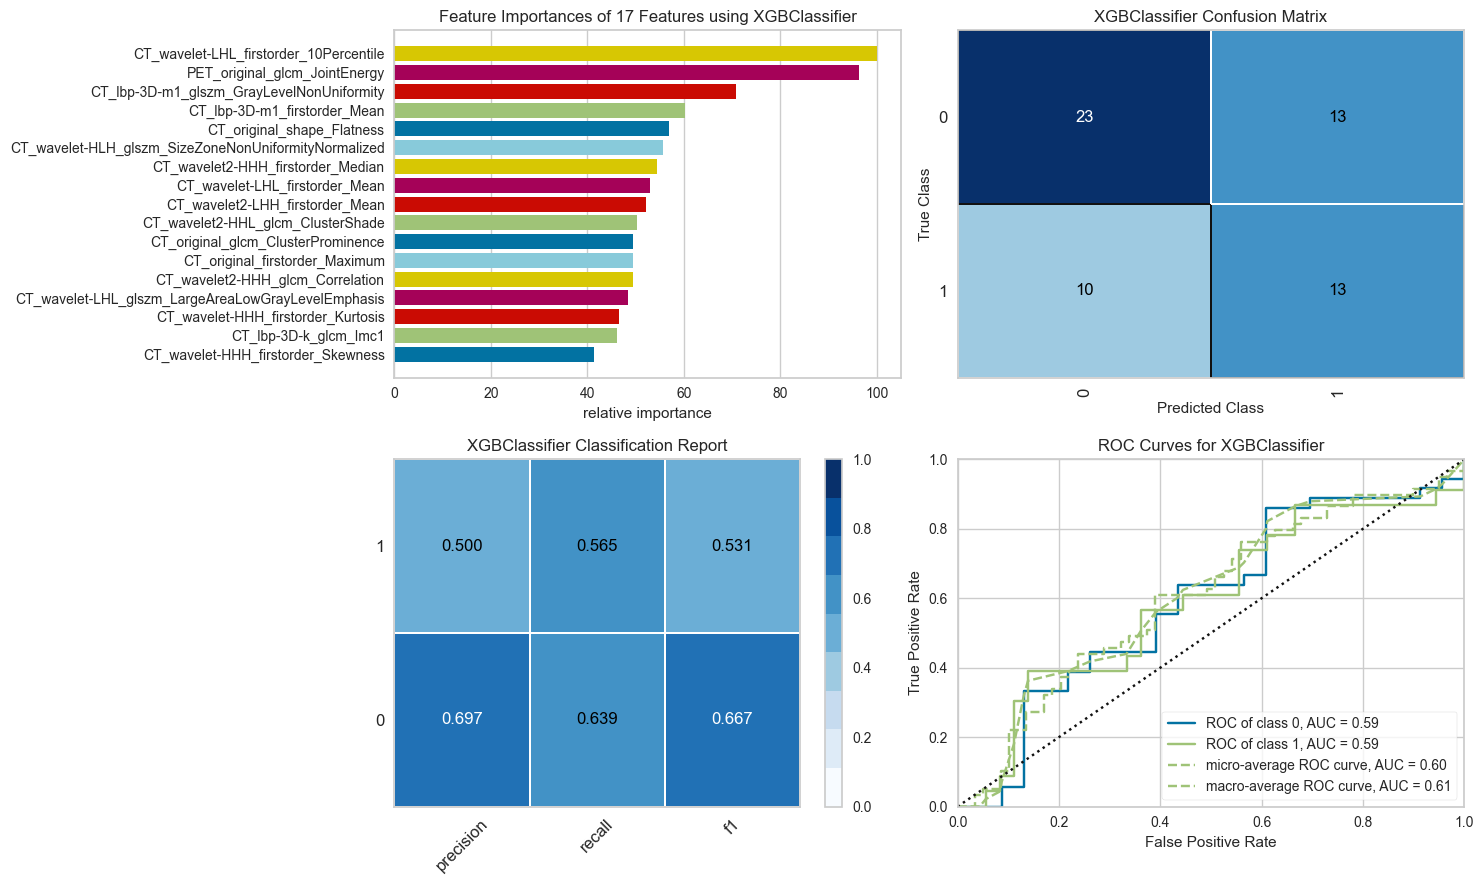

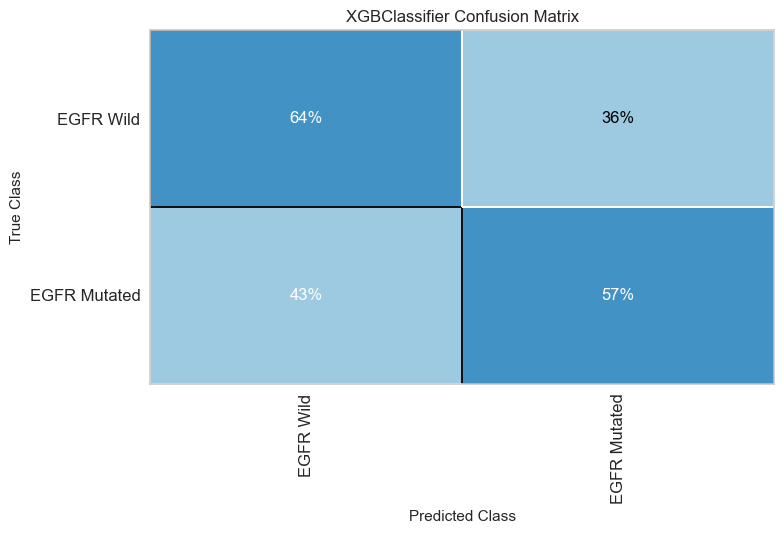

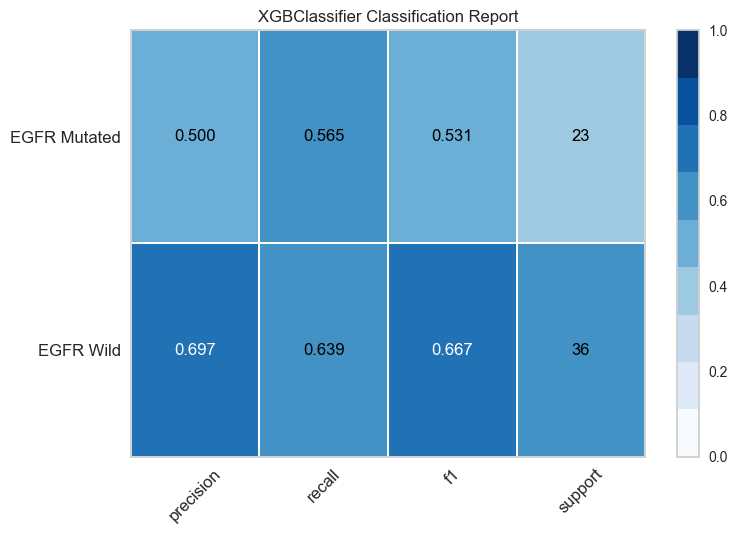

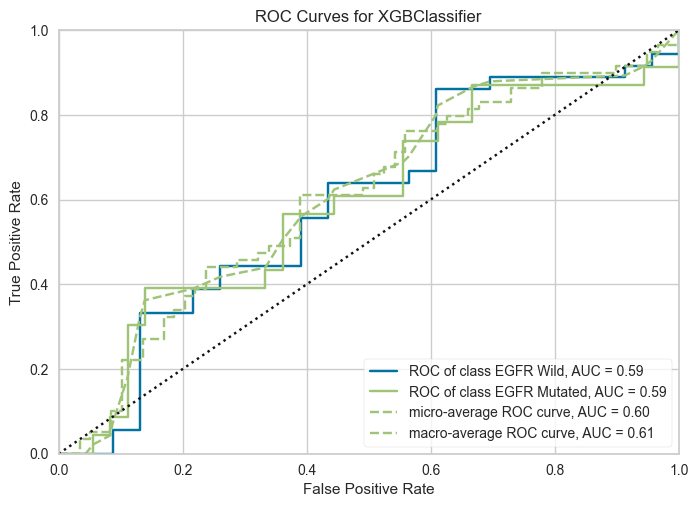

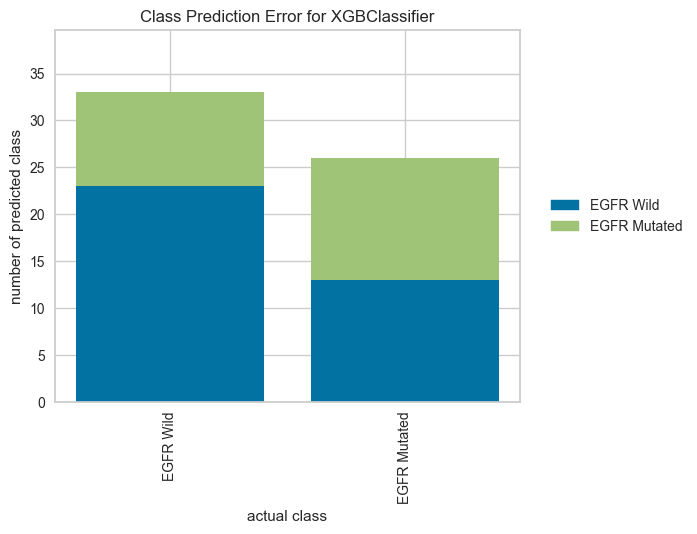

In [57]:
# Visualization of Results --> Feature Importances
plot_feature_importances(xgb_tuned)
report_results_quickly(xgb_tuned)
plot_results(xgb_tuned)
# plot_learning_curve(xgb_tuned)

In [58]:
# LightGBMClassifier # 0.857143

lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {"learning_rate": [0.01, 0.03, 0.05, 0.1, 0.2,0.5],
               "n_estimators": [200,500, 800,1000, 1500,2000,3000,5000],
               "max_depth": [1,2,3,4, 5,6, 8,None]}

lgbm_cv_model = GridSearchCV(lgbm_model, lgbm_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)
lgbm_cv_model.best_params_ # {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 500}

Fitting 10 folds for each of 384 candidates, totalling 3840 fits


{'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 200}

In [59]:
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X_train, y_train)
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred) # 0.8766233766233766


0.576271186440678

In [60]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca-NB-lgb73', Save_format = 'csv',Save_type = 'col')

In [61]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# # Load the model that we saved before
data1 = pd.read_csv("Inter-test-for-auc-dca-NB-lgb73.csv")
external_test_pred=data1.y_pred
external_test_label=data1.label
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.67      0.61      0.64        36
EGFR Mutated       0.46      0.52      0.49        23

    accuracy                           0.58        59
   macro avg       0.56      0.57      0.56        59
weighted avg       0.59      0.58      0.58        59

precision 0.46153846153846156 accuracy 0.576271186440678 recall 0.5217391304347826 auc 0.5664251207729469


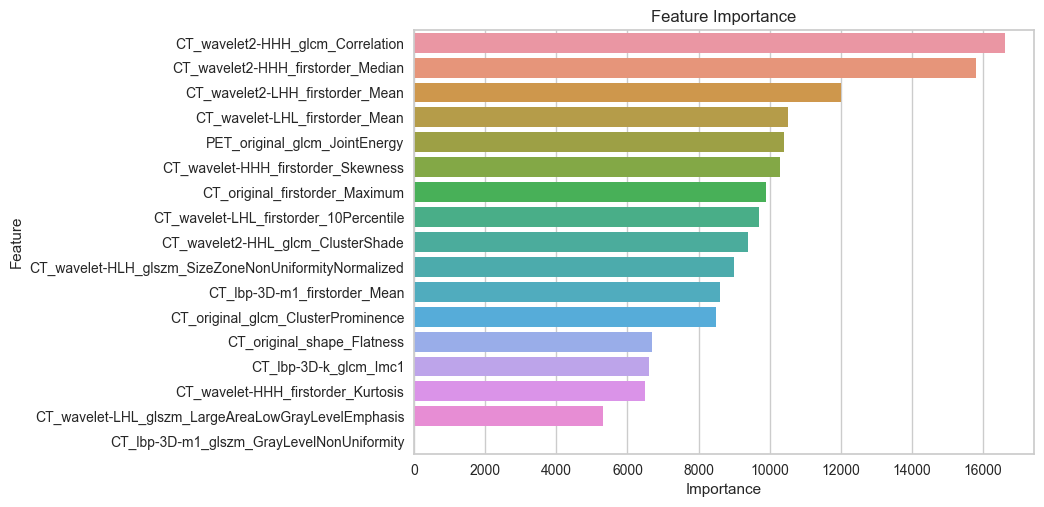

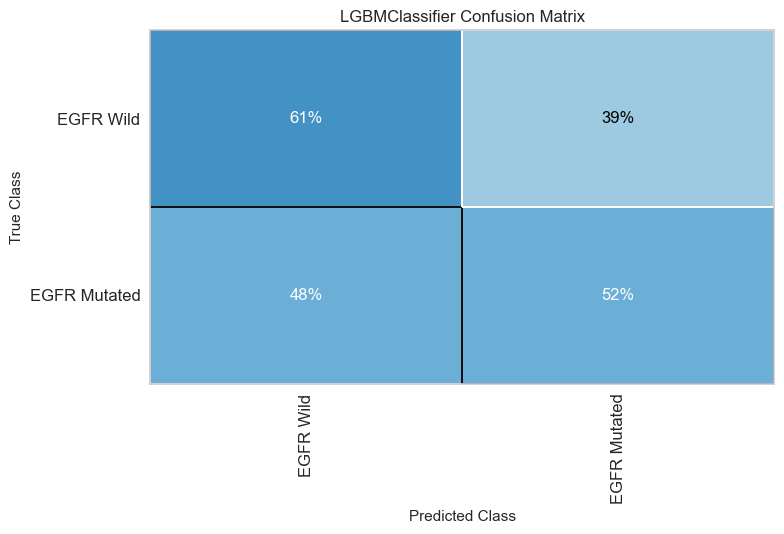

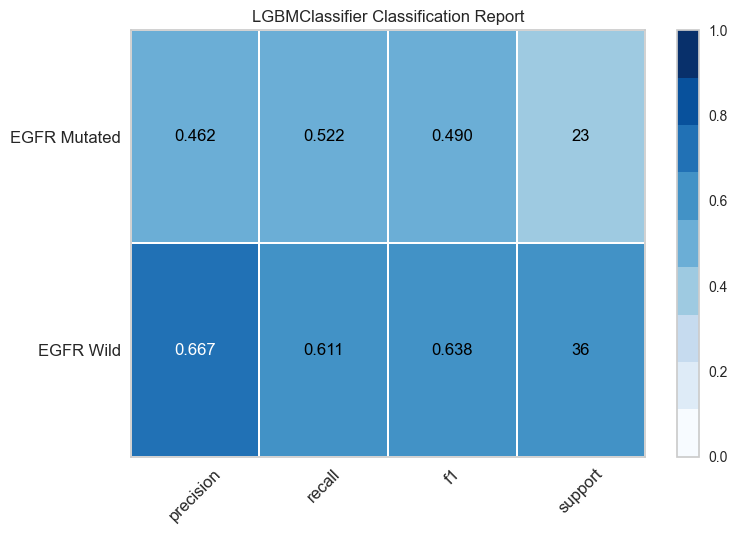

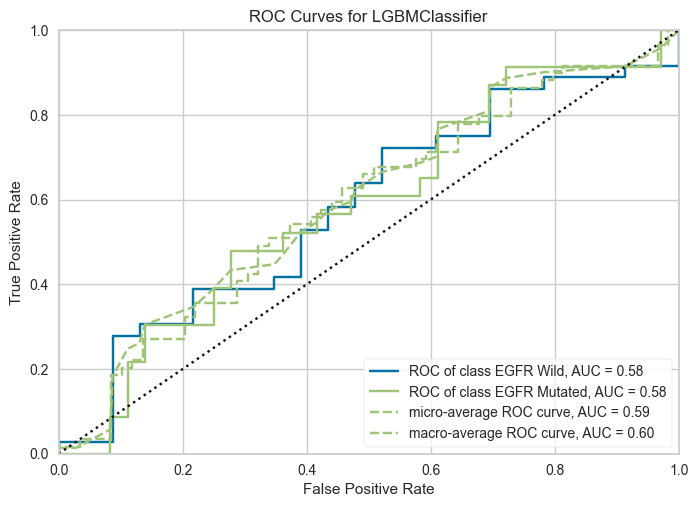

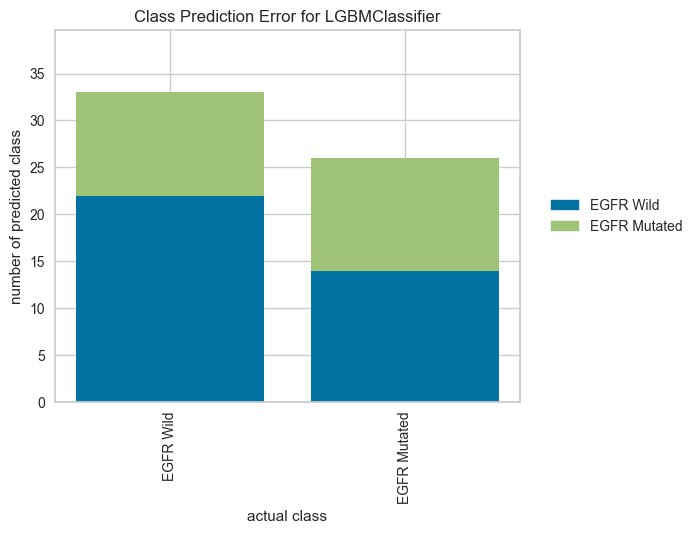

In [62]:
# Visualization of Results --> Feature Importances
plot_feature_importances(lgbm_tuned)
# report_results_quickly(lgbm_tuned)
plot_results(lgbm_tuned)
# plot_learning_curve(lgbm_tuned)

In [63]:
import shap
shap.initjs()
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_train)




In [64]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [99]:
shap.dependence_plot(y_train, shap_values, X_train)

TypeError: The passed shap_values are a list not an array! If you have a list of explanations try passing shap_values[0] instead to explain the first output class of a multi-output model.

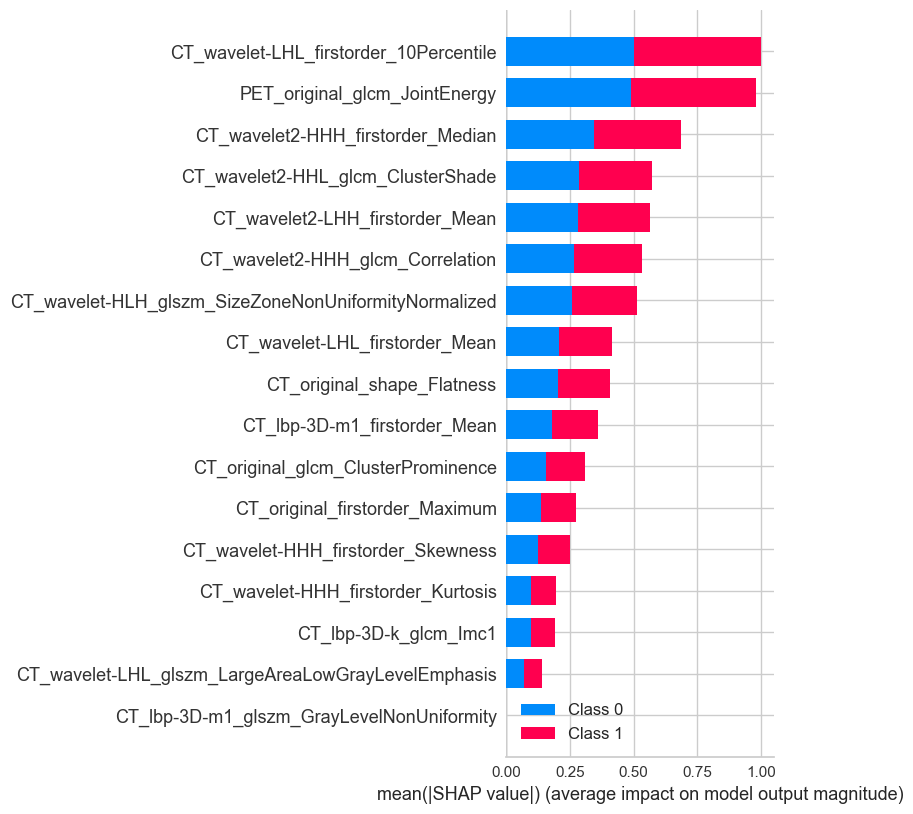

In [65]:
shap.summary_plot(shap_values, X_train)

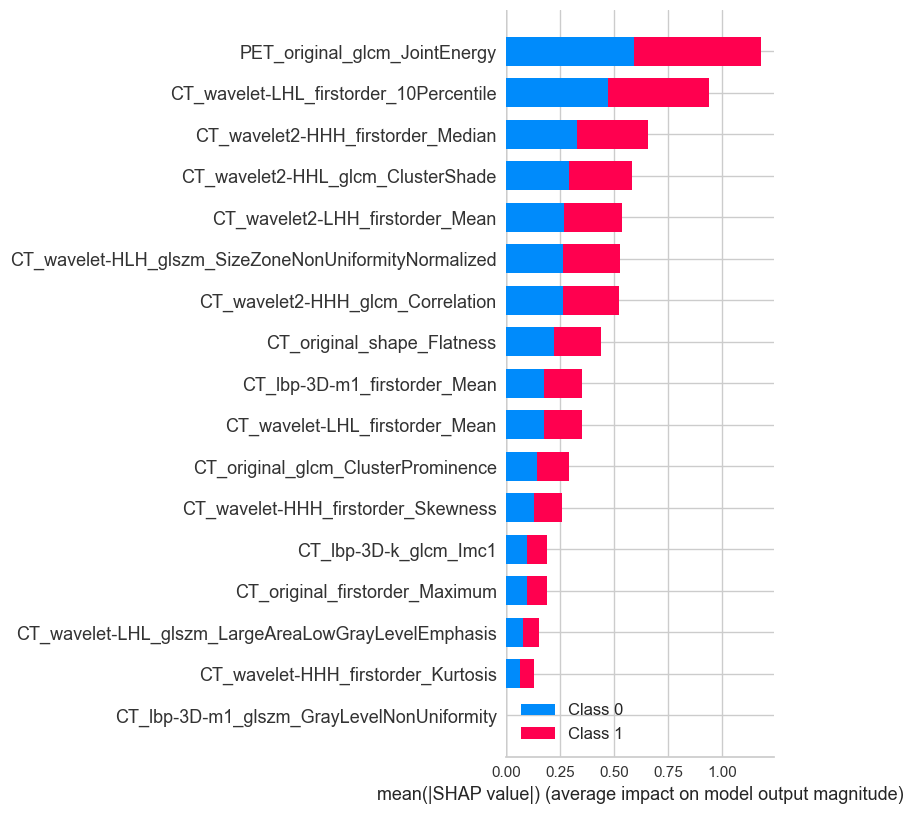

In [66]:
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [67]:
import shap
explainer = shap.TreeExplainer(lgbm_tuned)
shap_values = explainer.shap_values(X_test)


In [96]:
# visualize the first prediction's explanation
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

################ Accuracy scores for test set for the models: ################

0:	learn: 0.6670082	total: 902us	remaining: 721ms
1:	learn: 0.6529612	total: 1.65ms	remaining: 660ms
2:	learn: 0.6355229	total: 2.29ms	remaining: 609ms
3:	learn: 0.6237086	total: 2.88ms	remaining: 573ms
4:	learn: 0.6138547	total: 3.42ms	remaining: 544ms
5:	learn: 0.6060734	total: 3.96ms	remaining: 524ms
6:	learn: 0.5964815	total: 4.57ms	remaining: 518ms
7:	learn: 0.5817934	total: 5.13ms	remaining: 508ms
8:	learn: 0.5753762	total: 5.67ms	remaining: 498ms
9:	learn: 0.5669573	total: 6.24ms	remaining: 493ms
10:	learn: 0.5605109	total: 6.81ms	remaining: 488ms
11:	learn: 0.5497484	total: 7.37ms	remaining: 484ms
12:	learn: 0.5414885	total: 7.93ms	remaining: 480ms
13:	learn: 0.5397251	total: 8.46ms	remaining: 475ms
14:	learn: 0.5325593	total: 9.02ms	remaining: 472ms
15:	learn: 0.5270273	total: 9.62ms	remaining: 472ms
16:	learn: 0.5225012	total: 10.2ms	remaining: 469ms
17:	learn: 0.5132852	total: 10.7ms	remaining: 4

246:	learn: 0.0363576	total: 139ms	remaining: 312ms
247:	learn: 0.0362531	total: 140ms	remaining: 312ms
248:	learn: 0.0362258	total: 141ms	remaining: 311ms
249:	learn: 0.0359374	total: 141ms	remaining: 311ms
250:	learn: 0.0354422	total: 142ms	remaining: 310ms
251:	learn: 0.0350306	total: 142ms	remaining: 310ms
252:	learn: 0.0345648	total: 143ms	remaining: 309ms
253:	learn: 0.0342741	total: 143ms	remaining: 308ms
254:	learn: 0.0340917	total: 144ms	remaining: 308ms
255:	learn: 0.0336643	total: 145ms	remaining: 307ms
256:	learn: 0.0336323	total: 145ms	remaining: 306ms
257:	learn: 0.0332332	total: 146ms	remaining: 306ms
258:	learn: 0.0330049	total: 146ms	remaining: 305ms
259:	learn: 0.0327643	total: 147ms	remaining: 305ms
260:	learn: 0.0324399	total: 147ms	remaining: 304ms
261:	learn: 0.0320542	total: 148ms	remaining: 303ms
262:	learn: 0.0317745	total: 148ms	remaining: 303ms
263:	learn: 0.0315715	total: 149ms	remaining: 302ms
264:	learn: 0.0313159	total: 149ms	remaining: 302ms
265:	learn: 

546:	learn: 0.0092728	total: 304ms	remaining: 141ms
547:	learn: 0.0092725	total: 305ms	remaining: 140ms
548:	learn: 0.0092725	total: 305ms	remaining: 140ms
549:	learn: 0.0092702	total: 306ms	remaining: 139ms
550:	learn: 0.0092604	total: 306ms	remaining: 138ms
551:	learn: 0.0092603	total: 307ms	remaining: 138ms
552:	learn: 0.0092180	total: 307ms	remaining: 137ms
553:	learn: 0.0091969	total: 308ms	remaining: 137ms
554:	learn: 0.0091936	total: 309ms	remaining: 136ms
555:	learn: 0.0091886	total: 309ms	remaining: 136ms
556:	learn: 0.0091425	total: 310ms	remaining: 135ms
557:	learn: 0.0091424	total: 310ms	remaining: 134ms
558:	learn: 0.0091402	total: 311ms	remaining: 134ms
559:	learn: 0.0091391	total: 311ms	remaining: 133ms
560:	learn: 0.0091001	total: 312ms	remaining: 133ms
561:	learn: 0.0090986	total: 312ms	remaining: 132ms
562:	learn: 0.0090733	total: 313ms	remaining: 132ms
563:	learn: 0.0090583	total: 313ms	remaining: 131ms
564:	learn: 0.0090327	total: 314ms	remaining: 131ms
565:	learn: 

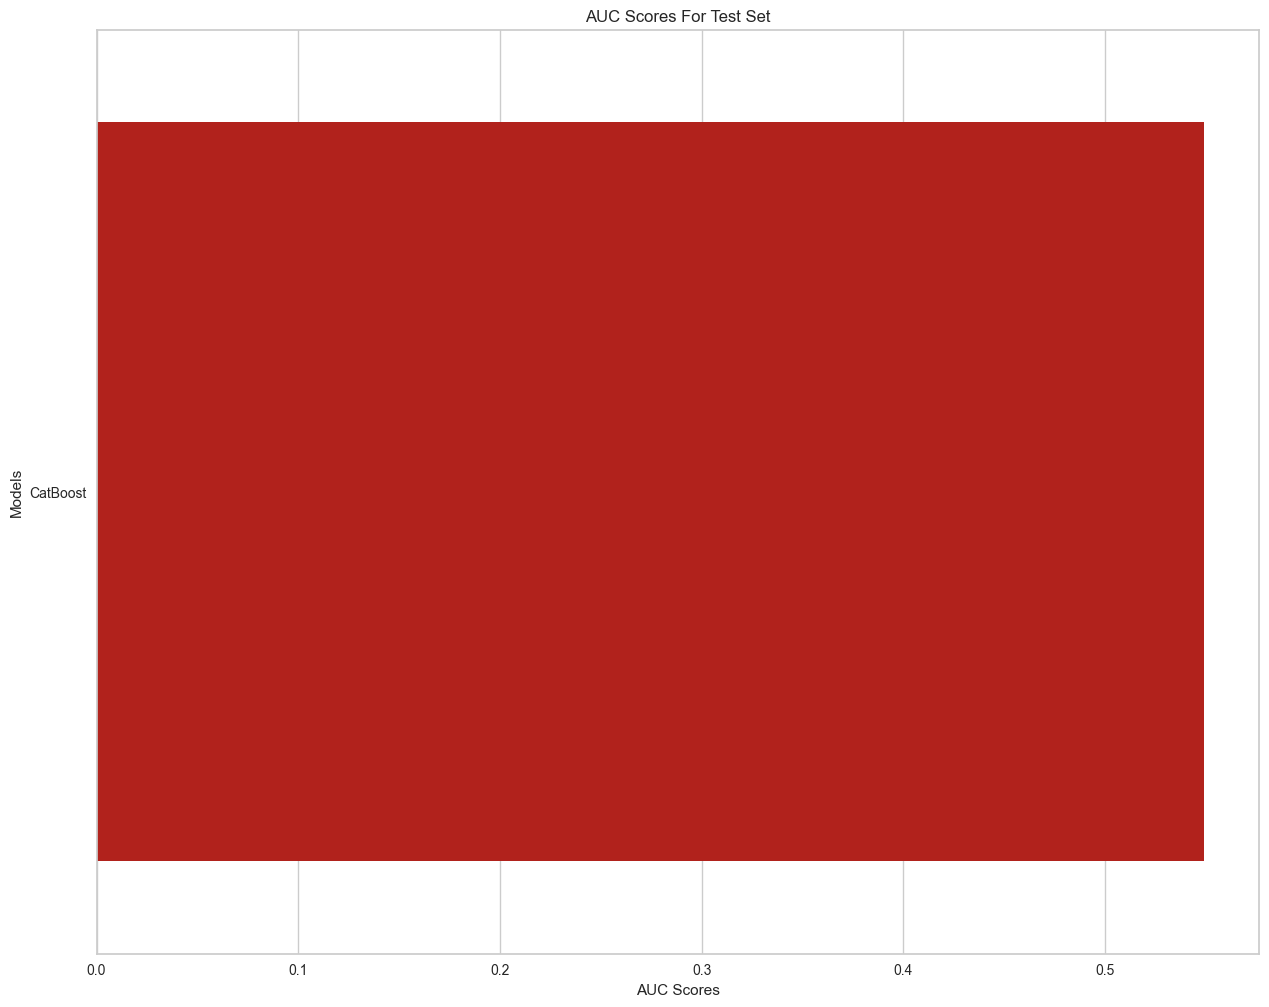

In [103]:
# Comparison of tuned models
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
tuned_models = [
#     ('LogisticRegression', logreg_tuned),
#                 ('RF', rf_tuned),
#                 ('XGBoost', xgb_tuned),
#                 ('LightGBM', lgbm_tuned),
               ('CatBoost', cb_tuned)
# #                 ('SVM', svm_tuned),
#                 ('GBDT', gbdt_tuned),
# #                 ('NGBoost', ngb_tuned),
# #                 ('DT', dt_tuned),
#                 ('AdaBoost', adb_tuned)
               ]


evaluate_classification_model_holdout(tuned_models)

In [153]:
# Stack models
from mlxtend.classifier import StackingCVClassifier
stack_gen = StackingCVClassifier(classifiers=(logreg_tuned, rf_tuned, xgb_tuned, lgbm_tuned,cb_tuned,svm_tuned,gbdt_tuned,ngb_tuned,dt_tuned,adb_tuned), meta_classifier=xgb_tuned)
stack_gen_model = stack_gen.fit(X_train, y_train)

evaluate_classification_model_holdout([('stack model', stack_gen_model)]) # 0.890


0:	learn: 0.6913043	total: 466us	remaining: 233ms
1:	learn: 0.6894106	total: 1.08ms	remaining: 270ms
2:	learn: 0.6883138	total: 1.54ms	remaining: 255ms
3:	learn: 0.6871873	total: 1.95ms	remaining: 242ms
4:	learn: 0.6845546	total: 2.34ms	remaining: 232ms
5:	learn: 0.6820555	total: 2.76ms	remaining: 227ms
6:	learn: 0.6806537	total: 3.17ms	remaining: 224ms
7:	learn: 0.6792333	total: 3.58ms	remaining: 220ms
8:	learn: 0.6773484	total: 3.99ms	remaining: 218ms
9:	learn: 0.6761950	total: 4.4ms	remaining: 215ms
10:	learn: 0.6736581	total: 4.91ms	remaining: 218ms
11:	learn: 0.6717208	total: 5.35ms	remaining: 218ms
12:	learn: 0.6704542	total: 5.75ms	remaining: 215ms
13:	learn: 0.6693845	total: 6.15ms	remaining: 214ms
14:	learn: 0.6680733	total: 6.58ms	remaining: 213ms
15:	learn: 0.6666074	total: 7.01ms	remaining: 212ms
16:	learn: 0.6639269	total: 7.45ms	remaining: 212ms
17:	learn: 0.6629117	total: 7.88ms	remaining: 211ms
18:	learn: 0.6617477	total: 8.28ms	remaining: 210ms
19:	learn: 0.6602997	tot

370:	learn: 0.4008893	total: 151ms	remaining: 52.5ms
371:	learn: 0.4006165	total: 152ms	remaining: 52.2ms
372:	learn: 0.4004963	total: 152ms	remaining: 51.8ms
373:	learn: 0.4000378	total: 153ms	remaining: 51.4ms
374:	learn: 0.3994239	total: 153ms	remaining: 51ms
375:	learn: 0.3987564	total: 153ms	remaining: 50.6ms
376:	learn: 0.3974919	total: 154ms	remaining: 50.2ms
377:	learn: 0.3971057	total: 154ms	remaining: 49.8ms
378:	learn: 0.3961355	total: 155ms	remaining: 49.4ms
379:	learn: 0.3955762	total: 155ms	remaining: 49ms
380:	learn: 0.3952920	total: 156ms	remaining: 48.6ms
381:	learn: 0.3946990	total: 156ms	remaining: 48.2ms
382:	learn: 0.3941955	total: 156ms	remaining: 47.7ms
383:	learn: 0.3938039	total: 157ms	remaining: 47.3ms
384:	learn: 0.3933823	total: 157ms	remaining: 46.9ms
385:	learn: 0.3927936	total: 158ms	remaining: 46.5ms
386:	learn: 0.3925618	total: 158ms	remaining: 46.1ms
387:	learn: 0.3922111	total: 158ms	remaining: 45.7ms
388:	learn: 0.3917260	total: 159ms	remaining: 45.3

179:	learn: 0.4917567	total: 74.5ms	remaining: 132ms
180:	learn: 0.4914523	total: 75ms	remaining: 132ms
181:	learn: 0.4907059	total: 75.4ms	remaining: 132ms
182:	learn: 0.4900687	total: 75.9ms	remaining: 132ms
183:	learn: 0.4894686	total: 76.4ms	remaining: 131ms
184:	learn: 0.4886206	total: 76.8ms	remaining: 131ms
185:	learn: 0.4882853	total: 77.2ms	remaining: 130ms
186:	learn: 0.4877375	total: 77.6ms	remaining: 130ms
187:	learn: 0.4872053	total: 77.9ms	remaining: 129ms
188:	learn: 0.4861842	total: 78.3ms	remaining: 129ms
189:	learn: 0.4854089	total: 78.8ms	remaining: 129ms
190:	learn: 0.4843534	total: 79.2ms	remaining: 128ms
191:	learn: 0.4837414	total: 79.6ms	remaining: 128ms
192:	learn: 0.4834406	total: 80ms	remaining: 127ms
193:	learn: 0.4831028	total: 80.4ms	remaining: 127ms
194:	learn: 0.4822468	total: 80.8ms	remaining: 126ms
195:	learn: 0.4814440	total: 81.2ms	remaining: 126ms
196:	learn: 0.4812513	total: 81.6ms	remaining: 125ms
197:	learn: 0.4799580	total: 82ms	remaining: 125ms

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 500] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 600] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 700] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 800] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 900] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1000] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1100] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1200] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1300] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1400] loss=0.0605 val_loss=0.0000 scale=0.0001 norm=0.0001
[iter 1500] loss=0.0605 val_loss=0.00

263:	learn: 0.5248911	total: 159ms	remaining: 143ms
264:	learn: 0.5244321	total: 160ms	remaining: 142ms
265:	learn: 0.5239001	total: 161ms	remaining: 141ms
266:	learn: 0.5237296	total: 161ms	remaining: 141ms
267:	learn: 0.5234640	total: 162ms	remaining: 140ms
268:	learn: 0.5231657	total: 163ms	remaining: 140ms
269:	learn: 0.5229685	total: 163ms	remaining: 139ms
270:	learn: 0.5227594	total: 164ms	remaining: 138ms
271:	learn: 0.5225581	total: 164ms	remaining: 138ms
272:	learn: 0.5221725	total: 165ms	remaining: 137ms
273:	learn: 0.5218820	total: 166ms	remaining: 137ms
274:	learn: 0.5216693	total: 166ms	remaining: 136ms
275:	learn: 0.5214038	total: 167ms	remaining: 135ms
276:	learn: 0.5212425	total: 167ms	remaining: 135ms
277:	learn: 0.5205246	total: 168ms	remaining: 134ms
278:	learn: 0.5198990	total: 168ms	remaining: 133ms
279:	learn: 0.5196429	total: 169ms	remaining: 133ms
280:	learn: 0.5192466	total: 170ms	remaining: 132ms
281:	learn: 0.5189891	total: 170ms	remaining: 132ms
282:	learn: 

[iter 0] loss=0.6796 val_loss=0.0000 scale=2.0000 norm=4.0000
[iter 100] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 200] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 300] loss=0.1079 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 400] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 500] loss=0.1077 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 600] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 700] loss=0.1060 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 800] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 900] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1000] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1100] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1200] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1300] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1400] loss=0.1061 val_loss=0.0000 scale=0.0002 norm=0.0003
[iter 1500] loss=0.1061 val_loss=0.00

375:	learn: 0.3702344	total: 159ms	remaining: 52.4ms
376:	learn: 0.3697282	total: 159ms	remaining: 52ms
377:	learn: 0.3694314	total: 160ms	remaining: 51.6ms
378:	learn: 0.3692269	total: 160ms	remaining: 51.2ms
379:	learn: 0.3686564	total: 161ms	remaining: 50.7ms
380:	learn: 0.3677640	total: 161ms	remaining: 50.3ms
381:	learn: 0.3672247	total: 162ms	remaining: 49.9ms
382:	learn: 0.3668360	total: 162ms	remaining: 49.5ms
383:	learn: 0.3665687	total: 162ms	remaining: 49.1ms
384:	learn: 0.3662026	total: 163ms	remaining: 48.6ms
385:	learn: 0.3658207	total: 163ms	remaining: 48.2ms
386:	learn: 0.3653268	total: 164ms	remaining: 47.8ms
387:	learn: 0.3648995	total: 164ms	remaining: 47.4ms
388:	learn: 0.3643337	total: 165ms	remaining: 47ms
389:	learn: 0.3641317	total: 165ms	remaining: 46.5ms
390:	learn: 0.3639030	total: 166ms	remaining: 46.1ms
391:	learn: 0.3634410	total: 166ms	remaining: 45.7ms
392:	learn: 0.3625817	total: 166ms	remaining: 45.3ms
393:	learn: 0.3617720	total: 167ms	remaining: 44.9

177:	learn: 0.5284456	total: 76.6ms	remaining: 139ms
178:	learn: 0.5280909	total: 77.2ms	remaining: 138ms
179:	learn: 0.5277909	total: 77.6ms	remaining: 138ms
180:	learn: 0.5271786	total: 78.1ms	remaining: 138ms
181:	learn: 0.5265316	total: 78.5ms	remaining: 137ms
182:	learn: 0.5258927	total: 78.9ms	remaining: 137ms
183:	learn: 0.5250015	total: 79.3ms	remaining: 136ms
184:	learn: 0.5244836	total: 79.8ms	remaining: 136ms
185:	learn: 0.5238971	total: 80.2ms	remaining: 135ms
186:	learn: 0.5236188	total: 80.7ms	remaining: 135ms
187:	learn: 0.5227836	total: 81.2ms	remaining: 135ms
188:	learn: 0.5219123	total: 81.6ms	remaining: 134ms
189:	learn: 0.5213354	total: 82.1ms	remaining: 134ms
190:	learn: 0.5206292	total: 82.5ms	remaining: 134ms
191:	learn: 0.5202908	total: 83ms	remaining: 133ms
192:	learn: 0.5198191	total: 83.4ms	remaining: 133ms
193:	learn: 0.5180973	total: 83.9ms	remaining: 132ms
194:	learn: 0.5175547	total: 84.3ms	remaining: 132ms
195:	learn: 0.5166599	total: 84.8ms	remaining: 1

[iter 0] loss=0.6802 val_loss=0.0000 scale=2.0000 norm=4.0000


LinAlgError: Singular matrix

In [156]:
# Function ot blend models
def blend_models_predict(X_test):
    return ((0.05 * logreg_tuned.predict(X_test)) +
            (0.05 * dt_tuned.predict(X_test)) +
            (0.1 * gbdt_tuned.predict(X_test)) +
            (0.1 * rf_tuned.predict(X_test)) +
            (0.1 * svm_tuned.predict(X_test)) +
            (0.1 * adb_tuned.predict(X_test)) +
            (0.1 * xgb_tuned.predict(X_test)) +
            (0.1 * lgbm_tuned.predict(X_test)) +
            (0.1 * cb_tuned.predict(X_test)) +
             (0.1 * ngb_tuned.predict(X_test)) +
            (0.1 * stack_gen_model.predict(X_test)))

In [157]:
accuracy_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
# aucroc_score(y_test, blend_models_predict(X_test).round())# 0.8701298701298701
roc_auc_score(y_test, blend_models_predict(X_test).round())

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [109]:
Data = {'label':y_test, 'y_pred':y_pred}
Save_to_Csv(data = Data, file_name = 'Inter-test-for-auc-dca--NB-stack73', Save_format = 'csv',Save_type = 'col')

In [104]:
# Pickle Models --> Saving tuned models

# Create a folder named 'Models'
# save working directory
#
# cur_dir = os.getcwd()
# cur_dir
#
# # change working directory:
os.chdir("C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/RFE-RF-GB/NB")
#
# # Save the models
for model in tuned_models:
    pickle.dump(model[1], open(str(model[0]) + ".pkl", 'wb'))


In [105]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [106]:
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-1.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFEGB8.csv",index=None)
# test.to_csv("C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/EGFR1921/testZscore-RFERF17-42.csv",index=None)

PATHDATA1 = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split/ExternalTest-FS-ZSCORE-MI-NB.csv"
external_test=pd.read_csv(PATHDATA1)
external_test_label = external_test.label
# print(external_test_label)
external_test=external_test.drop(columns=['label'])


In [107]:
OSPath = "C:/Users/zuoya/Desktop/375cases_e/fs_pre_01/2-testin-rj/split"

In [108]:
######CatBoost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/CatBoost.pkl'
finalpkl =  OSPath + pathpkl
cgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=cgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-cgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# cgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/CatBoost.pkl', 'rb'))

# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-cgb-RFERF19-73.csv', external_test_pred, delimiter = ',')

auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.49      0.76      0.60        42
EGFR Mutated       0.57      0.28      0.38        46

    accuracy                           0.51        88
   macro avg       0.53      0.52      0.49        88
weighted avg       0.53      0.51      0.48        88

precision 0.5652173913043478 accuracy 0.5113636363636364 recall 0.2826086956521739 auc 0.5222567287784678


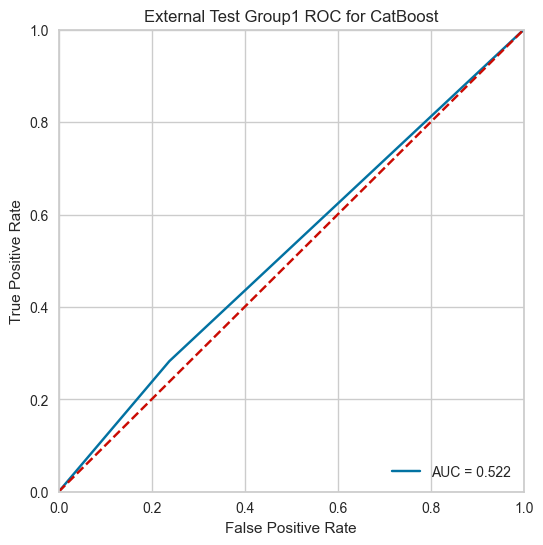

In [109]:
######CatBoost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for CatBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [110]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[32 10]
 [33 13]]
Normalized confusion matrix
[[0.76 0.24]
 [0.72 0.28]]


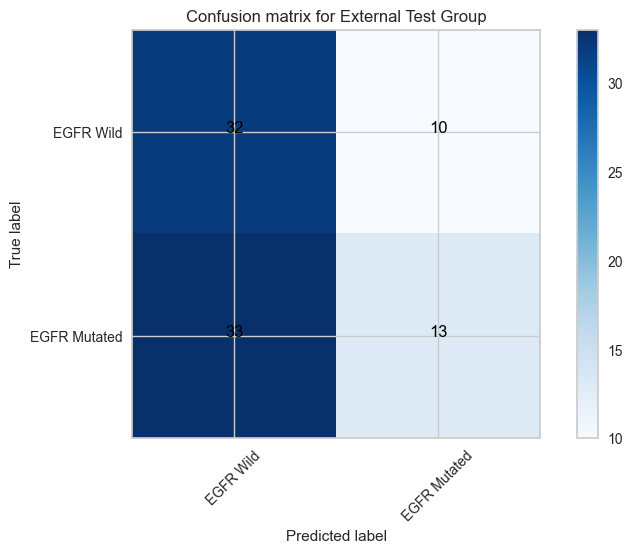

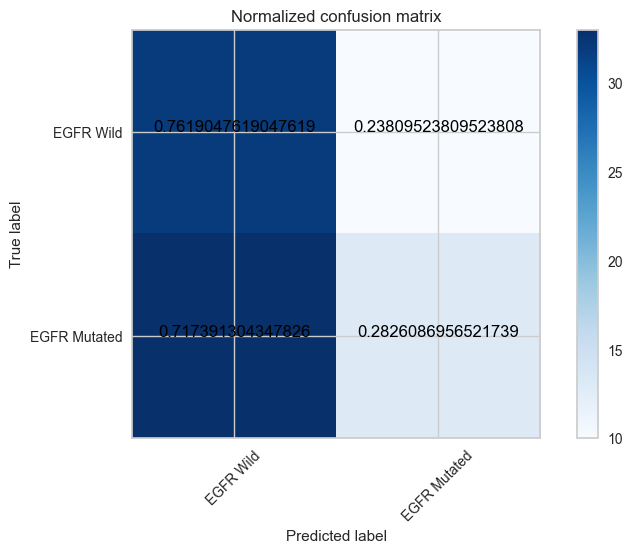

In [111]:
######CatBoost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [73]:
######adaboost  测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/AdaBoost.pkl'
finalpkl =  OSPath + pathpkl
adb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=adb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-adb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# adb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/AdaBoost.pkl', 'rb'))
# external_test_pred=adb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-adb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.46      0.62      0.53        42
EGFR Mutated       0.48      0.33      0.39        46

    accuracy                           0.47        88
   macro avg       0.47      0.47      0.46        88
weighted avg       0.47      0.47      0.45        88

precision 0.4838709677419355 accuracy 0.4659090909090909 recall 0.32608695652173914 auc 0.47256728778467916


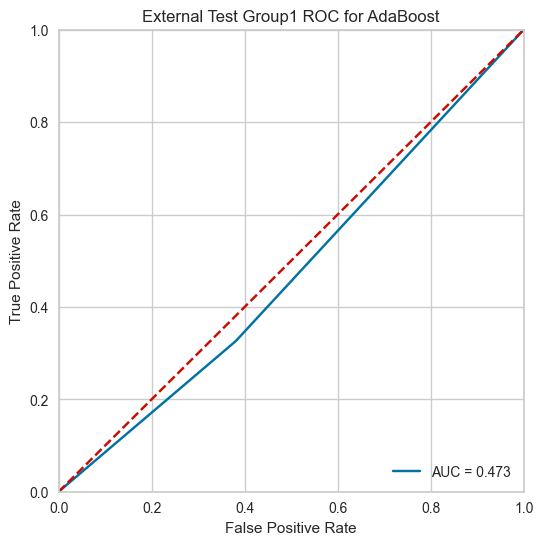

In [74]:
######adaboost  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for AdaBoost')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [75]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26 16]
 [31 15]]
Normalized confusion matrix
[[0.62 0.38]
 [0.67 0.33]]


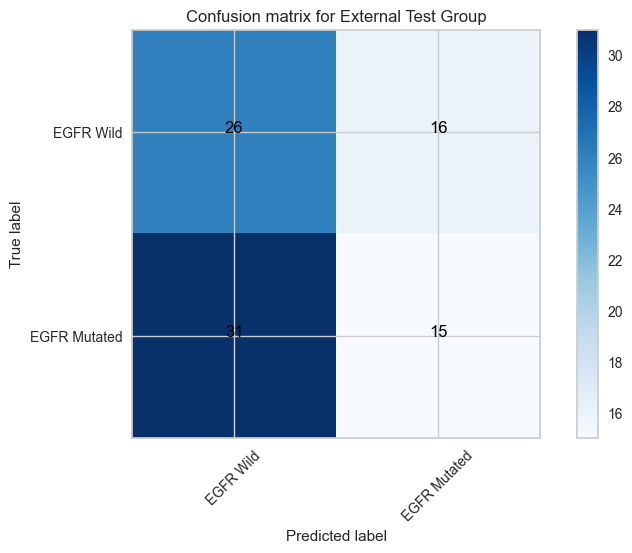

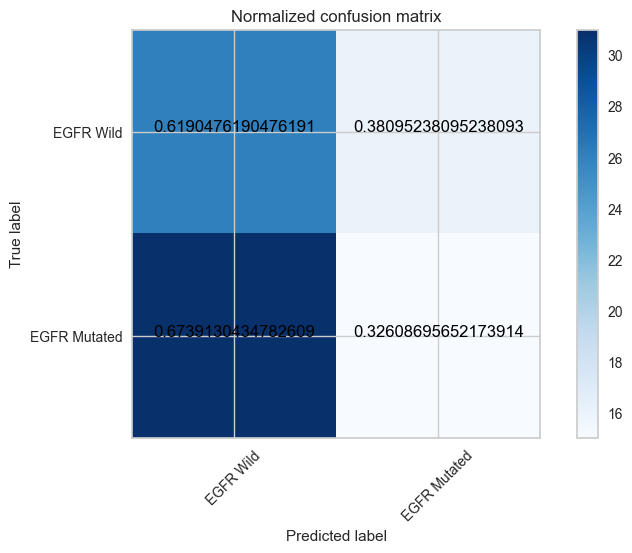

In [76]:
######adaboost  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [77]:
######XGB  测试集1
import numpy as np
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from ngboost import NGBClassifier

import os
import pickle

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

from yellowbrick.classifier import ConfusionMatrix, ClassificationReport, ROCAUC, ClassPredictionError
from yellowbrick.model_selection import LearningCurve, FeatureImportances

# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/XGBoost.pkl'
finalpkl =  OSPath + pathpkl
xgb = pickle.load(open(finalpkl, 'rb'))
external_test_pred=xgb.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-xgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')


# xgb = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/XGBoost.pkl', 'rb'))
# external_test_pred=xgb.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-xgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='macro', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="macro", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)
# precision 0.625 accuracy 0.6349206349206349 recall 0.7575757575757576 auc 0.6287878787878788
# precision    recall  f1-score   support

#     EGFR_E19       0.65      0.50      0.57        30
#     EGFR_E21       0.62      0.76      0.68        33

#     accuracy                           0.63        63
#    macro avg       0.64      0.63      0.63        63
# weighted avg       0.64      0.63      0.63        63


              precision    recall  f1-score   support

   EGFR Wild       0.45      0.62      0.52        42
EGFR Mutated       0.47      0.30      0.37        46

    accuracy                           0.45        88
   macro avg       0.46      0.46      0.44        88
weighted avg       0.46      0.45      0.44        88

precision 0.4574712643678161 accuracy 0.45454545454545453 recall 0.4616977225672878 auc 0.4616977225672878


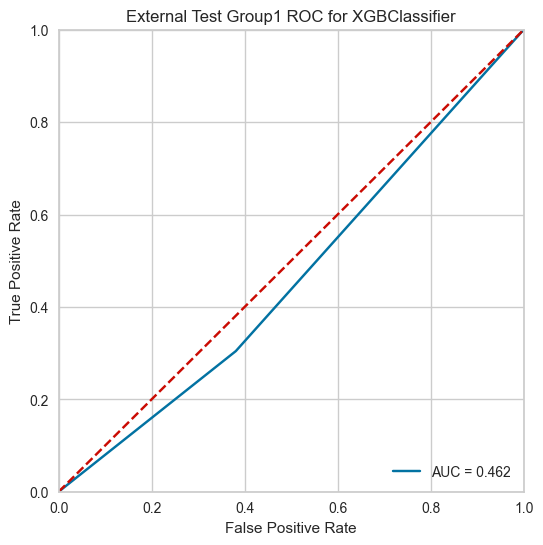

In [78]:
######XGB  测试集1
#############画图部分
# from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
import pylab as plt
import warnings;warnings.filterwarnings('ignore')
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for XGBClassifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



In [79]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[26 16]
 [32 14]]
Normalized confusion matrix
[[0.62 0.38]
 [0.7  0.3 ]]


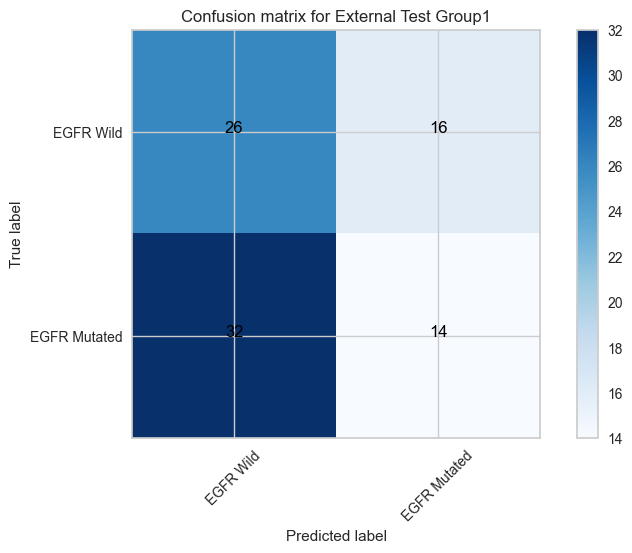

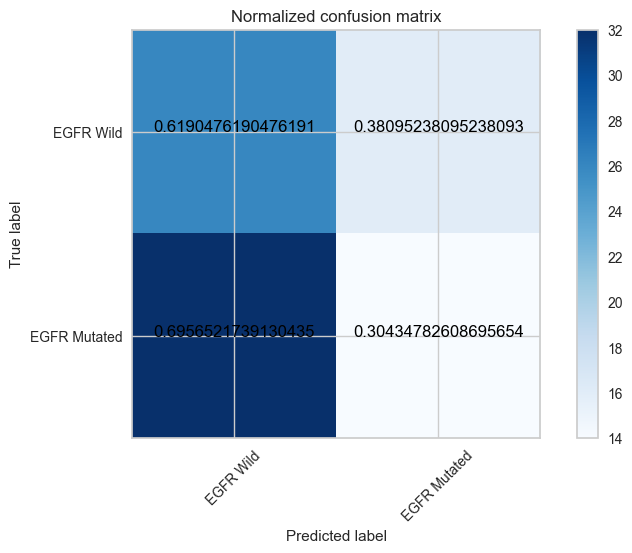

In [80]:
######XGB  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group1')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [81]:
#####RF  测试集1
import numpy as np
# # Load the model that we saved before
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/RF.pkl'
finalpkl =  OSPath + pathpkl
rft = pickle.load(open(finalpkl, 'rb'))
external_test_pred=rft.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-RF-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# rft = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/RF.pkl', 'rb'))
# external_test_pred=rft.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-RF-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.52      0.79      0.62        42
EGFR Mutated       0.62      0.33      0.43        46

    accuracy                           0.55        88
   macro avg       0.57      0.56      0.53        88
weighted avg       0.57      0.55      0.52        88

precision 0.625 accuracy 0.5454545454545454 recall 0.32608695652173914 auc 0.5559006211180124


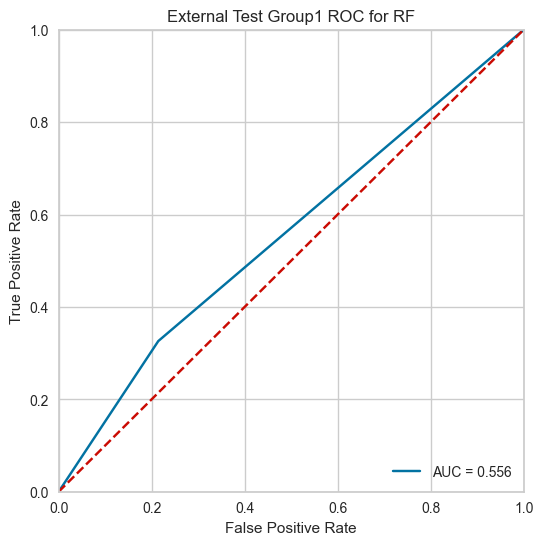

In [82]:
#####RF  测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[33  9]
 [31 15]]
Normalized confusion matrix
[[0.79 0.21]
 [0.67 0.33]]


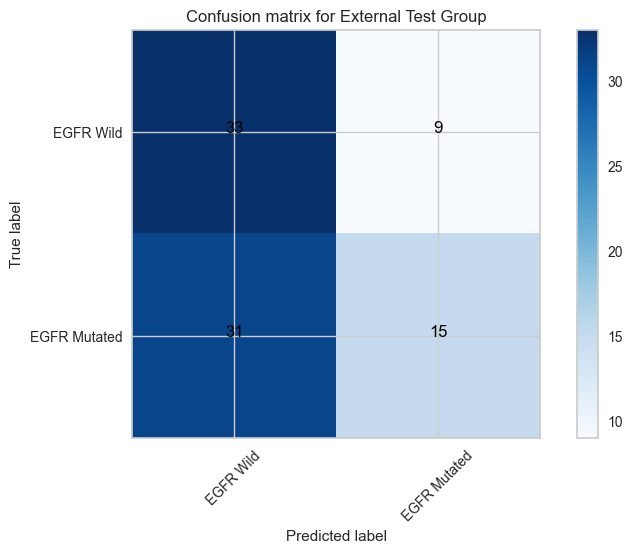

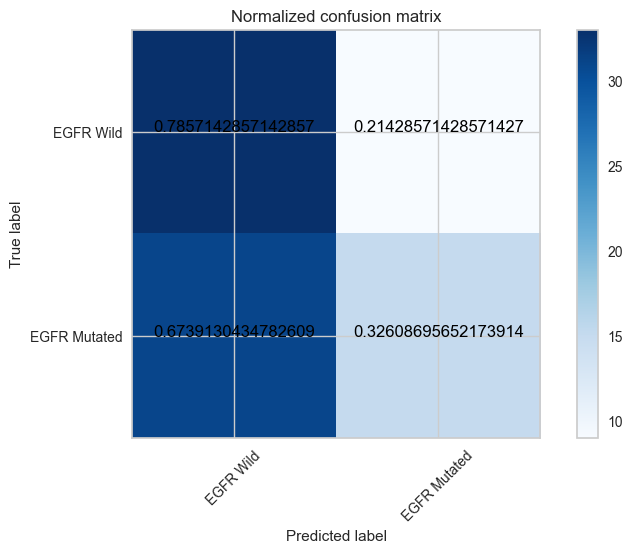

In [83]:
#####RF  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [84]:
######LR 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/LogisticRegression.pkl'
finalpkl =  OSPath + pathpkl
lrt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lrt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lr-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lrt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LogisticRegression.pkl', 'rb'))
# external_test_pred=lrt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lr-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)


              precision    recall  f1-score   support

   EGFR Wild       0.47      0.88      0.62        42
EGFR Mutated       0.50      0.11      0.18        46

    accuracy                           0.48        88
   macro avg       0.49      0.49      0.40        88
weighted avg       0.49      0.48      0.39        88

precision 0.5 accuracy 0.4772727272727273 recall 0.10869565217391304 auc 0.494824016563147


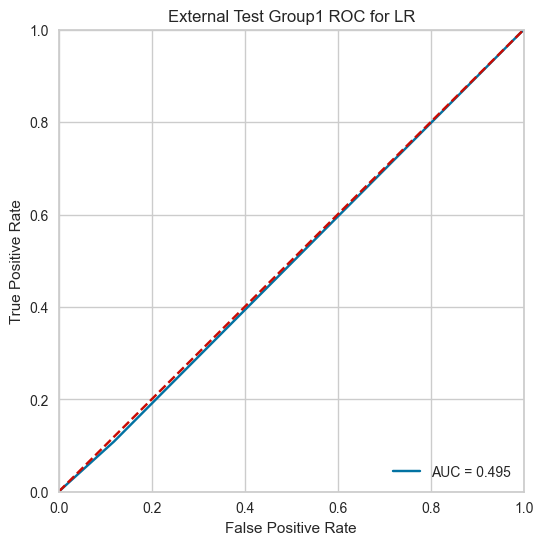

In [85]:
######LR 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LR')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[37  5]
 [41  5]]
Normalized confusion matrix
[[0.88 0.12]
 [0.89 0.11]]


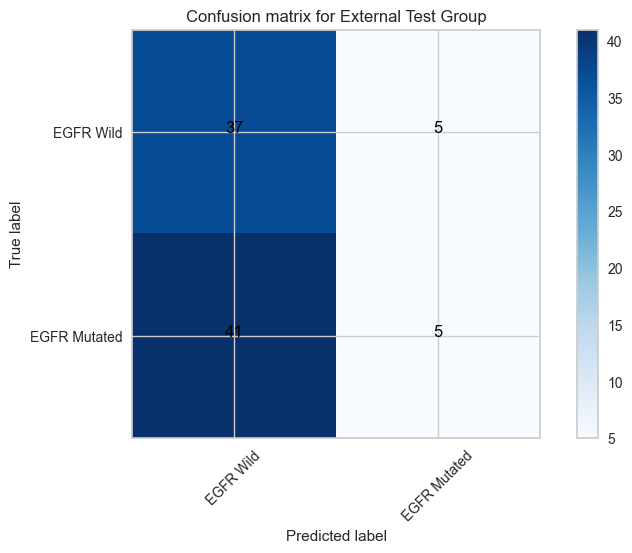

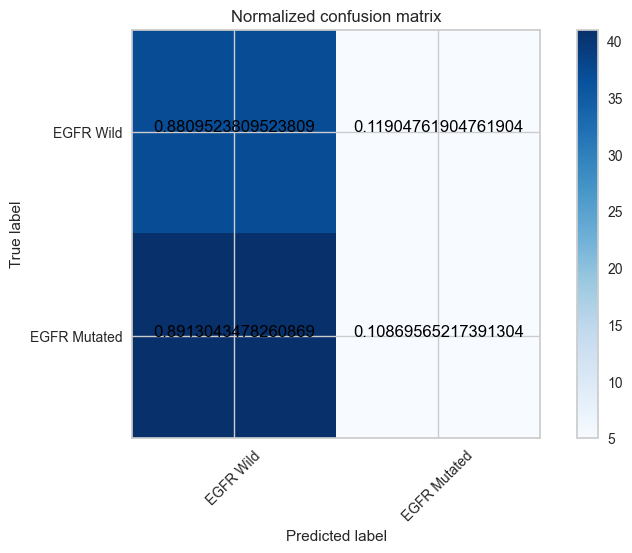

In [86]:
#####LR  测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [87]:
##GBDT 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/GBDT.pkl'
finalpkl =  OSPath + pathpkl
GBDT = pickle.load(open(finalpkl, 'rb'))
external_test_pred=GBDT.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-GBDT-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# svm = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.47      0.71      0.57        42
EGFR Mutated       0.50      0.26      0.34        46

    accuracy                           0.48        88
   macro avg       0.48      0.49      0.45        88
weighted avg       0.49      0.48      0.45        88

precision 0.5 accuracy 0.4772727272727273 recall 0.2608695652173913 auc 0.4875776397515528


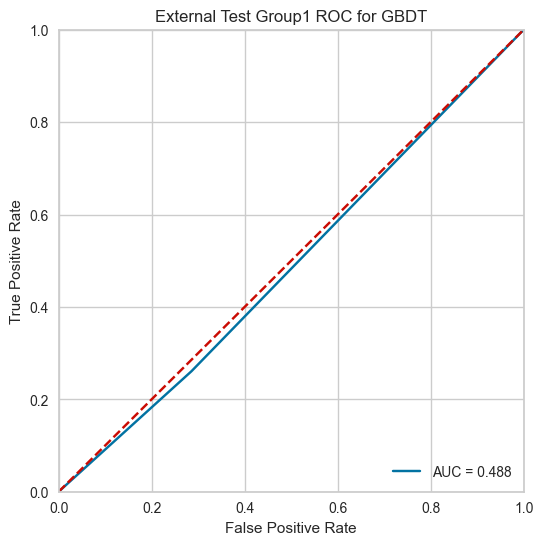

In [88]:
##GBDT 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for GBDT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[30 12]
 [34 12]]
Normalized confusion matrix
[[0.71 0.29]
 [0.74 0.26]]


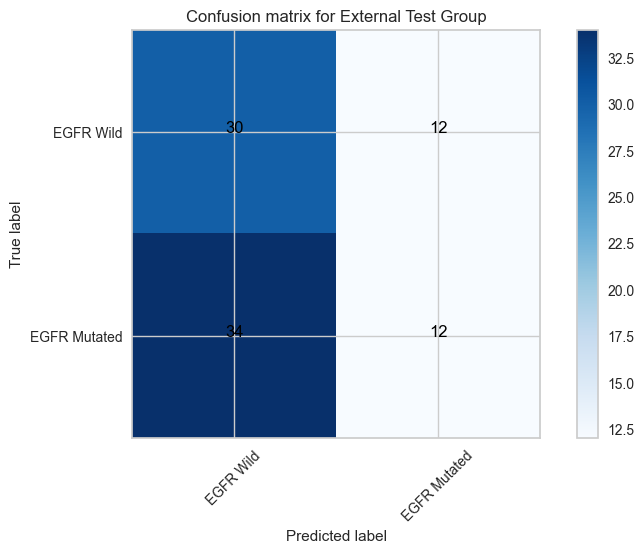

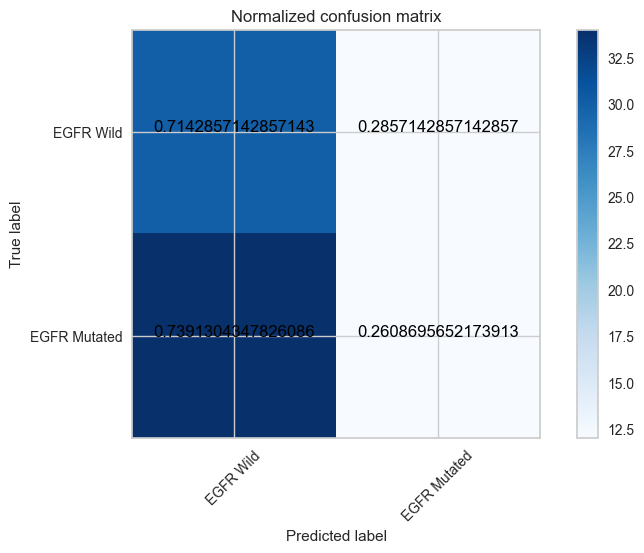

In [89]:
##GBDT 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [90]:
##lgb 测试集1
import numpy as np
# # Load the model that we saved before
pathpkl = '/RFE-RF-GB/NB/LightGBM.pkl'
finalpkl =  OSPath + pathpkl
lgbt = pickle.load(open(finalpkl, 'rb'))
external_test_pred=lgbt.predict(external_test)
path = '/RFE-RF-GB/ex-test-for-auc-dca-lgb-NB-73.csv'
pathaucfinal = OSPath + path
np.savetxt(pathaucfinal, external_test_pred, delimiter = ',')
# lgbt = pickle.load(open('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/RFERF19/LightGBM.pkl', 'rb'))
# external_test_pred=lgbt.predict(external_test)
# np.savetxt('C:/Users/zuoya/Desktop/Code/ipypb-fs/08_Catboost/Catboost/767cases/EGFR-1921-FS/RFE-RF-GB/ex-test-for-auc-dca-lgb-RFERF19-73.csv', external_test_pred, delimiter = ',')
auc = roc_auc_score(external_test_label, external_test_pred)
precision = precision_score(external_test_label, external_test_pred, pos_label=1, average='binary', sample_weight=None)
accuracy = accuracy_score(external_test_label, external_test_pred)
recall = recall_score(external_test_label, external_test_pred, average="binary", pos_label=1)
# f1_score = f1_score(external_test_label, external_test_pred)
# f1_score = f1_score(external_test_label, external_test_pred, average='weighted')
class_names = ["EGFR Wild", "EGFR Mutated"]
print(classification_report(external_test_label, external_test_pred, target_names=class_names))
print('precision',precision,'accuracy',accuracy,'recall',recall,'auc',auc)

              precision    recall  f1-score   support

   EGFR Wild       0.47      0.60      0.53        42
EGFR Mutated       0.51      0.39      0.44        46

    accuracy                           0.49        88
   macro avg       0.49      0.49      0.49        88
weighted avg       0.49      0.49      0.48        88

precision 0.5142857142857142 accuracy 0.48863636363636365 recall 0.391304347826087 auc 0.4932712215320911


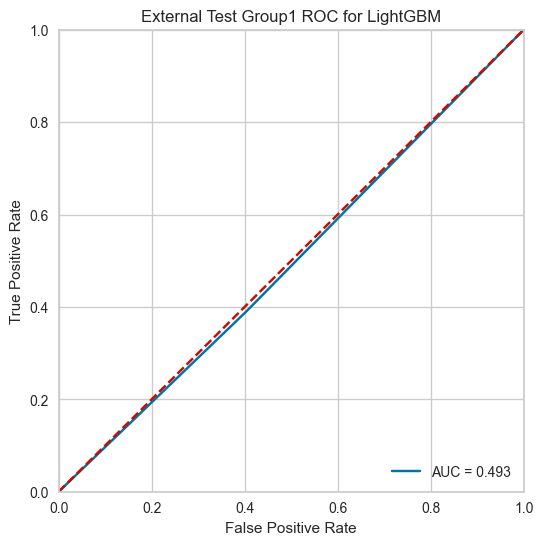

In [91]:
##lgb 测试集1
fpr, tpr, threshold = metrics.roc_curve(external_test_label, external_test_pred)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize=(6,6))
plt.title('External Test Group1 ROC for LightGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization
[[25 17]
 [28 18]]
Normalized confusion matrix
[[0.6  0.4 ]
 [0.61 0.39]]


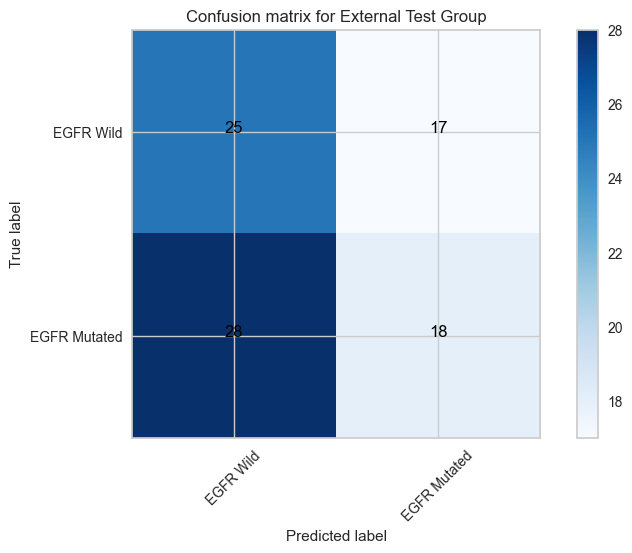

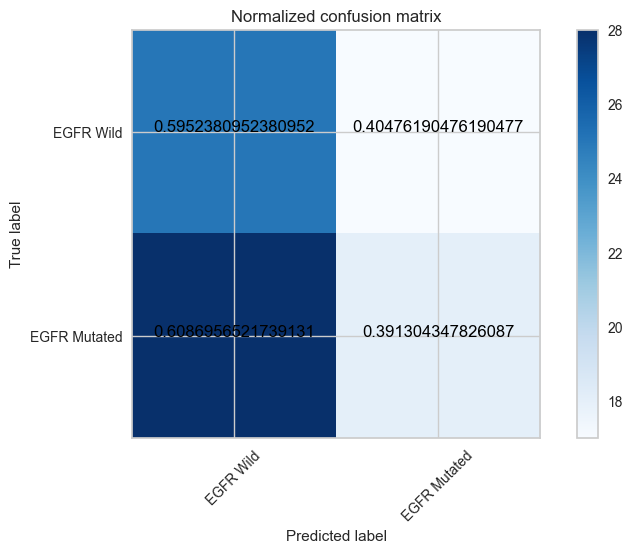

In [92]:
##lgb 测试集1
# Compute confusion matrix
cnf_matrix = confusion_matrix(external_test_label, external_test_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix for External Test Group')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()